# LOAD THE BCG DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
#pip install "numpy>=1.16.5,<1.23.0"
#pip show numpy


# Step 1: Read the accelerometer data from the CSV file
subject1 = pd.read_csv("aa1_acc_s.csv")
subject2 = pd.read_csv("aa2_acc_s.csv")
subject3 = pd.read_csv("ab4_acc_s.csv")
subject4 = pd.read_csv("ab5_acc_s.csv")
subject5 = pd.read_csv("ca2_acc_s.csv")
subject6 = pd.read_csv("ca3_acc_s.csv")
subject7 = pd.read_csv("ca4_acc_s.csv")
subject8 = pd.read_csv("dv1_acc_s.csv")
subject9 = pd.read_csv("dv2_acc_s.csv")
subject10 = pd.read_csv("ga1_acc_s.csv")
subject11 = pd.read_csv("mg1_acc_s.csv")
subject12 = pd.read_csv("mg2_acc_s.csv")
subject13 = pd.read_csv("mh1_acc_s.csv")
subject14 = pd.read_csv("mh2_acc_s.csv")



# Extract the BCG accelerometer signal (z1, z2, z3) from the DataFrame
raw_bcg_signal1 = subject1[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal2 = subject2[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal3 = subject3[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal4 = subject4[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal5 = subject5[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal6 = subject6[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal7 = subject7[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal8 = subject8[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal9 = subject9[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal10 = subject10[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal11 = subject11[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal12 = subject12[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal13 = subject13[['z1','z2','z3']].mean(axis=1).values
raw_bcg_signal14 = subject14[['z1','z2','z3']].mean(axis=1).values

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from biosppy.signals import ecg


ecg_subject1 = pd.read_csv("aa1_ecg_s.csv")  
ecg_subject2 = pd.read_csv("aa2_ecg_s.csv")
ecg_subject3 = pd.read_csv("ab4_ecg_s.csv")
ecg_subject4 = pd.read_csv("ab5_ecg_s.csv")
ecg_subject5 = pd.read_csv("ca2_ecg_s.csv")
ecg_subject6 = pd.read_csv("ca3_ecg_s.csv")
ecg_subject7 = pd.read_csv("ca4_ecg_s.csv")
ecg_subject8 = pd.read_csv("dv1_ecg_s.csv")
ecg_subject9 = pd.read_csv("dv2_ecg_s.csv")
ecg_subject10 = pd.read_csv("ga1_ecg_s.csv")
ecg_subject11 = pd.read_csv("mg1_ecg_s.csv")
ecg_subject12 = pd.read_csv("mg2_ecg_s.csv")
ecg_subject13 = pd.read_csv("mh1_ecg_s.csv")
ecg_subject14 = pd.read_csv("mh2_ecg_s.csv")

# Extract the ECG signal and sampling frequency from the DataFrame
ecg_signal1 = ecg_subject1['ECG II'].values
ecg_signal2 = ecg_subject2['ECG II'].values
ecg_signal3 = ecg_subject3['ECG II'].values
ecg_signal4 = ecg_subject4['ECG II'].values
ecg_signal5 = ecg_subject5['ECG II'].values
ecg_signal6 = ecg_subject6['ECG II'].values
ecg_signal7 = ecg_subject7['ECG II'].values
ecg_signal8 = ecg_subject8['ECG II'].values
ecg_signal9 = ecg_subject9['ECG II'].values
ecg_signal10 = ecg_subject10['ECG II'].values



# Sample rate of the accelerometer BCG signal
fs = 50 # Hz

# Time vector for plotting
time1 = subject1["ctime"]; 2 * raw_bcg_signal1.std()
time2 = subject2["ctime"]; 2 * raw_bcg_signal2.std()
time3 = subject3["ctime"]; 2 * raw_bcg_signal3.std()
time4 = subject4["ctime"]; 2 * raw_bcg_signal4.std()
time5 = subject5["ctime"]; 2 * raw_bcg_signal5.std()
time6 = subject6["ctime"]; 2 * raw_bcg_signal6.std()
time7 = subject7["ctime"]; 2 * raw_bcg_signal7.std()
time8 = subject8["ctime"]; 2 * raw_bcg_signal8.std()
time9 = subject9["ctime"]; 2 * raw_bcg_signal9.std()
time10 = subject10["ctime"]; 2 * raw_bcg_signal10.std()
time11 = subject11["ctime"]; 2 * raw_bcg_signal11.std()
time12 = subject12["ctime"]; 2 * raw_bcg_signal12.std()
time13 = subject13["ctime"]; 2 * raw_bcg_signal13.std()
time14 = subject14["ctime"]; 2 * raw_bcg_signal14.std()

In [3]:
data_frames = [raw_bcg_signal1, raw_bcg_signal2, raw_bcg_signal3, raw_bcg_signal4,
              raw_bcg_signal5, raw_bcg_signal6, raw_bcg_signal7, raw_bcg_signal8,
              raw_bcg_signal9, raw_bcg_signal10, raw_bcg_signal11, raw_bcg_signal12,
              raw_bcg_signal13, raw_bcg_signal14]  # Add all data frames here

# Loop through each data frame and perform scaling
for i, df in enumerate(data_frames):
    min_value = df.min()
    max_value = df.max()
    scaled_df = (df - min_value) / (max_value - min_value)
    data_frames[i] = scaled_df  
    
    
raw_bcg_signal1 = data_frames[0]
raw_bcg_signal2 = data_frames[1]
raw_bcg_signal3 = data_frames[2]
raw_bcg_signal4 = data_frames[3]
raw_bcg_signal5 = data_frames[4]
raw_bcg_signal6 = data_frames[5]
raw_bcg_signal7 = data_frames[6]
raw_bcg_signal8 = data_frames[7]
raw_bcg_signal9 = data_frames[8]
raw_bcg_signal10 = data_frames[9]
raw_bcg_signal11 = data_frames[10]
raw_bcg_signal12 = data_frames[11]
raw_bcg_signal13 = data_frames[12]
raw_bcg_signal14 = data_frames[13]

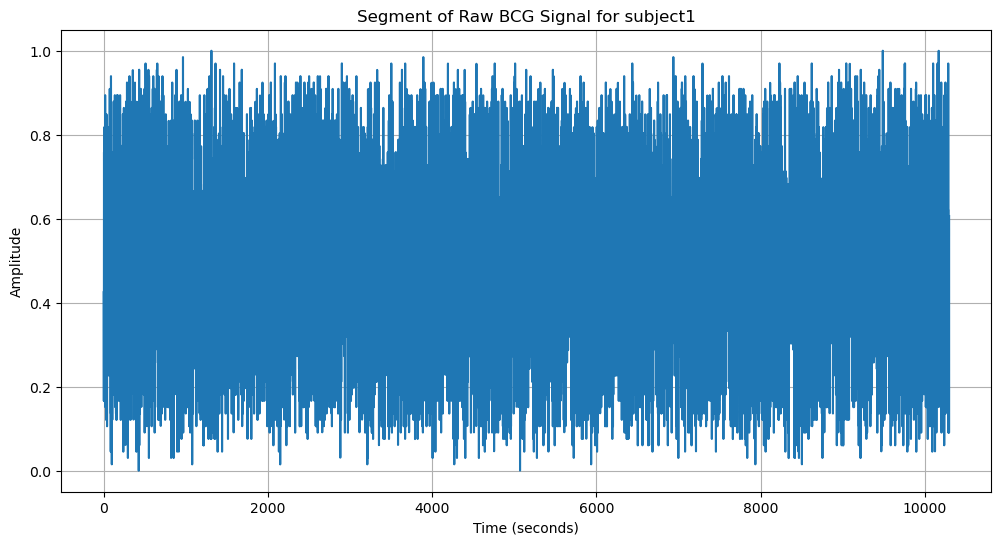

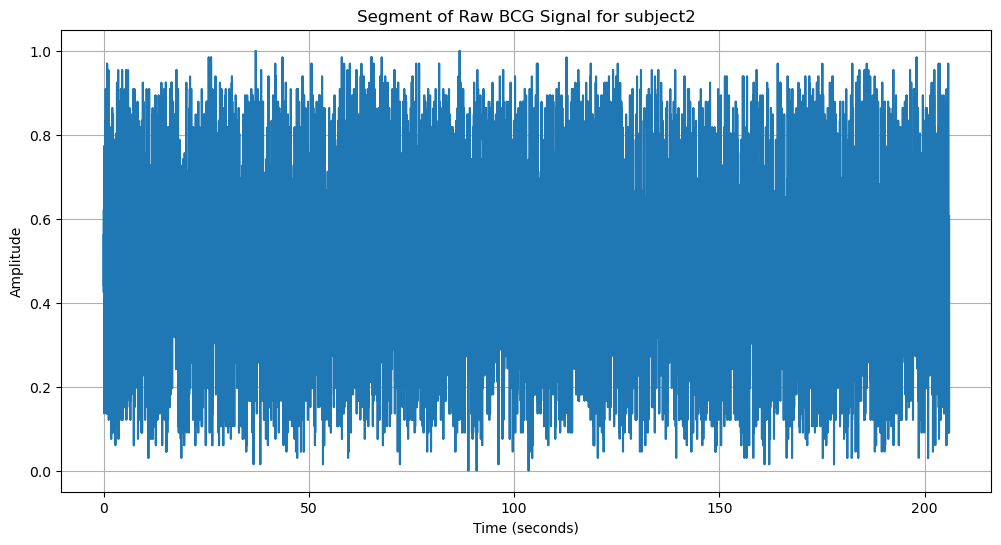

In [4]:
amplitude_threshold1 = 0.35



#Plot a segment of the raw BCG signal
segment_duration1 =   len(raw_bcg_signal1) / fs; segment_samples1 = int(fs * segment_duration1)
segment_time1 = np.arange(segment_samples1) / fs

segment_duration2 =   len(raw_bcg_signal2) / fs;  segment_samples2 = int(fs * segment_duration2)
segment_time2 = np.arange(segment_samples2) / fs

segment_duration3 =   len(raw_bcg_signal3) / fs;  segment_samples3 = int(fs * segment_duration3)
segment_time3 = np.arange(segment_samples3) / fs

segment_duration4 =   len(raw_bcg_signal4) / fs;  segment_samples4 = int(fs * segment_duration4)
segment_time4 = np.arange(segment_samples4) / fs

segment_duration5 =   len(raw_bcg_signal5) / fs;  segment_samples5 = int(fs * segment_duration5)
segment_time5 = np.arange(segment_samples5) / fs

segment_duration6 =   len(raw_bcg_signal6) / fs;  segment_samples6 = int(fs * segment_duration6)
segment_time6 = np.arange(segment_samples6) / fs

segment_duration7 =   len(raw_bcg_signal7) / fs;  segment_samples7 = int(fs * segment_duration7)
segment_time7 = np.arange(segment_samples7) / fs

segment_duration8 =   len(raw_bcg_signal8) / fs;  segment_samples8 = int(fs * segment_duration8)
segment_time8 = np.arange(segment_samples8) / fs

segment_duration9 =   len(raw_bcg_signal9) / fs;  segment_samples9 = int(fs * segment_duration9)
segment_time9 = np.arange(segment_samples9) / fs

segment_duration10 =   len(raw_bcg_signal10) / fs;  segment_samples10 = int(fs * segment_duration10)
segment_time10 = np.arange(segment_samples10) / fs

plt.figure(figsize=(12, 6))
plt.plot(raw_bcg_signal1[:segment_samples1])
plt.title("Segment of Raw BCG Signal for subject1")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(segment_time2[:segment_samples2], raw_bcg_signal2[:segment_samples2])
plt.title("Segment of Raw BCG Signal for subject2")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


In [5]:
import numpy as np
from scipy.signal import butter, filtfilt, medfilt, correlate
import matplotlib.pyplot as plt

# Apply a Butterworth bandpass filter to remove high-frequency noise
def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

#  Apply median filter to suppress baseline drift
def baseline_drift_correction(signal, kernel_size):
    return medfilt(signal, kernel_size)

#  Enhance peak prominence using cross-correlation
def enhance_peak_prominence(signal, reference_signal):
    cross_correlation = correlate(signal, reference_signal, mode='same')
    enhanced_signal = signal - cross_correlation
    return enhanced_signal

fs = 50  
order = 3

# Define cutoff frequencies
low_cutoff = 0.5  
high_cutoff = 8.0  # Hz


#   bandpass filter to each raw BCG signal
filtered_bcg_signal1 = butter_bandpass_filter(raw_bcg_signal1, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal2 = butter_bandpass_filter(raw_bcg_signal2, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal3 = butter_bandpass_filter(raw_bcg_signal3, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal4 = butter_bandpass_filter(raw_bcg_signal4, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal5 = butter_bandpass_filter(raw_bcg_signal5, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal6 = butter_bandpass_filter(raw_bcg_signal6, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal7 = butter_bandpass_filter(raw_bcg_signal7, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal8 = butter_bandpass_filter(raw_bcg_signal8, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal9 = butter_bandpass_filter(raw_bcg_signal9, low_cutoff, high_cutoff, fs, order)
filtered_bcg_signal10 = butter_bandpass_filter(raw_bcg_signal10, low_cutoff, high_cutoff, fs, order)



# baseline drift correction using median filter
baseline_corrected_signal1 = baseline_drift_correction(filtered_bcg_signal1, kernel_size=7)
baseline_corrected_signal2 = baseline_drift_correction(filtered_bcg_signal2, kernel_size=7)
baseline_corrected_signal3 = baseline_drift_correction(filtered_bcg_signal3, kernel_size=7)
baseline_corrected_signal4 = baseline_drift_correction(filtered_bcg_signal4, kernel_size=7)
baseline_corrected_signal5 = baseline_drift_correction(filtered_bcg_signal5, kernel_size=7)
baseline_corrected_signal6 = baseline_drift_correction(filtered_bcg_signal6, kernel_size=7)
baseline_corrected_signal7 = baseline_drift_correction(filtered_bcg_signal7, kernel_size=7)
baseline_corrected_signal8 = baseline_drift_correction(filtered_bcg_signal8, kernel_size=7)
baseline_corrected_signal9 = baseline_drift_correction(filtered_bcg_signal9, kernel_size=7)
baseline_corrected_signal10 = baseline_drift_correction(filtered_bcg_signal10, kernel_size=7)


# reference signal for cross-correlation. the baseline will be corrected to take shape like the reference
reference_signal = baseline_corrected_signal10  


# peak prominence using cross-correlation
filtered_bcg_signal1 = enhance_peak_prominence(baseline_corrected_signal1, reference_signal)
filtered_bcg_signal2 = enhance_peak_prominence(baseline_corrected_signal2, reference_signal)
filtered_bcg_signal3 = enhance_peak_prominence(baseline_corrected_signal3, reference_signal)
filtered_bcg_signal4 = enhance_peak_prominence(baseline_corrected_signal4, reference_signal)
filtered_bcg_signal5 = enhance_peak_prominence(baseline_corrected_signal5, reference_signal)
filtered_bcg_signal6 = enhance_peak_prominence(baseline_corrected_signal6, reference_signal)
filtered_bcg_signal7 = enhance_peak_prominence(baseline_corrected_signal7, reference_signal)
filtered_bcg_signal8 = enhance_peak_prominence(baseline_corrected_signal8, reference_signal)
filtered_bcg_signal9 = enhance_peak_prominence(baseline_corrected_signal9, reference_signal)
filtered_bcg_signal10 = enhance_peak_prominence(baseline_corrected_signal10, reference_signal)


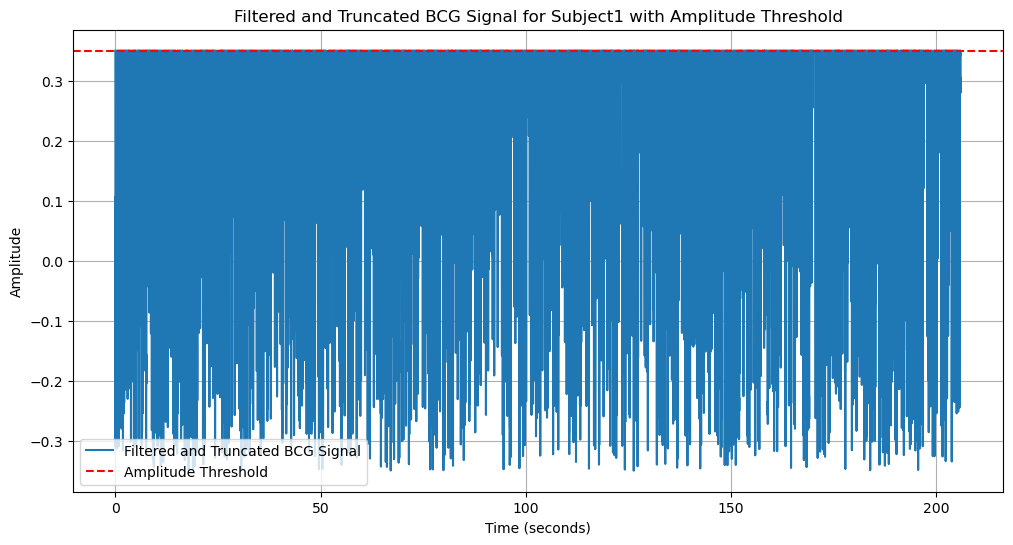

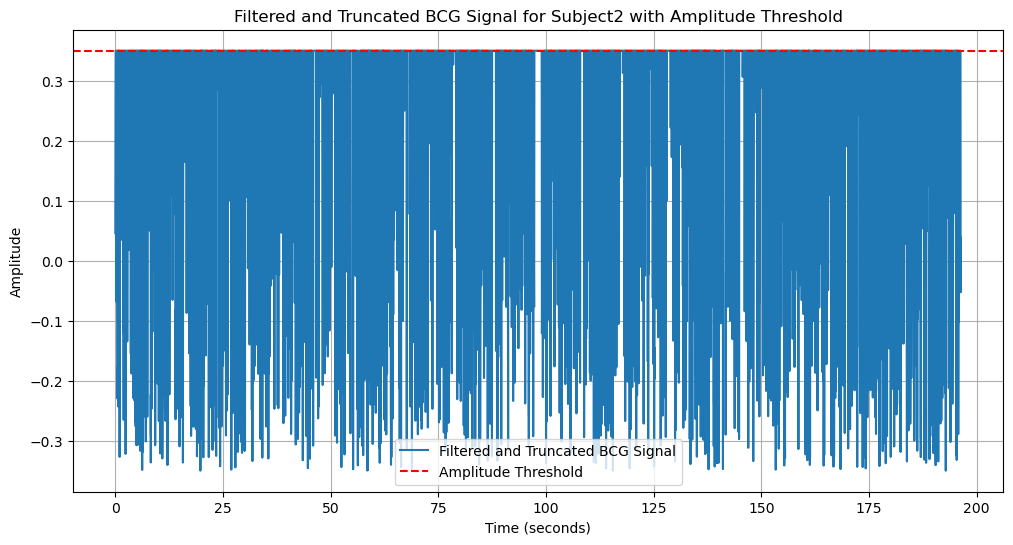

In [6]:
# Truncate the filtered signal at the amplitude threshold
filtered_bcg_signal1_truncated = np.where(np.abs(filtered_bcg_signal1) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal1)
filtered_bcg_signal2_truncated = np.where(np.abs(filtered_bcg_signal2) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal2)
filtered_bcg_signal3_truncated = np.where(np.abs(filtered_bcg_signal3) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal3)
filtered_bcg_signal4_truncated = np.where(np.abs(filtered_bcg_signal4) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal4)
filtered_bcg_signal5_truncated = np.where(np.abs(filtered_bcg_signal5) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal5)
filtered_bcg_signal6_truncated = np.where(np.abs(filtered_bcg_signal6) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal6)
filtered_bcg_signal7_truncated = np.where(np.abs(filtered_bcg_signal7) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal7)
filtered_bcg_signal8_truncated = np.where(np.abs(filtered_bcg_signal8) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal8)
filtered_bcg_signal9_truncated = np.where(np.abs(filtered_bcg_signal9) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal9)
filtered_bcg_signal10_truncated = np.where(np.abs(filtered_bcg_signal10) > amplitude_threshold1, amplitude_threshold1, filtered_bcg_signal10)

# Plot the filtered and truncated BCG signal with amplitude threshold
plt.figure(figsize=(12, 6))
plt.plot(segment_time1, filtered_bcg_signal1_truncated[:segment_samples1], label='Filtered and Truncated BCG Signal')
plt.axhline(y=amplitude_threshold1, color='r', linestyle='--', label='Amplitude Threshold')
plt.title("Filtered and Truncated BCG Signal for Subject1 with Amplitude Threshold")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Plot filtered and truncated BCG signal with amplitude threshold
plt.figure(figsize=(12, 6))
plt.plot(segment_time10, filtered_bcg_signal10_truncated[:segment_samples10], label='Filtered and Truncated BCG Signal')
plt.axhline(y=amplitude_threshold1, color='r', linestyle='--', label='Amplitude Threshold')
plt.title("Filtered and Truncated BCG Signal for Subject2 with Amplitude Threshold")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.signal import butter, filtfilt
from scipy.interpolate import interp1d

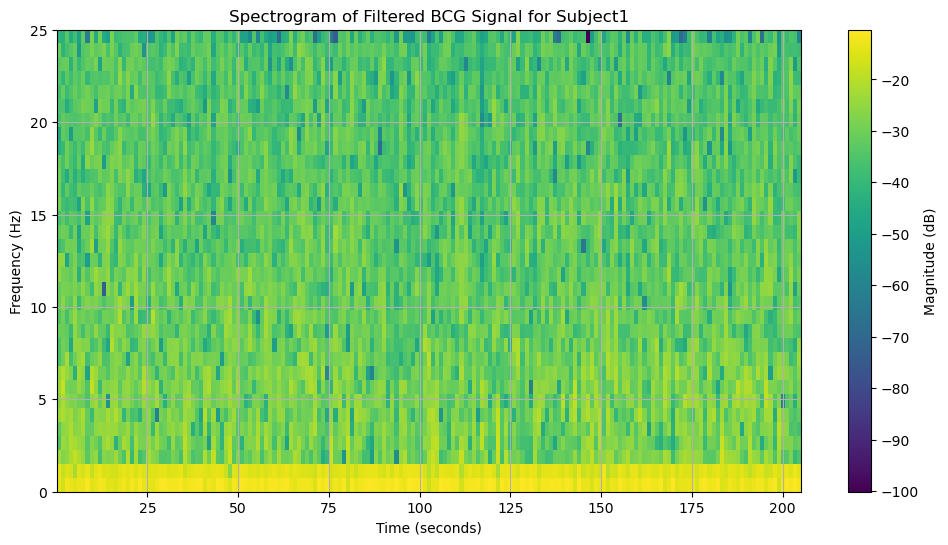

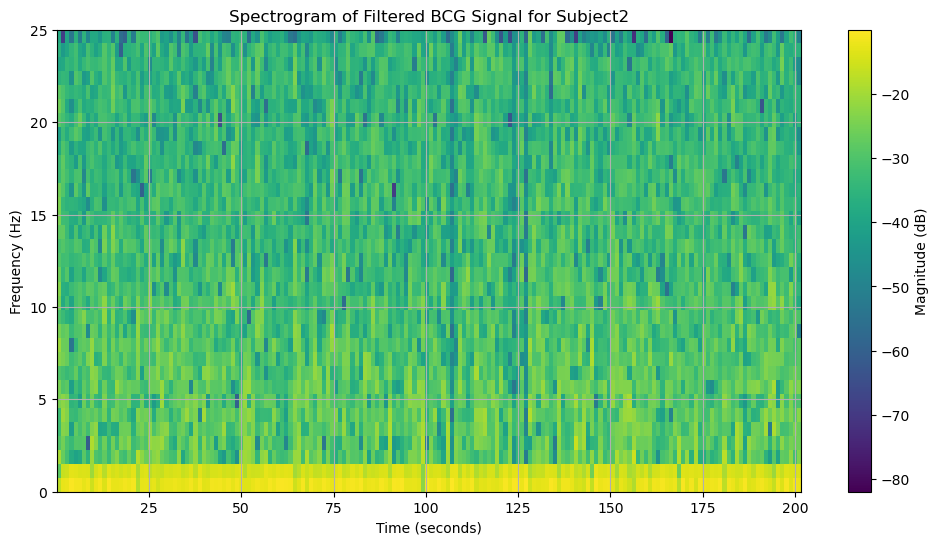

In [8]:
plt.figure(figsize=(12, 6))
plt.specgram(filtered_bcg_signal1_truncated, NFFT=64, Fs=fs, noverlap=8, cmap='viridis')
plt.title("Spectrogram of Filtered BCG Signal for Subject1")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Magnitude (dB)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.specgram(filtered_bcg_signal4_truncated, NFFT=64, Fs=fs, noverlap=8, cmap='viridis')
plt.title("Spectrogram of Filtered BCG Signal for Subject2")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Magnitude (dB)')
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import pywt  

def extract_dwt_features(filtered_signal, wavelet, num_scales):
    coefficients = pywt.wavedec(filtered_signal, wavelet, level=num_scales)
    approximation_coefficients = coefficients[0]
    detail_coefficients = coefficients[1:]

    ace_features = []
    dce_features = []
    wavelet_entropy = []
    acv_features = []
    wavelet_coherence = []

    for i in range(num_scales):
        ace = np.sum(approximation_coefficients[i] ** 2)
        ace_features.append(ace)

        dce = np.sum(detail_coefficients[i] ** 2)
        dce_features.append(dce)


    features_dict = {
        'Approximation_Coefficients': approximation_coefficients,
        'Detail_Coefficients': detail_coefficients,
        'Energy_of_Approximation_Coefficients': ace_features,
        'Energy_of_Detail_Coefficients': dce_features,
        'Wavelet_Entropy': wavelet_entropy,
        'Approximation_Coefficients_Energy': np.sum(ace_features),
        'Detail_Coefficients_Energy': np.sum(dce_features),
        'ACV_Features': acv_features,
        'Wavelet_Coherence': wavelet_coherence
    }

    return features_dict

wavelet = 'bior3.9'
num_scales = 8

features_dict_signal1 = extract_dwt_features(filtered_bcg_signal1_truncated, wavelet, num_scales)
features_dict_signal2 = extract_dwt_features(filtered_bcg_signal2_truncated, wavelet, num_scales)
features_dict_signal3 = extract_dwt_features(filtered_bcg_signal3_truncated, wavelet, num_scales)
features_dict_signal4 = extract_dwt_features(filtered_bcg_signal4_truncated, wavelet, num_scales)
features_dict_signal5 = extract_dwt_features(filtered_bcg_signal5_truncated, wavelet, num_scales)
features_dict_signal6 = extract_dwt_features(filtered_bcg_signal6_truncated, wavelet, num_scales)
features_dict_signal7 = extract_dwt_features(filtered_bcg_signal7_truncated, wavelet, num_scales)
features_dict_signal8 = extract_dwt_features(filtered_bcg_signal8_truncated, wavelet, num_scales)
features_dict_signal9 = extract_dwt_features(filtered_bcg_signal9_truncated, wavelet, num_scales)
features_dict_signal10 = extract_dwt_features(filtered_bcg_signal10_truncated, wavelet, num_scales)

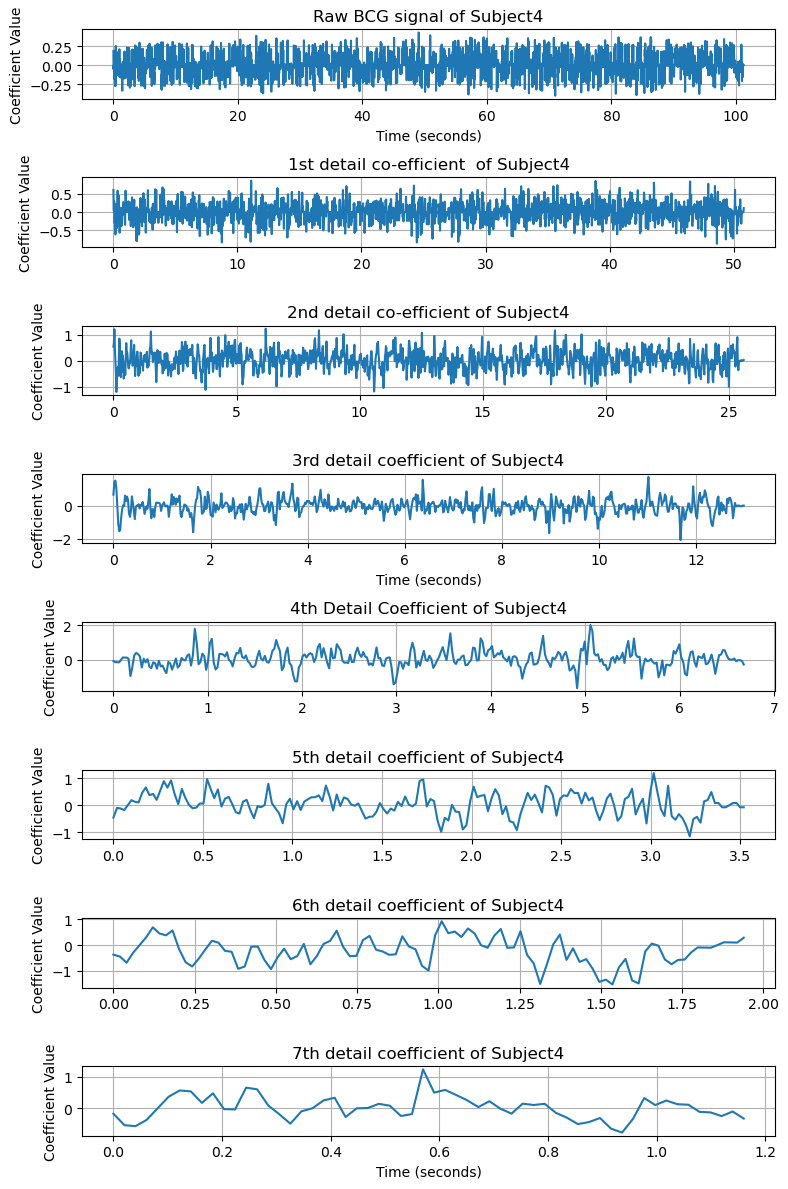

In [15]:
# Retrieve the 3rd detail coefficient from SUBJECT 4
DC0_sub1 = features_dict_signal4['Detail_Coefficients'][7]
DC1_sub1 = features_dict_signal4['Detail_Coefficients'][6]
DC2_sub1 = features_dict_signal4['Detail_Coefficients'][5]
DC3_sub1 = features_dict_signal4['Detail_Coefficients'][4]
DC4_sub1 = features_dict_signal4['Detail_Coefficients'][3]
DC5_sub1 = features_dict_signal4['Detail_Coefficients'][2]
DC6_sub1 = features_dict_signal4['Detail_Coefficients'][1]
DC7_sub1 = features_dict_signal4['Detail_Coefficients'][0]


segment_time_DC0_sub1 = np.linspace(0, len(DC0_sub1) / fs, len(DC0_sub1))
segment_time_DC1_sub1 = np.linspace(0, len(DC1_sub1) / fs, len(DC1_sub1))
segment_time_DC2_sub1 = np.linspace(0, len(DC2_sub1) / fs, len(DC2_sub1))
segment_time_DC3_sub1 = np.linspace(0, len(DC3_sub1) / fs, len(DC3_sub1))
segment_time_DC4_sub1 = np.linspace(0, len(DC4_sub1) / fs, len(DC4_sub1))
segment_time_DC5_sub1 = np.linspace(0, len(DC5_sub1) / fs, len(DC5_sub1))
segment_time_DC6_sub1 = np.linspace(0, len(DC6_sub1) / fs, len(DC6_sub1))
segment_time_DC7_sub1 = np.linspace(0, len(DC7_sub1) / fs, len(DC7_sub1))


# Create a single diagram with all four plots
fig, axes = plt.subplots(nrows=8,ncols=1, figsize=(8, 12))

# Plot the Raw BCG signal
axes[0].plot(segment_time_DC0_sub1, DC0_sub1)
axes[0].set_title('Raw BCG signal of Subject4')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Coefficient Value')
axes[0].grid(True)

# Plot the 1st detail co-efficient 
axes[1].plot(segment_time_DC1_sub1, DC1_sub1)
axes[1].set_title('1st detail co-efficient  of Subject4')
axes[1].set_xlabel('')
axes[1].set_ylabel('Coefficient Value')
axes[1].grid(True)

# Plot the 2nd detail co-efficient 
axes[2].plot(segment_time_DC2_sub1, DC2_sub1)
axes[2].set_title('2nd detail co-efficient of Subject4')
axes[2].set_xlabel('')
axes[2].set_ylabel('Coefficient Value')
axes[2].grid(True)

# Plot the 3rd detail coefficient  
axes[3].plot(segment_time_DC3_sub1, DC3_sub1)
axes[3].set_title('3rd detail coefficient of Subject4')
axes[3].set_xlabel('Time (seconds)')
axes[3].set_ylabel('Coefficient Value')
axes[3].grid(True)

# Plot the 4th detail coefficient
axes[4].plot(segment_time_DC4_sub1, DC4_sub1)
axes[4].set_title('4th Detail Coefficient of Subject4')
axes[4].set_xlabel('')
axes[4].set_ylabel('Coefficient Value')
axes[4].grid(True)

# Plot the 5th detail coefficient 
axes[5].plot(segment_time_DC5_sub1, DC5_sub1)
axes[5].set_title('5th detail coefficient of Subject4')
axes[5].set_xlabel('')
axes[5].set_ylabel('Coefficient Value')
axes[5].grid(True)

# Plot the 6th detail coefficient 
axes[6].plot(segment_time_DC6_sub1, DC6_sub1)
axes[6].set_title('6th detail coefficient of Subject4')
axes[6].set_xlabel('')
axes[6].set_ylabel('Coefficient Value')
axes[6].grid(True)

# Plot the 7th detail coefficient 6th
axes[7].plot(segment_time_DC7_sub1, DC7_sub1)
axes[7].set_title('7th detail coefficient of Subject4')
axes[7].set_xlabel('Time (seconds)')
axes[7].set_ylabel('Coefficient Value')
axes[7].grid(True)


# Adjust layout and show the diagram
plt.tight_layout()
plt.show()

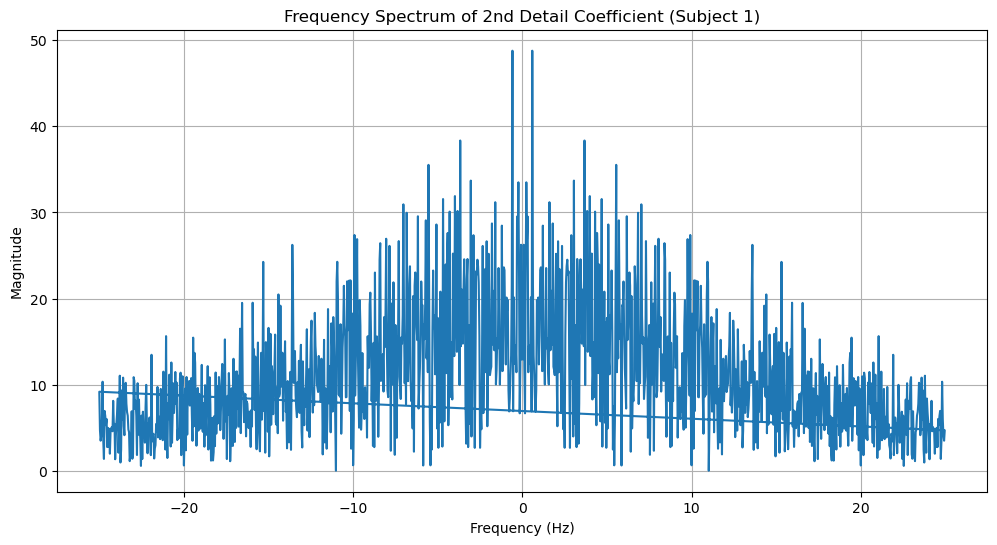

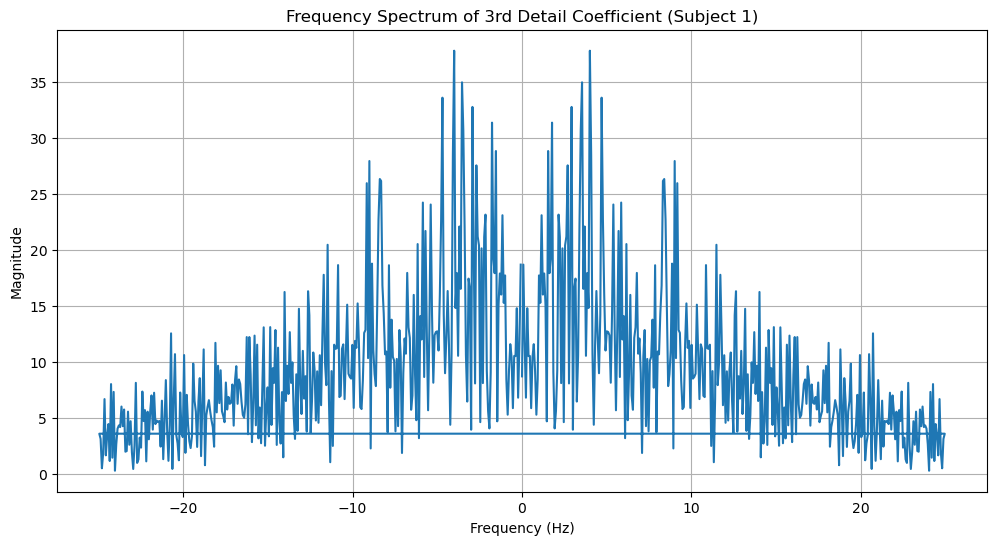

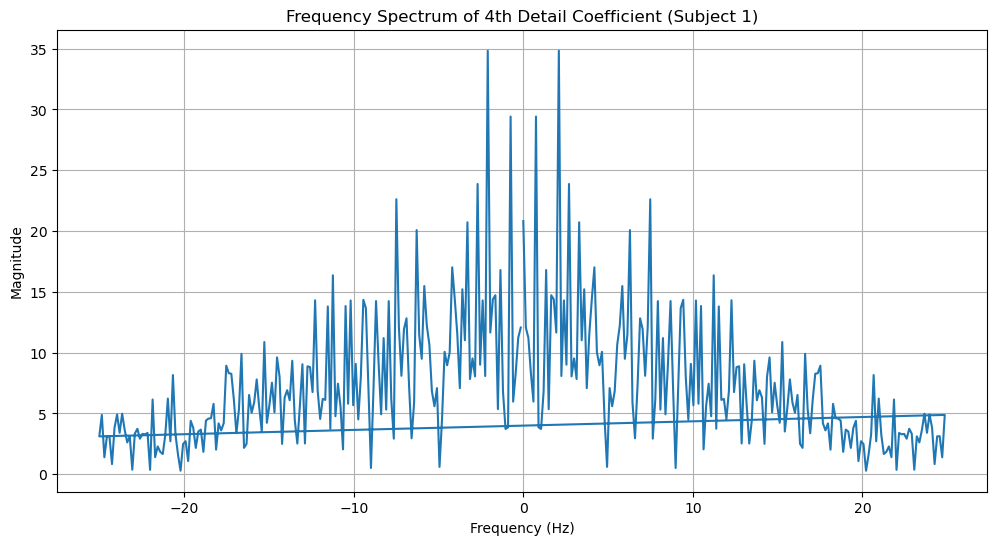

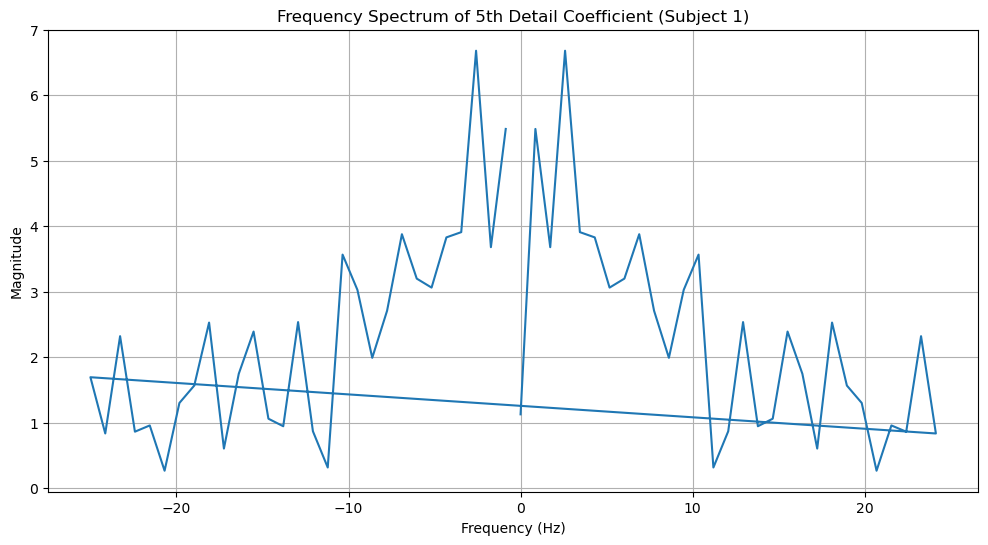

In [16]:
# Compute FFT for each detail coefficient
fft_DC2_sub1 = np.fft.fft(DC2_sub1)
fft_DC3_sub1 = np.fft.fft(DC3_sub1)
fft_DC4_sub1 = np.fft.fft(DC4_sub1)
fft_DC5_sub1 = np.fft.fft(DC5_sub1)
fft_DC7_sub1 = np.fft.fft(DC7_sub1)


# Calculate frequency values for the x-axis
freq_axis = np.fft.fftfreq(len(DC2_sub1), d=1/fs)
# Plot the Frequency Spectrum for each detail coefficient
plt.figure(figsize=(12, 6))
plt.plot(freq_axis, np.abs(fft_DC2_sub1))
plt.title('Frequency Spectrum of 2nd Detail Coefficient (Subject 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Calculate frequency values for the x-axis
freq_axis = np.fft.fftfreq(len(DC3_sub1), d=1/fs)
plt.figure(figsize=(12, 6))
plt.plot(freq_axis, np.abs(fft_DC3_sub1))
plt.title('Frequency Spectrum of 3rd Detail Coefficient (Subject 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

freq_axis = np.fft.fftfreq(len(DC4_sub1), d=1/fs)
plt.figure(figsize=(12, 6))
plt.plot(freq_axis, np.abs(fft_DC4_sub1))
plt.title('Frequency Spectrum of 4th Detail Coefficient (Subject 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

freq_axis = np.fft.fftfreq(len(DC7_sub1), d=1/fs)
plt.figure(figsize=(12, 6))
plt.plot(freq_axis, np.abs(fft_DC7_sub1))
plt.title('Frequency Spectrum of 5th Detail Coefficient (Subject 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# SUBJECT 1 DWT DECOMPOSITION AND CARDIAC SIGNAL

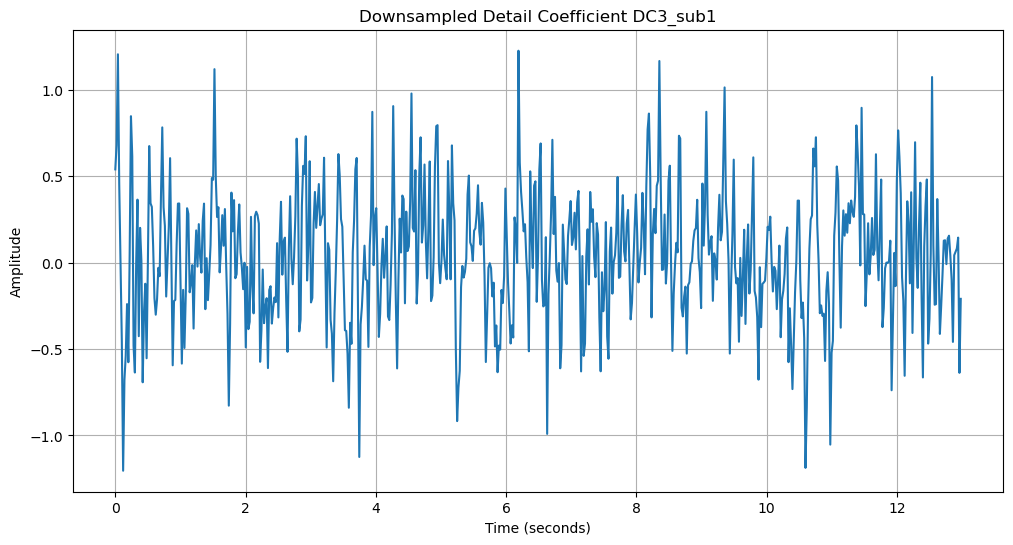

In [24]:
# Downsample DC3_sub1 to match the length of DC4_sub1
downsampled_length = len(DC3_sub1)
downsampled_DC3_sub1 = DC2_sub1[:downsampled_length]


# time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub1 = np.linspace(0, len(downsampled_DC3_sub1) / fs, len(downsampled_DC3_sub1))

cardiac_signal_sub1 = DC2_sub1[:downsampled_length]

# Plot the downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub1, cardiac_signal_sub1)
plt.title("Downsampled Detail Coefficient DC3_sub1")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

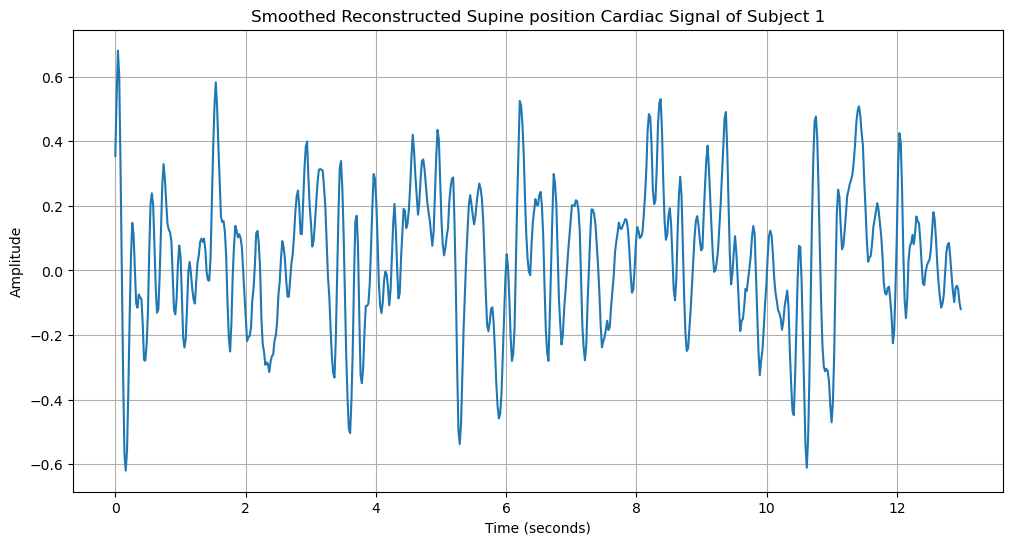

In [20]:
from scipy import interpolate

#  smoothing window size
window_size = 4


#  empty array for the smoothed signal
smoothed_cardiac_signal_sub1 = np.zeros_like(cardiac_signal_sub1)

#  moving average smoothing
for i in range(len(cardiac_signal_sub1)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub1), i + window_size // 2 )
    smoothed_cardiac_signal_sub1[i] = np.mean(cardiac_signal_sub1[start_idx:end_idx])
    
smoothed_cardiac_signal_sub1 = np.convolve(smoothed_cardiac_signal_sub1, np.ones(window_size)/window_size, mode='same')


# Plot the smoothed reconstructed cardiac signal
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub1, smoothed_cardiac_signal_sub1)
plt.title("Smoothed Reconstructed Supine position Cardiac Signal of Subject 1")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

cardiac_signal_sub1 = smoothed_cardiac_signal_sub1

# SUBJECT 2 DWT DECOMPOSITION AND CARDIAC SIGNAL

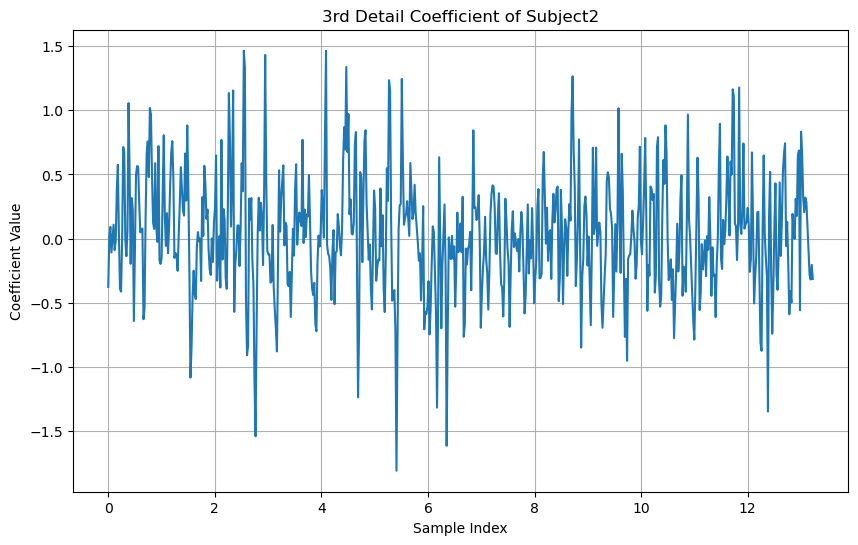

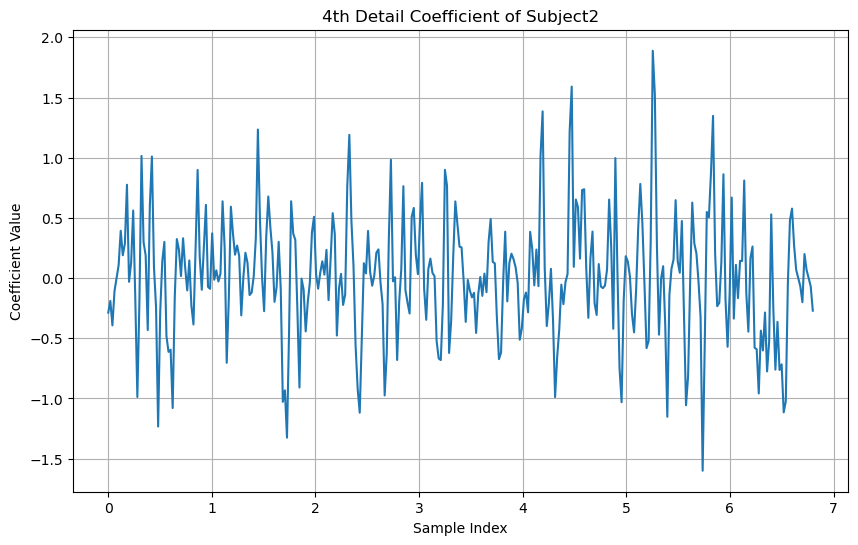

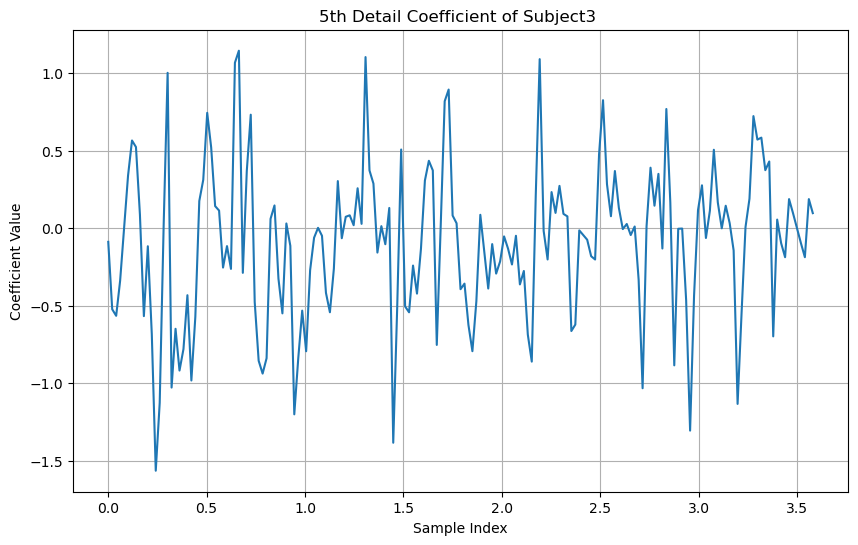

In [25]:
# Retrieve the 3rd detail coefficient from the features_dict_signal1 dictionary
DC2_sub2 = features_dict_signal2['Detail_Coefficients'][5]
DC3_sub2 = features_dict_signal2['Detail_Coefficients'][4]
DC4_sub2 = features_dict_signal2['Detail_Coefficients'][3]
DC5_sub2 = features_dict_signal2['Detail_Coefficients'][2]

segment_time_DC3_sub2 = np.linspace(0, len(DC3_sub2) / fs, len(DC3_sub2))
segment_time_DC4_sub2 = np.linspace(0, len(DC4_sub2) / fs, len(DC4_sub2))
segment_time_DC5_sub2 = np.linspace(0, len(DC5_sub2) / fs, len(DC5_sub2))
segment_time_DC2_sub2 = np.linspace(0, len(DC2_sub2) / fs, len(DC2_sub2))



# Plot the 3rd detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC3_sub2, DC3_sub2)
plt.title('3rd Detail Coefficient of Subject2')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 4th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC4_sub2, DC4_sub2)
plt.title('4th Detail Coefficient of Subject2')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 5th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC5_sub2, DC5_sub2)
plt.title('5th Detail Coefficient of Subject3 ')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

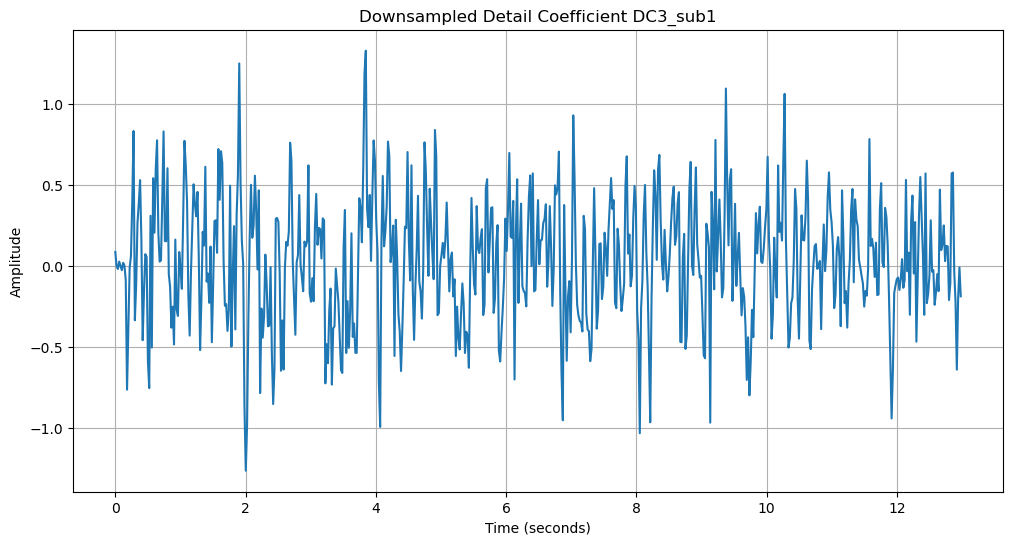

In [26]:
# Downsample DC3_sub3 to match the length of DC4_sub3
downsampled_length = len(DC3_sub1)
downsampled_DC3_sub2 = DC2_sub2[:downsampled_length]


#  time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub2 = np.linspace(0, len(downsampled_DC3_sub2) / fs, len(downsampled_DC3_sub2))

cardiac_signal_sub2 = DC2_sub2[:downsampled_length]

plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub2, cardiac_signal_sub2)
plt.title("Downsampled Detail Coefficient DC3_sub1")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

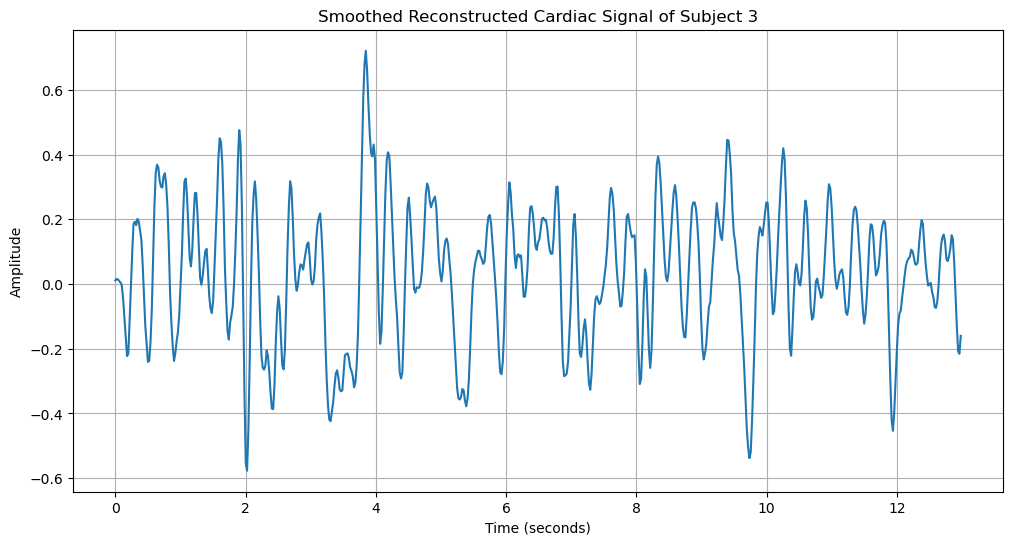

In [27]:

# smoothing window size
window_size = 4


#  empty array for the smoothed signal
smoothed_cardiac_signal_sub2 = np.zeros_like(cardiac_signal_sub2)

# Apply  moving average smoothing
for i in range(len(cardiac_signal_sub2)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub2), i + window_size // 2+1)
    smoothed_cardiac_signal_sub2[i] = np.mean(cardiac_signal_sub2[start_idx:end_idx])
    

smoothed_cardiac_signal_sub2 = np.convolve(smoothed_cardiac_signal_sub2, np.ones(window_size)/window_size, mode='same')


# Plot the smoothed reconstructed cardiac signal
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub2, smoothed_cardiac_signal_sub2)
plt.title("Smoothed Reconstructed Cardiac Signal of Subject 3")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

cardiac_signal_sub2 = smoothed_cardiac_signal_sub2

# SUBJECT 3 DWT DECOMPOSITION AND CARDIAC SIGNAL

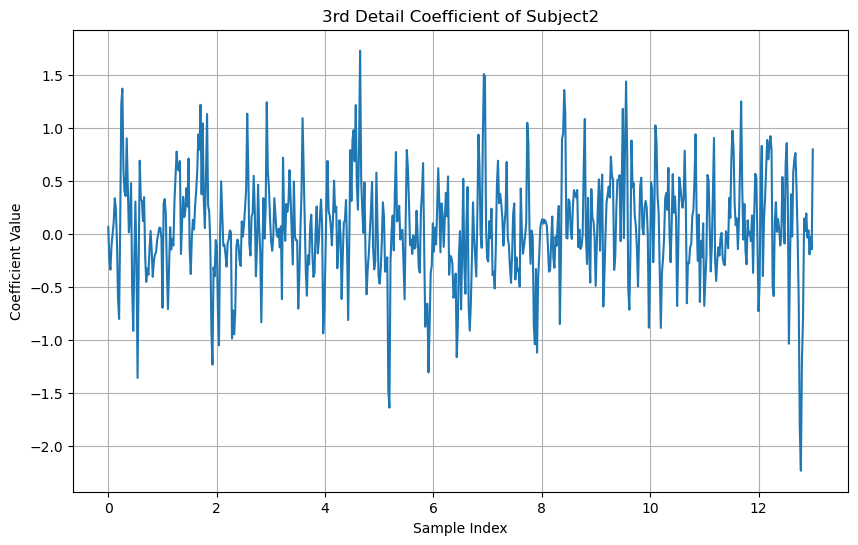

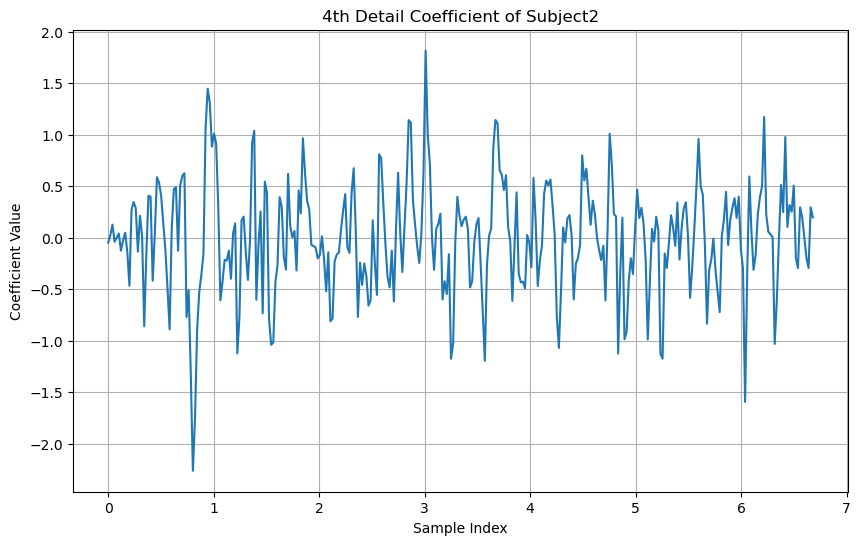

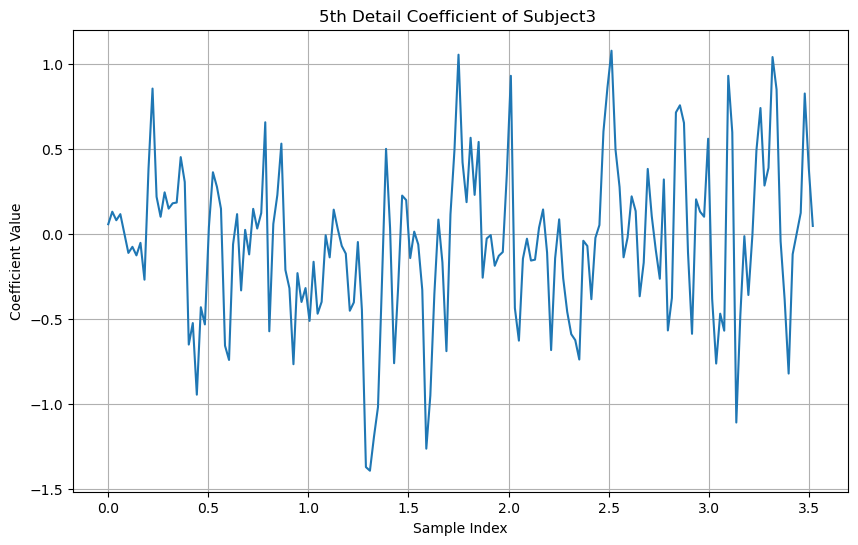

In [28]:
# Retrieve the 3rd detail coefficient of subject 3
DC2_sub3 = features_dict_signal3['Detail_Coefficients'][5]
DC3_sub3 = features_dict_signal3['Detail_Coefficients'][4]
DC4_sub3 = features_dict_signal3['Detail_Coefficients'][3]
DC5_sub3 = features_dict_signal3['Detail_Coefficients'][2]

segment_time_DC3_sub3 = np.linspace(0, len(DC3_sub3) / fs, len(DC3_sub3))
segment_time_DC4_sub3 = np.linspace(0, len(DC4_sub3) / fs, len(DC4_sub3))
segment_time_DC5_sub3 = np.linspace(0, len(DC5_sub3) / fs, len(DC5_sub3))
segment_time_DC2_sub3 = np.linspace(0, len(DC2_sub3) / fs, len(DC2_sub3))



# Plot the 3rd detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC3_sub3, DC3_sub3)
plt.title('3rd Detail Coefficient of Subject2')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 4th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC4_sub3, DC4_sub3)
plt.title('4th Detail Coefficient of Subject2')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 5th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC5_sub3, DC5_sub3)
plt.title('5th Detail Coefficient of Subject3 ')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

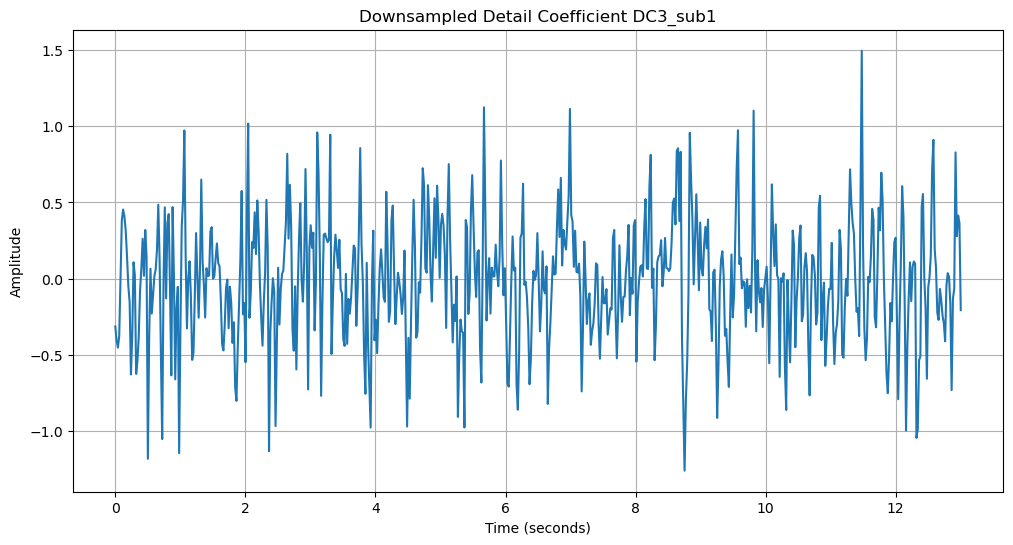

In [29]:
# Downsample DC3_sub3 to match the length of DC4_sub3
downsampled_length = len(DC3_sub3)
downsampled_DC3_sub3 = DC2_sub3[:downsampled_length]


#  time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub3 = np.linspace(0, len(downsampled_DC3_sub3) / fs, len(downsampled_DC3_sub3))

cardiac_signal_sub3 = DC2_sub3[:downsampled_length]

plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub3, cardiac_signal_sub3)
plt.title("Downsampled Detail Coefficient DC3_sub1")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

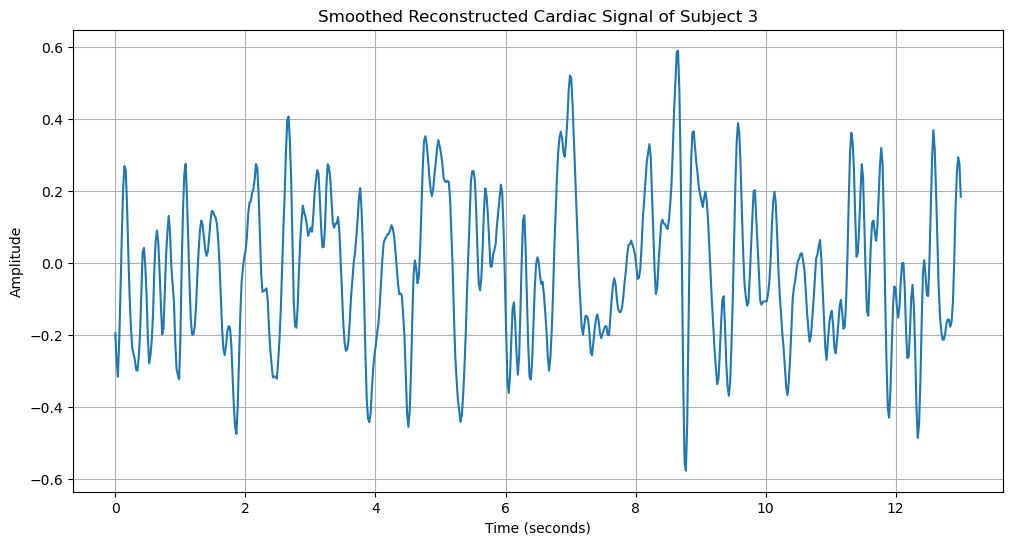

In [30]:
#  smoothing window size
window_size = 4

#  empty array for the smoothed signal
smoothed_cardiac_signal_sub3 = np.zeros_like(cardiac_signal_sub3)

# Apply the moving average smoothing
for i in range(len(cardiac_signal_sub3)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub3), i + window_size // 2+1)
    smoothed_cardiac_signal_sub3[i] = np.mean(cardiac_signal_sub3[start_idx:end_idx])
    

smoothed_cardiac_signal_sub3 = np.convolve(smoothed_cardiac_signal_sub3, np.ones(window_size)/window_size, mode='same')


# Plot the smoothed reconstructed cardiac signal
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub3, smoothed_cardiac_signal_sub3)
plt.title("Smoothed Reconstructed Cardiac Signal of Subject 3")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

cardiac_signal_sub3 = smoothed_cardiac_signal_sub3

# SUBJECT 4 DWT DECOMPOSITION AND CARDIAC SIGNAL

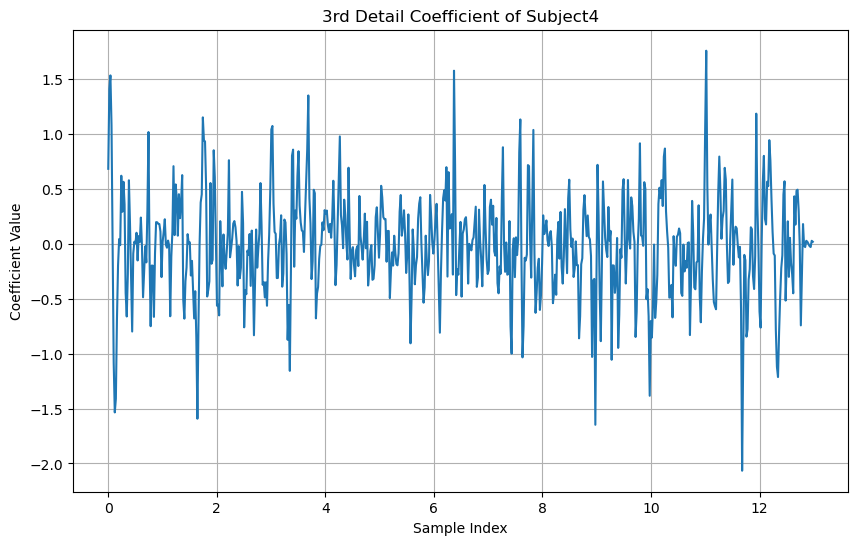

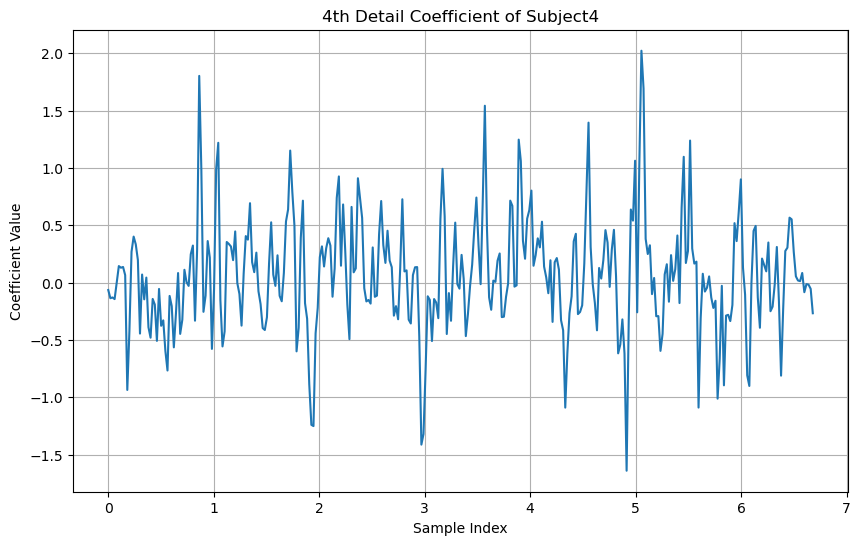

In [34]:
# Retrieve the 3rd detail coefficient for subject 4
DC2_sub4 = features_dict_signal4['Detail_Coefficients'][5]
DC3_sub4 = features_dict_signal4['Detail_Coefficients'][4]
DC4_sub4 = features_dict_signal4['Detail_Coefficients'][3]
DC5_sub4 = features_dict_signal4['Detail_Coefficients'][2]

segment_time_DC3_sub4 = np.linspace(0, len(DC3_sub4) / fs, len(DC3_sub4))
segment_time_DC4_sub4 = np.linspace(0, len(DC4_sub4) / fs, len(DC4_sub4))
segment_time_DC5_sub4 = np.linspace(0, len(DC5_sub4) / fs, len(DC5_sub4))
segment_time_DC2_sub4 = np.linspace(0, len(DC2_sub4) / fs, len(DC2_sub4))



# Plot the 3rd detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC3_sub4, DC3_sub4)
plt.title('3rd Detail Coefficient of Subject4')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 4th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC4_sub4, DC4_sub4)
plt.title('4th Detail Coefficient of Subject4')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

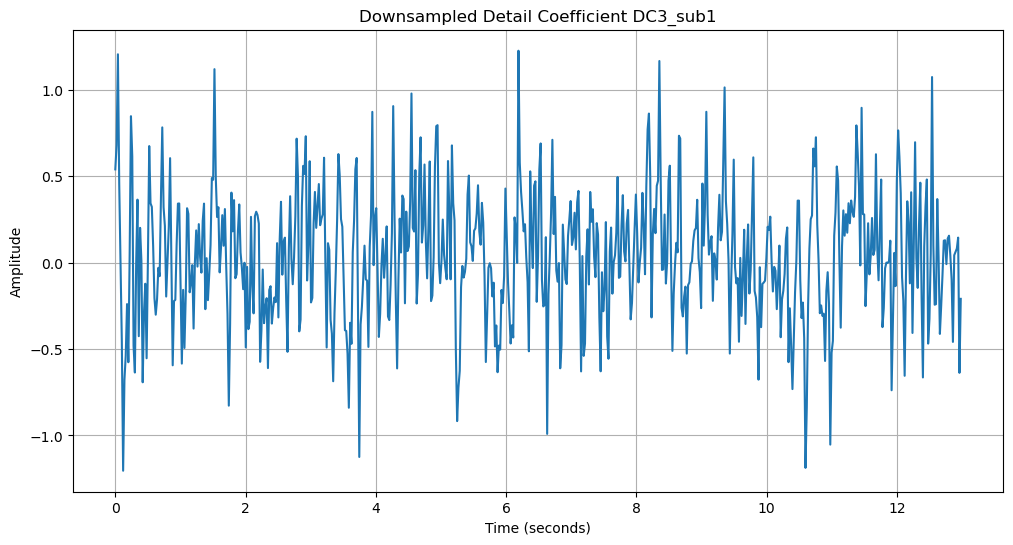

In [33]:
# Downsample DC3_sub4 to match the length of DC4_sub4
downsampled_length = len(DC3_sub4)
downsampled_DC3_sub4 = DC3_sub4[:downsampled_length]


#  time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub4 = np.linspace(0, len(downsampled_DC3_sub4) / fs, len(downsampled_DC3_sub4))

cardiac_signal_sub4 = DC2_sub4[:downsampled_length]

#  downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub4, cardiac_signal_sub4)
plt.title("Downsampled Detail Coefficient DC3_   sub4")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

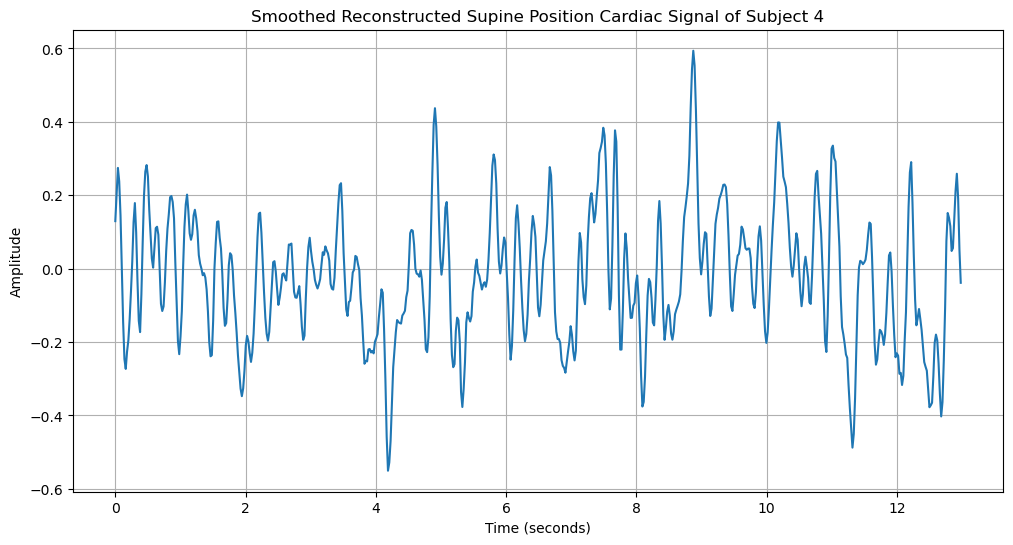

In [1221]:
# smoothing window size
window_size = 4

# empty array for the smoothed signal
smoothed_cardiac_signal_sub4 = np.zeros_like(cardiac_signal_sub4)

# Apply the moving average smoothing
for i in range(len(cardiac_signal_sub4)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub4), i + window_size // 2)
    smoothed_cardiac_signal_sub4[i] = np.mean(cardiac_signal_sub4[start_idx:end_idx])
    
smoothed_cardiac_signal_sub4 = np.convolve(smoothed_cardiac_signal_sub4, np.ones(window_size)/window_size, mode='same')


# Plot the smoothed reconstructed cardiac signal
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub4, smoothed_cardiac_signal_sub4)
plt.title("Smoothed Reconstructed Supine Position Cardiac Signal of Subject 4")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

cardiac_signal_sub4 = smoothed_cardiac_signal_sub4

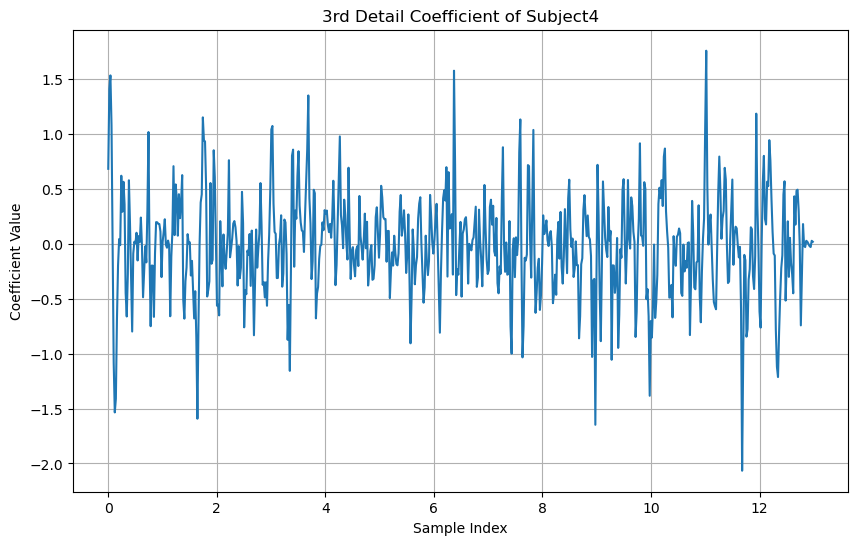

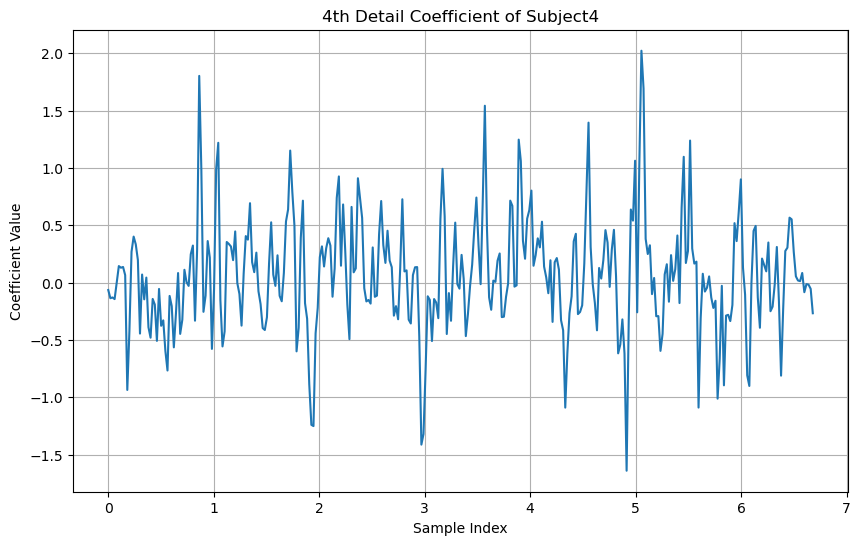

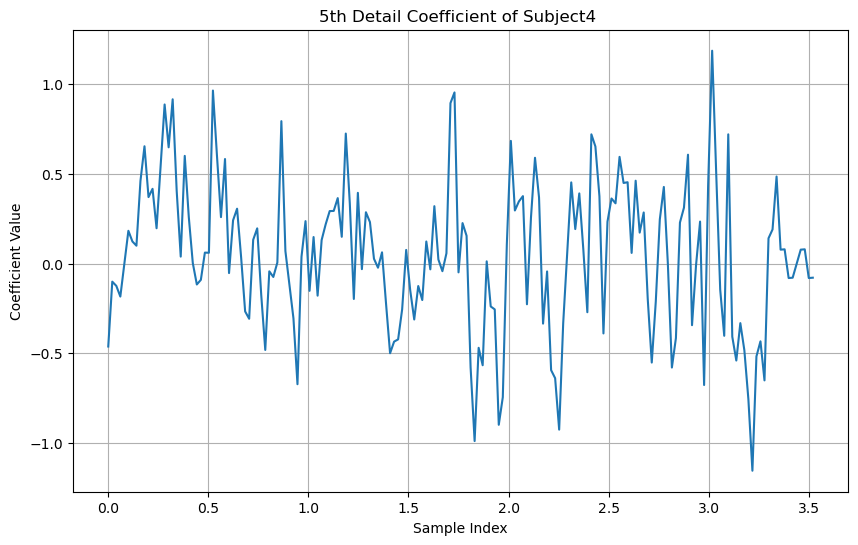

In [35]:
# Retrieve the 3rd detail coefficient from the features_dict_signal1 dictionary
DC2_sub4 = features_dict_signal4['Detail_Coefficients'][5]
DC3_sub4 = features_dict_signal4['Detail_Coefficients'][4]
DC4_sub4 = features_dict_signal4['Detail_Coefficients'][3]
DC5_sub4 = features_dict_signal4['Detail_Coefficients'][2]

segment_time_DC3_sub4 = np.linspace(0, len(DC3_sub4) / fs, len(DC3_sub4))
segment_time_DC4_sub4 = np.linspace(0, len(DC4_sub4) / fs, len(DC4_sub4))
segment_time_DC5_sub4 = np.linspace(0, len(DC5_sub4) / fs, len(DC5_sub4))
segment_time_DC2_sub4 = np.linspace(0, len(DC2_sub4) / fs, len(DC2_sub4))


# Plot the 3rd detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC3_sub4, DC3_sub4)
plt.title('3rd Detail Coefficient of Subject4')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 4th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC4_sub4, DC4_sub4)
plt.title('4th Detail Coefficient of Subject4')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Plot the 5th detail coefficient
plt.figure(figsize=(10, 6))
plt.plot(segment_time_DC5_sub4, DC5_sub4)
plt.title('5th Detail Coefficient of Subject4 ')
plt.xlabel('Sample Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# SUBJECT 5 DWT DECOMPOSITION AND CARDIAC SIGNAL

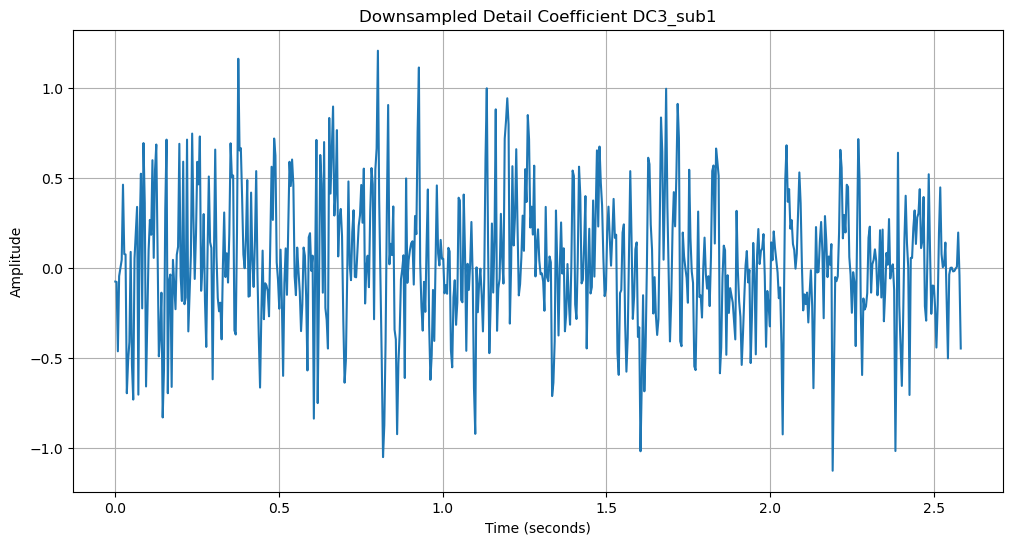

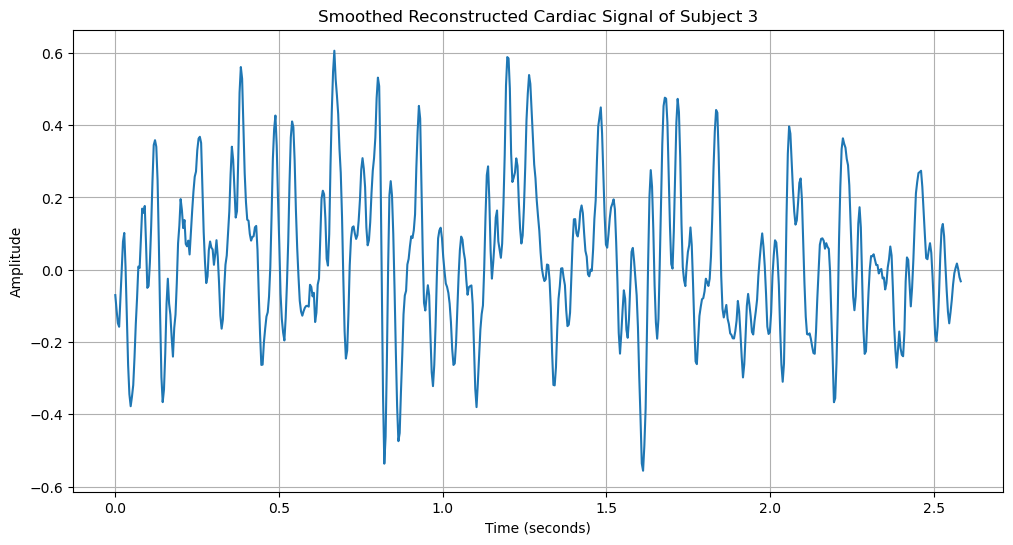

In [496]:
DC2_sub5 = features_dict_signal5['Detail_Coefficients'][5]
DC3_sub5 = features_dict_signal5['Detail_Coefficients'][4]
DC4_sub5 = features_dict_signal5['Detail_Coefficients'][3]
DC5_sub5 = features_dict_signal5['Detail_Coefficients'][2]

segment_time_DC3_sub5 = np.linspace(0, len(DC3_sub5) / fs, len(DC3_sub5))
segment_time_DC4_sub5 = np.linspace(0, len(DC4_sub5) / fs, len(DC4_sub5))
segment_time_DC5_sub5 = np.linspace(0, len(DC5_sub5) / fs, len(DC5_sub5))
segment_time_DC2_sub5 = np.linspace(0, len(DC2_sub5) / fs, len(DC2_sub5))


# Downsample DC3_sub5 to match the length of DC2_sub5
downsampled_length = len(DC3_sub5)
downsampled_DC3_sub5 = DC2_sub5[:downsampled_length]


# time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub5 = np.linspace(0, len(downsampled_DC3_sub5) / fs, len(downsampled_DC3_sub5))

cardiac_signal_sub5 = DC2_sub5[:downsampled_length]

# Plot the downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub5, cardiac_signal_sub5)
plt.title("Downsampled Detail Coefficient DC3_sub1")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()



window_size = 4

# empty array for the smoothed signal
smoothed_cardiac_signal_sub5 = np.zeros_like(cardiac_signal_sub5)

# Apply the moving average smoothing
for i in range(len(cardiac_signal_sub5)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub5), i + window_size // 2)
    smoothed_cardiac_signal_sub5[i] = np.mean(cardiac_signal_sub5[start_idx:end_idx])
    
smoothed_cardiac_signal_sub5 = np.convolve(smoothed_cardiac_signal_sub5, np.ones(window_size)/window_size, mode='same')



# Plot the smoothed reconstructed cardiac signal
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub5, smoothed_cardiac_signal_sub5)
plt.title("Smoothed Reconstructed Cardiac Signal of Subject 3")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

cardiac_signal_sub5 = smoothed_cardiac_signal_sub5

# SUBJECT 6 - 10 DWT DECOMPOSITION AND CARDIAC SIGNAL

In [38]:
DC2_sub6 = features_dict_signal6['Detail_Coefficients'][5] ; segment_time_DC2_sub6 = np.linspace(0, len(DC2_sub6) / fs, len(DC2_sub6))
DC3_sub6 = features_dict_signal6['Detail_Coefficients'][4] ; segment_time_DC3_sub6 = np.linspace(0, len(DC3_sub6) / fs, len(DC3_sub6))
DC4_sub6 = features_dict_signal6['Detail_Coefficients'][3] ; segment_time_DC4_sub6 = np.linspace(0, len(DC4_sub6) / fs, len(DC4_sub6))
DC5_sub6 = features_dict_signal6['Detail_Coefficients'][2] ; segment_time_DC5_sub6 = np.linspace(0, len(DC5_sub6) / fs, len(DC5_sub6))

DC2_sub7 = features_dict_signal7['Detail_Coefficients'][5] ; segment_time_DC2_sub7 = np.linspace(0, len(DC2_sub7) / fs, len(DC2_sub7))
DC3_sub7 = features_dict_signal7['Detail_Coefficients'][4] ; segment_time_DC3_sub7 = np.linspace(0, len(DC3_sub7) / fs, len(DC3_sub7))
DC4_sub7 = features_dict_signal7['Detail_Coefficients'][3] ; segment_time_DC4_sub7 = np.linspace(0, len(DC4_sub7) / fs, len(DC4_sub7))
DC5_sub7 = features_dict_signal7['Detail_Coefficients'][2] ; segment_time_DC5_sub7 = np.linspace(0, len(DC5_sub7) / fs, len(DC5_sub7))

DC2_sub8 = features_dict_signal8['Detail_Coefficients'][5] ; segment_time_DC2_sub8 = np.linspace(0, len(DC2_sub8) / fs, len(DC2_sub8))
DC3_sub8 = features_dict_signal8['Detail_Coefficients'][4] ; segment_time_DC3_sub8 = np.linspace(0, len(DC3_sub8) / fs, len(DC3_sub8))
DC4_sub8 = features_dict_signal8['Detail_Coefficients'][3] ; segment_time_DC4_sub8 = np.linspace(0, len(DC4_sub8) / fs, len(DC4_sub8))
DC5_sub8 = features_dict_signal8['Detail_Coefficients'][2] ; segment_time_DC5_sub8 = np.linspace(0, len(DC5_sub8) / fs, len(DC5_sub8))

DC2_sub9 = features_dict_signal9['Detail_Coefficients'][5] ; segment_time_DC2_sub9 = np.linspace(0, len(DC2_sub9) / fs, len(DC2_sub9))
DC3_sub9 = features_dict_signal9['Detail_Coefficients'][4] ; segment_time_DC3_sub9 = np.linspace(0, len(DC3_sub9) / fs, len(DC3_sub9))
DC4_sub9 = features_dict_signal9['Detail_Coefficients'][3] ; segment_time_DC4_sub9 = np.linspace(0, len(DC4_sub9) / fs, len(DC4_sub9))
DC5_sub9 = features_dict_signal9['Detail_Coefficients'][2] ; segment_time_DC5_sub9 = np.linspace(0, len(DC5_sub9) / fs, len(DC5_sub9))

DC2_sub10 = features_dict_signal10['Detail_Coefficients'][5] ; segment_time_DC2_sub10 = np.linspace(0, len(DC2_sub10) / fs, len(DC2_sub10))
DC3_sub10 = features_dict_signal10['Detail_Coefficients'][4] ; segment_time_DC3_sub10 = np.linspace(0, len(DC3_sub10) / fs, len(DC3_sub10))
DC4_sub10 = features_dict_signal10['Detail_Coefficients'][3] ; segment_time_DC4_sub10 = np.linspace(0, len(DC4_sub10) / fs, len(DC4_sub10))
DC5_sub10 = features_dict_signal10['Detail_Coefficients'][2] ; segment_time_DC5_sub10 = np.linspace(0, len(DC5_sub10) / fs, len(DC5_sub10))

#  SUBJECT 6 - 10 DOWNSAMPLING TO CARDIAC SIGNAL

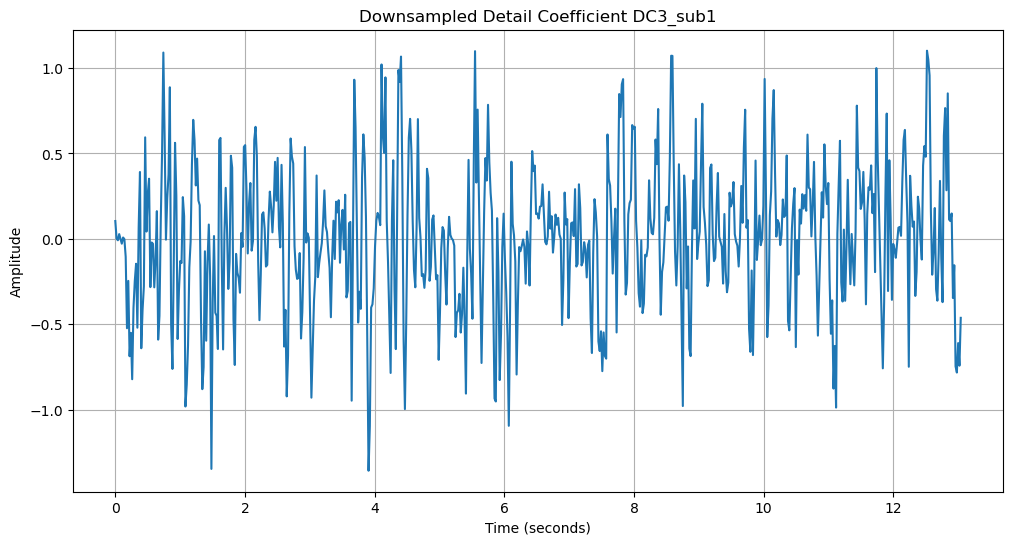

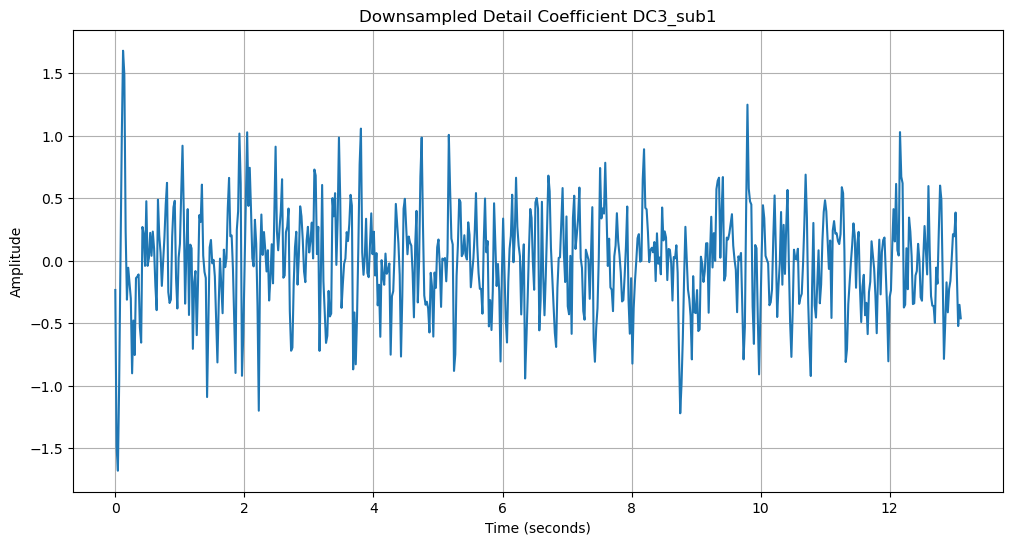

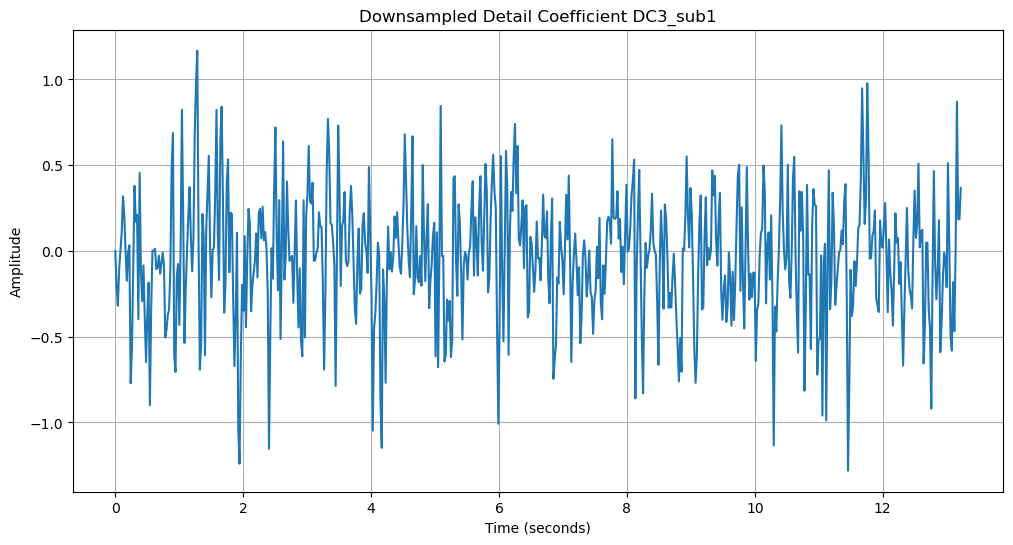

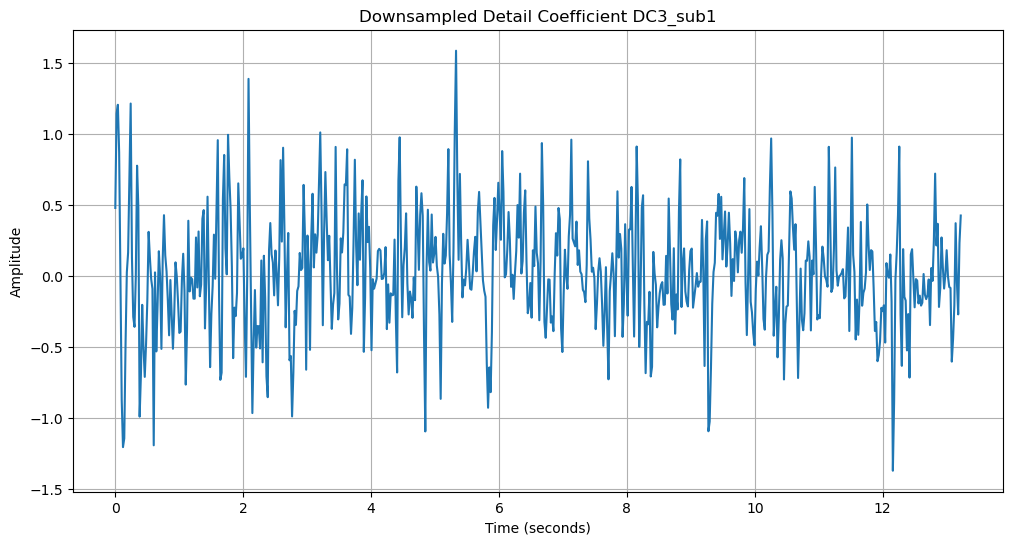

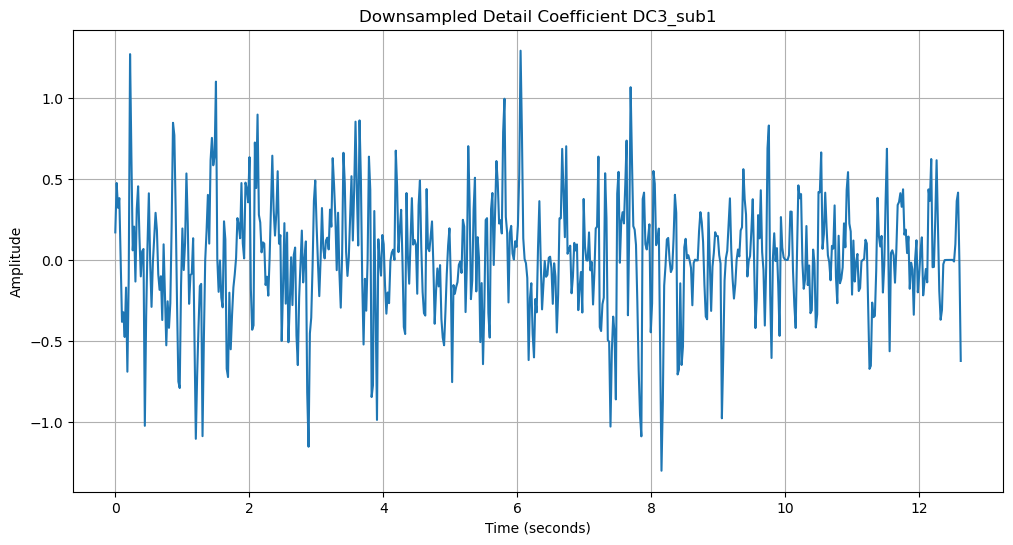

In [39]:
# Downsample DC2_sub6 to match the length of DC3_sub6
downsampled_length = len(DC3_sub6)
downsampled_DC3_sub6 = DC2_sub6[:downsampled_length]


# Time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub6 = np.linspace(0, len(downsampled_DC3_sub6) / fs, len(downsampled_DC3_sub6))

cardiac_signal_sub6 = DC2_sub6[:downsampled_length]

# Plot the downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub6, cardiac_signal_sub6)
plt.title("Downsampled Detail Coefficient DC3_sub6")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()





# Downsample DC2_sub7 to match the length of DC3_sub7
downsampled_length = len(DC3_sub7)
downsampled_DC3_sub7 = DC2_sub7[:downsampled_length]


# time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub7 = np.linspace(0, len(downsampled_DC3_sub7) / fs, len(downsampled_DC3_sub7))

cardiac_signal_sub7 = DC2_sub7[:downsampled_length]

# Plot the downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub7, cardiac_signal_sub7)
plt.title("Downsampled Detail Coefficient DC3_sub7")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()




# Downsample DC2_sub8 to match the length of DC3_sub8
downsampled_length = len(DC3_sub8)
downsampled_DC3_sub8 = DC2_sub8[:downsampled_length]


# time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub8 = np.linspace(0, len(downsampled_DC3_sub8) / fs, len(downsampled_DC3_sub8))

cardiac_signal_sub8 = DC2_sub8[:downsampled_length]

# Plot the downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub8, cardiac_signal_sub8)
plt.title("Downsampled Detail Coefficient DC3_sub8")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()





# Downsample DC2_sub9 to match the length of DC3_sub9
downsampled_length = len(DC3_sub9)
downsampled_DC3_sub9 = DC2_sub9[:downsampled_length]


#  time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub9 = np.linspace(0, len(downsampled_DC3_sub9) / fs, len(downsampled_DC3_sub9))

cardiac_signal_sub9 = DC2_sub9[:downsampled_length]

# Plot the downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub9, cardiac_signal_sub9)
plt.title("Downsampled Detail Coefficient DC3_sub9")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()



# Downsample DC2_sub10 to match the length of DC3_sub10
downsampled_length = len(DC3_sub10)
downsampled_DC3_sub10 = DC2_sub10[:downsampled_length]


# time array for the downsampled detail coefficient
segment_time_downsampled_DC3_sub10 = np.linspace(0, len(downsampled_DC3_sub10) / fs, len(downsampled_DC3_sub10))

cardiac_signal_sub10 = DC2_sub10[:downsampled_length]

# Plot the downsampled detail coefficient with its corresponding time domain
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub10, cardiac_signal_sub10)
plt.title("Downsampled Detail Coefficient DC3_sub10")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# SUBJECT 6 - 10 SMOOTHING OF CARDIAC SIGNAL

In [40]:


window_size = 4
# Apply moving average smoothing
smoothed_cardiac_signal_sub6 = np.zeros_like(cardiac_signal_sub6)
for i in range(len(cardiac_signal_sub6)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub6), i + window_size // 2+1)
    smoothed_cardiac_signal_sub6[i] = np.mean(cardiac_signal_sub6[start_idx:end_idx])
smoothed_cardiac_signal_sub6 = np.convolve(smoothed_cardiac_signal_sub6, np.ones(window_size)/window_size, mode='same')


window_size = 4
smoothed_cardiac_signal_sub7 = np.zeros_like(cardiac_signal_sub7)
# Apply moving average smoothing
for i in range(len(cardiac_signal_sub7)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub7), i + window_size // 2+1)
    smoothed_cardiac_signal_sub7[i] = np.mean(cardiac_signal_sub7[start_idx:end_idx])
smoothed_cardiac_signal_sub7 = np.convolve(smoothed_cardiac_signal_sub7, np.ones(window_size)/window_size, mode='same')
    
    
window_size = 4
smoothed_cardiac_signal_sub8 = np.zeros_like(cardiac_signal_sub8)
# Apply moving average smoothing
for i in range(len(cardiac_signal_sub8)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub8), i + window_size // 2+1)
    smoothed_cardiac_signal_sub8[i] = np.mean(cardiac_signal_sub8[start_idx:end_idx])
smoothed_cardiac_signal_sub8 = np.convolve(smoothed_cardiac_signal_sub8, np.ones(window_size)/window_size, mode='same')


window_size = 4
smoothed_cardiac_signal_sub9 = np.zeros_like(cardiac_signal_sub8)
# Apply moving average smoothing
for i in range(len(cardiac_signal_sub9)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub9), i + window_size // 2+1)
    smoothed_cardiac_signal_sub9[i] = np.mean(cardiac_signal_sub9[start_idx:end_idx])
smoothed_cardiac_signal_sub9 = np.convolve(smoothed_cardiac_signal_sub9, np.ones(window_size)/window_size, mode='same')


window_size = 4
smoothed_cardiac_signal_sub10 = np.zeros_like(cardiac_signal_sub10)
# Apply smoothing
for i in range(len(cardiac_signal_sub10)):
    start_idx = max(0, i - window_size // 2)
    end_idx = min(len(cardiac_signal_sub10), i + window_size // 2)
    smoothed_cardiac_signal_sub10[i] = np.mean(cardiac_signal_sub10[start_idx:end_idx])
smoothed_cardiac_signal_sub10 = np.convolve(smoothed_cardiac_signal_sub10, np.ones(window_size)/window_size, mode='same')


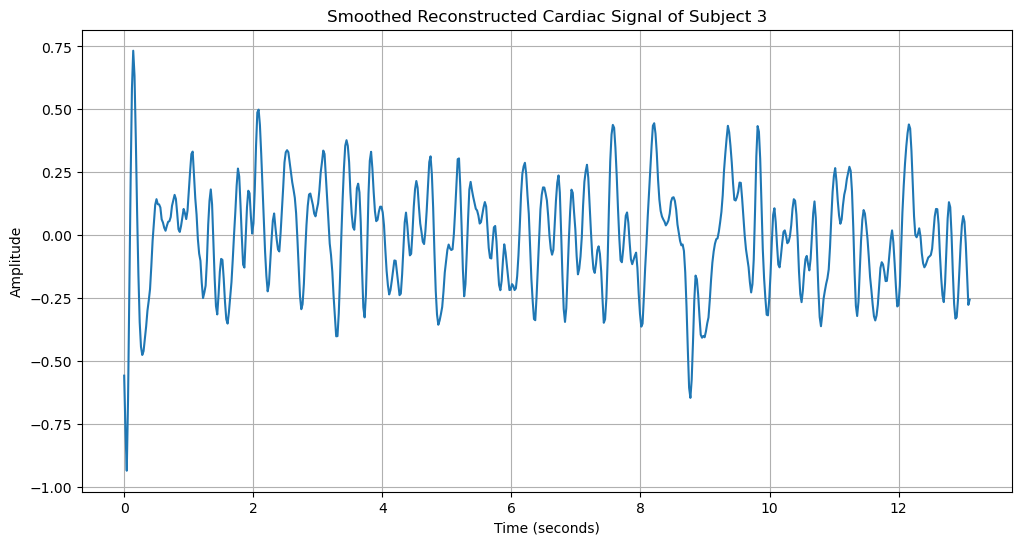

In [41]:
# smoothed reconstructed cardiac signal
plt.figure(figsize=(12, 6))
plt.plot(segment_time_downsampled_DC3_sub7, smoothed_cardiac_signal_sub7)
plt.title("Smoothed Reconstructed Cardiac Signal of Subject 3")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

cardiac_signal_sub6 = smoothed_cardiac_signal_sub6
cardiac_signal_sub7 = smoothed_cardiac_signal_sub7
cardiac_signal_sub8 = smoothed_cardiac_signal_sub8
cardiac_signal_sub9 = smoothed_cardiac_signal_sub9
cardiac_signal_sub10 = smoothed_cardiac_signal_sub10

#  PEAK DETECTION FOR BCG SIGNAL  AND HRV EXTRACTION (BPM)

In [493]:
import numpy as np
from scipy.signal import find_peaks
import neurokit2 as nk
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import describe
import neurokit2 as nk

# Derivative of cardiac signal
DWT_derivative_sub1 = np.diff(cardiac_signal_sub1) ; DWT_derivative_sub2 = np.diff(cardiac_signal_sub2)
DWT_derivative_sub3 = np.diff(cardiac_signal_sub3) ; DWT_derivative_sub4 = np.diff(cardiac_signal_sub4)
DWT_derivative_sub5 = np.diff(cardiac_signal_sub5) ; DWT_derivative_sub6 = np.diff(cardiac_signal_sub6)
DWT_derivative_sub7 = np.diff(cardiac_signal_sub7) ; DWT_derivative_sub8 = np.diff(cardiac_signal_sub8)
DWT_derivative_sub9 = np.diff(cardiac_signal_sub9) ; DWT_derivative_sub10 = np.diff(cardiac_signal_sub10)


min_peak_distance = 30
sampling_frequency = 50 
jpeak_indices_sub1, _ = find_peaks(DWT_derivative_sub1, distance= min_peak_distance)
jpeak_indices_sub2, _ = find_peaks(DWT_derivative_sub2, distance = min_peak_distance)
jpeak_indices_sub3, _ = find_peaks(DWT_derivative_sub3, distance = min_peak_distance)
jpeak_indices_sub4, _ = find_peaks(DWT_derivative_sub4, distance= min_peak_distance)
jpeak_indices_sub5, _ = find_peaks(DWT_derivative_sub5, distance= min_peak_distance)
jpeak_indices_sub6, _ = find_peaks(DWT_derivative_sub6, distance= min_peak_distance)
jpeak_indices_sub7, _ = find_peaks(DWT_derivative_sub7, distance= min_peak_distance)
jpeak_indices_sub8, _ = find_peaks(DWT_derivative_sub8, distance= min_peak_distance)
jpeak_indices_sub9, _ = find_peaks(DWT_derivative_sub9, distance= min_peak_distance)
jpeak_indices_sub10, _ = find_peaks(DWT_derivative_sub10, distance= min_peak_distance)


#  BCG timestamps
bcg_timestamps_sub1 = jpeak_indices_sub1 / sampling_frequency ; bcg_timestamps_sub2 = jpeak_indices_sub2 / sampling_frequency
bcg_timestamps_sub3 = jpeak_indices_sub3 / sampling_frequency ; bcg_timestamps_sub4 = jpeak_indices_sub4 / sampling_frequency
bcg_timestamps_sub5 = jpeak_indices_sub5 / sampling_frequency ; bcg_timestamps_sub6 = jpeak_indices_sub6 / sampling_frequency
bcg_timestamps_sub7 = jpeak_indices_sub7 / sampling_frequency ; bcg_timestamps_sub8 = jpeak_indices_sub8 / sampling_frequency
bcg_timestamps_sub9 = jpeak_indices_sub9 / sampling_frequency ; bcg_timestamps_sub10 = jpeak_indices_sub10 / sampling_frequency

max_timestamp = 13
filtered_bcg_timestamps1 = bcg_timestamps_sub1[bcg_timestamps_sub1 < max_timestamp]
filtered_bcg_timestamps2 = bcg_timestamps_sub2[bcg_timestamps_sub2 < max_timestamp]
filtered_bcg_timestamps3 = bcg_timestamps_sub3[bcg_timestamps_sub3 < max_timestamp]
filtered_bcg_timestamps4 = bcg_timestamps_sub4[bcg_timestamps_sub4 < max_timestamp]
filtered_bcg_timestamps5 = bcg_timestamps_sub5[bcg_timestamps_sub5 < max_timestamp]
filtered_bcg_timestamps6 = bcg_timestamps_sub6[bcg_timestamps_sub6 < max_timestamp]
filtered_bcg_timestamps7 = bcg_timestamps_sub7[bcg_timestamps_sub7 < max_timestamp]
filtered_bcg_timestamps8 = bcg_timestamps_sub8[bcg_timestamps_sub8 < max_timestamp]
filtered_bcg_timestamps9 = bcg_timestamps_sub9[bcg_timestamps_sub9 < max_timestamp]
filtered_bcg_timestamps10 = bcg_timestamps_sub10[bcg_timestamps_sub10 < max_timestamp]

jj_intervals_sub1 = np.diff(jpeak_indices_sub1) ; jj_intervals_sub2 = np.diff(jpeak_indices_sub2)
jj_intervals_sub3 = np.diff(jpeak_indices_sub3) ; jj_intervals_sub4 = np.diff(jpeak_indices_sub4)
jj_intervals_sub5 = np.diff(jpeak_indices_sub5) ; jj_intervals_sub6 = np.diff(jpeak_indices_sub6)
jj_intervals_sub7 = np.diff(jpeak_indices_sub7) ; jj_intervals_sub8 = np.diff(jpeak_indices_sub8)
jj_intervals_sub9 = np.diff(jpeak_indices_sub9) ; jj_intervals_sub10 = np.diff(jpeak_indices_sub10)


# Convert J-J intervals to time units (seconds)
sampling_frequency = 50 
jj_intervals_time_sub1 = jj_intervals_sub1 / sampling_frequency ; jj_intervals_time_sub2 = jj_intervals_sub2 / sampling_frequency
jj_intervals_time_sub3 = jj_intervals_sub3 / sampling_frequency ; jj_intervals_time_sub4 = jj_intervals_sub4 / sampling_frequency
jj_intervals_time_sub5 = jj_intervals_sub5 / sampling_frequency ; jj_intervals_time_sub6 = jj_intervals_sub6 / sampling_frequency
jj_intervals_time_sub7 = jj_intervals_sub7 / sampling_frequency ; jj_intervals_time_sub8 = jj_intervals_sub8 / sampling_frequency
jj_intervals_time_sub9 = jj_intervals_sub9 / sampling_frequency ; jj_intervals_time_sub10 = jj_intervals_sub10 / sampling_frequency


# Print the J-J intervals in time units
print("J-J Intervals (seconds):", jj_intervals_time_sub1) 
print("J-J Intervals (seconds):", jj_intervals_time_sub2)
print("J-J Intervals (seconds):", jj_intervals_time_sub3) 
print("J-J Intervals (seconds):", jj_intervals_time_sub4)
print("J-J Intervals (seconds):", jj_intervals_time_sub5) 
print("J-J Intervals (seconds):", jj_intervals_time_sub6)

print("J-J Intervals (seconds):", jj_intervals_time_sub7) 
print("J-J Intervals (seconds):", jj_intervals_time_sub8)
print("J-J Intervals (seconds):", jj_intervals_time_sub9) 
print("J-J Intervals (seconds):", jj_intervals_time_sub10)


# Create a list of your filtered JJ intervals lists
jj_intervals_lists = [jj_intervals_time_sub1, jj_intervals_time_sub2, jj_intervals_time_sub3, 
                      jj_intervals_time_sub4, jj_intervals_time_sub4, jj_intervals_time_sub6,
                     jj_intervals_time_sub7, jj_intervals_time_sub6, jj_intervals_time_sub9,
                     jj_intervals_time_sub10,]


#  filter out intervals above 1.20
for idx, jj_intervals in enumerate(jj_intervals_lists, start=1):
    jj_intervals_lists[idx - 1] = [jj_interval for jj_interval in jj_intervals if jj_interval <= 1.2]

    
jj_intervals_time_sub1 = np.array(jj_intervals_lists[0])
jj_intervals_time_sub2 = np.array(jj_intervals_lists[1])
jj_intervals_time_sub3 = np.array(jj_intervals_lists[2])
jj_intervals_time_sub4 = np.array(jj_intervals_lists[3])
jj_intervals_time_sub5 = np.array(jj_intervals_lists[4])
jj_intervals_time_sub6 = np.array(jj_intervals_lists[5])
jj_intervals_time_sub7 = np.array(jj_intervals_lists[6])
jj_intervals_time_sub8 = np.array(jj_intervals_lists[7])
jj_intervals_time_sub9 = np.array(jj_intervals_lists[8])
jj_intervals_time_sub10 = np.array(jj_intervals_lists[9])

J-J Intervals (seconds): [0.86 0.68 1.08 0.9  0.78 0.62 1.02 0.68 0.72 0.76 0.66 0.88 0.74 0.82
 1.08]
J-J Intervals (seconds): [0.6  0.88 1.   0.7  0.66 0.6  0.94 1.02 0.58 0.68 0.94 0.62 0.58 0.88
 0.7  0.66]
J-J Intervals (seconds): [0.92 0.9  0.7  0.62 0.7  0.62 0.84 0.84 0.72 1.14 0.72 0.68 0.58 1.18
 1.12]
J-J Intervals (seconds): [0.86 0.68 1.08 0.9  0.78 0.62 1.02 0.68 0.72 0.76 0.66 0.88 0.74 0.82
 1.08]
J-J Intervals (seconds): [0.72 1.14 0.78 0.64 0.9  0.76 1.08 0.8  0.62 0.8  1.02 1.14 0.82 1.04
 0.74]
J-J Intervals (seconds): [0.86 0.76 0.76 0.98 0.68 0.68 0.66 0.72 0.66 0.68 0.76 0.94 0.66 1.02
 0.74 0.6 ]
J-J Intervals (seconds): [1.2  0.74 0.76 0.98 0.7  0.84 0.82 0.74 0.62 0.6  0.72 0.96 0.86 0.76
 0.64 0.68]
J-J Intervals (seconds): [0.66 0.78 0.98 0.66 0.58 1.06 0.92 0.72 0.76 1.18 0.84 0.64 0.66 0.6
 0.86 0.66]
J-J Intervals (seconds): [0.94 0.58 1.12 0.72 1.16 0.6  0.6  1.14 0.96 0.58 0.76 1.18 0.9  0.76
 0.58]
J-J Intervals (seconds): [0.62 1.24 0.86 0.98 1.02 1.0

In [495]:

#  mean J-J interval in seconds
mean_jj_interval_sub1 = np.mean(jj_intervals_time_sub1) ; mean_jj_interval_sub2 = np.mean(jj_intervals_time_sub2)
mean_jj_interval_sub3 = np.mean(jj_intervals_time_sub3) ; mean_jj_interval_sub4 = np.mean(jj_intervals_time_sub4)
mean_jj_interval_sub5 = np.mean(jj_intervals_time_sub5) ; mean_jj_interval_sub6 = np.mean(jj_intervals_time_sub6)
mean_jj_interval_sub7 = np.mean(jj_intervals_time_sub7) ; mean_jj_interval_sub8 = np.mean(jj_intervals_time_sub8)
mean_jj_interval_sub9 = np.mean(jj_intervals_time_sub9) ; mean_jj_interval_sub10 = np.mean(jj_intervals_time_sub10)


avg_jjbpm_sub1 = 60 / mean_jj_interval_sub1 ; avg_jjbpm_sub2 = 60 / mean_jj_interval_sub2
avg_jjbpm_sub3 = 60 / mean_jj_interval_sub3 ; avg_jjbpm_sub4 = 60 / mean_jj_interval_sub4
avg_jjbpm_sub5 = 60 / mean_jj_interval_sub5 ; avg_jjbpm_sub6 = 60 / mean_jj_interval_sub6
avg_jjbpm_sub7 = 60 / mean_jj_interval_sub7 ; avg_jjbpm_sub8 = 60 / mean_jj_interval_sub8
avg_jjbpm_sub9 = 60 / mean_jj_interval_sub9 ; avg_jjbpm_sub10 = 60 / mean_jj_interval_sub10


# Print the average bpm for each subject
print("Average BPM for Sub1:", avg_jjbpm_sub1) ; print("Average BPM for Sub2:", avg_jjbpm_sub2)
print("Average BPM for Sub3:", avg_jjbpm_sub3) ; print("Average BPM for Sub4:", avg_jjbpm_sub4)
print("Average BPM for Sub5:", avg_jjbpm_sub5) ; print("Average BPM for Sub5:", avg_jjbpm_sub6)
print("Average BPM for Sub5:", avg_jjbpm_sub7) ; print("Average BPM for Sub5:", avg_jjbpm_sub8)
print("Average BPM for Sub5:", avg_jjbpm_sub9) ; print("Average BPM for Sub5:", avg_jjbpm_sub10)

# Print the BCG timestamps for each subject
print("BCG Timestamps for Sub1:", bcg_timestamps_sub1) ; print("BCG Timestamps for Sub2:", bcg_timestamps_sub2)
print("BCG Timestamps for Sub3:", bcg_timestamps_sub3) ; print("BCG Timestamps for Sub4:", bcg_timestamps_sub4)
print("BCG Timestamps for Sub5:", bcg_timestamps_sub5) ; print("BCG Timestamps for Sub6:", bcg_timestamps_sub6)
print("BCG Timestamps for Sub7:", bcg_timestamps_sub7) ; print("BCG Timestamps for Sub8:", bcg_timestamps_sub8)
print("BCG Timestamps for Sub9:", bcg_timestamps_sub9) ; print("BCG Timestamps for Sub10:", bcg_timestamps_sub10)

# Extract HRV features
hrv_features_sub1 = nk.hrv(jpeak_indices_sub1, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub1)
hrv_features_sub2 = nk.hrv(jpeak_indices_sub2, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub2)
hrv_features_sub3 = nk.hrv(jpeak_indices_sub3, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub3)
hrv_features_sub4 = nk.hrv(jpeak_indices_sub4, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub4)
hrv_features_sub5 = nk.hrv(jpeak_indices_sub5, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub5)
hrv_features_sub6 = nk.hrv(jpeak_indices_sub6, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub6)
hrv_features_sub7 = nk.hrv(jpeak_indices_sub7, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub7)
hrv_features_sub8 = nk.hrv(jpeak_indices_sub8, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub8)
hrv_features_sub9 = nk.hrv(jpeak_indices_sub9, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub9)
hrv_features_sub10 = nk.hrv(jpeak_indices_sub10, sampling_rate=50) ;  print("HRV Features:", hrv_features_sub10)


Average BPM for Sub1: 73.28990228013028
Average BPM for Sub2: 79.734219269103
Average BPM for Sub3: 73.2899022801303
Average BPM for Sub4: 73.28990228013028
Average BPM for Sub5: 73.28990228013028
Average BPM for Sub5: 78.94736842105263
Average BPM for Sub5: 76.06973058637084
Average BPM for Sub5: 78.94736842105263
Average BPM for Sub5: 71.54213036565979
Average BPM for Sub5: 76.43312101910827
BCG Timestamps for Sub1: [ 0.22  1.08  1.76  2.84  3.74  4.52  5.14  6.16  6.84  7.56  8.32  8.98
  9.86 10.6  11.42 12.5 ]
BCG Timestamps for Sub2: [ 0.58  1.18  2.06  3.06  3.76  4.42  5.02  5.96  6.98  7.56  8.24  9.18
  9.8  10.38 11.26 11.96 12.62]
BCG Timestamps for Sub3: [ 0.08  1.    1.9   2.6   3.22  3.92  4.54  5.38  6.22  6.94  8.08  8.8
  9.48 10.06 11.24 12.36]
BCG Timestamps for Sub4: [ 0.22  1.08  1.76  2.84  3.74  4.52  5.14  6.16  6.84  7.56  8.32  8.98
  9.86 10.6  11.42 12.5 ]
BCG Timestamps for Sub5: [ 0.06  0.78  1.92  2.7   3.34  4.24  5.    6.08  6.88  7.5   8.3   9.32
 10.

C:\ProgramData\anaconda3\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:351: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k
C:\ProgramData\anaco

HRV Features:    HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0       785.0  175.347274         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_SampEn  \
0         NaN         NaN  244.731145  253.320802  ...         inf   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn   HRV_CD  HRV_HFD  \
0         3.5     1.858095       NaN        NaN         NaN  1.34527      NaN   

    HRV_KFD  HRV_LZC  
0  2.914407     1.25  

[1 rows x 82 columns]
HRV Features:    HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  838.666667  232.927538         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_SampEn  \
0         NaN         NaN  368.006211  380.964652  ...         inf   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  \
0    3.323231     2.130191       NaN        NaN         NaN  0.988901   

 

C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:351: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\ProgramData\anaco

In [459]:
import numpy as np
from scipy.signal import find_peaks
import neurokit2 as nk

# Define a function to calculate JJ intervals and timestamps not greater than 13 seconds
def calculate_jj_intervals_and_timestamps(DWT_derivative, sampling_frequency, max_timestamp):
    # Find local maxima in the derivative signal (J-peaks)
    jpeak_indices, _ = find_peaks(DWT_derivative, distance= min_peak_distance)
    
    # Calculate BCG timestamps
    bcg_timestamps = jpeak_indices / sampling_frequency
    
    filtered_bcg_timestamps = bcg_timestamps[bcg_timestamps < max_timestamp]
    
    
    # Calculate JJ intervals
    jj_intervals = np.diff(filtered_bcg_timestamps)
    
    # Filter JJ intervals and timestamps not greater than max_timestamp
    filtered_jj_intervals = jj_intervals[jj_intervals <= max_timestamp]
    
    return filtered_jj_intervals, filtered_bcg_timestamps
    return jpeak_indices

# maximum timestamp 
max_timestamp = 13

sampling_frequency = 50  

# Create a list of DWT_derivative_subX and subject names for convenience
subjects = [
    (DWT_derivative_sub1, "Sub1"),
    (DWT_derivative_sub2, "Sub2"),
    (DWT_derivative_sub3, "Sub3"),
    (DWT_derivative_sub4, "Sub4"),
    (DWT_derivative_sub5, "Sub5"),
    (DWT_derivative_sub6, "Sub6"),
    (DWT_derivative_sub7, "Sub7"),
    (DWT_derivative_sub8, "Sub8"),
    (DWT_derivative_sub9, "Sub9"),
    (DWT_derivative_sub10, "Sub10"),
]

# Create dictionaries to store filtered JJ intervals and filtered BCG timestamps for each subject
filtered_jj_intervals_dict = {}
filtered_bcg_timestamps_dict = {}
jpeak_indices_dict = {}

# Iterate through subjects and calculate JJ intervals and timestamps
for subject_data, subject_name in subjects:
    filtered_jj_intervals, filtered_bcg_timestamps = calculate_jj_intervals_and_timestamps(subject_data, sampling_frequency, max_timestamp)
    
    # Store the filtered JJ intervals and filtered BCG timestamps in dictionaries
    filtered_jj_intervals_dict[f"filtered_jj_intervals_{subject_name}"] = filtered_jj_intervals
    filtered_bcg_timestamps_dict[f"filtered_bcg_timestamps_{subject_name}"] = filtered_bcg_timestamps
    
    # Print the results for each subject
    print(f"JJ Intervals for {subject_name} (seconds):", filtered_jj_intervals)
    print(f"BCG Timestamps for {subject_name} (seconds):", filtered_bcg_timestamps)


filtered_jj_intervals_sub1 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub1"]
filtered_jj_intervals_sub2 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub2"]
filtered_jj_intervals_sub3 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub3"]
filtered_jj_intervals_sub4 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub4"]
filtered_jj_intervals_sub5 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub5"]
filtered_jj_intervals_sub6 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub6"]
filtered_jj_intervals_sub7 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub7"]
filtered_jj_intervals_sub8 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub8"]
filtered_jj_intervals_sub9 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub9"]
filtered_jj_intervals_sub10 = filtered_jj_intervals_dict["filtered_jj_intervals_Sub10"]


filtered_bcg_timestamps_sub1 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub1"]
filtered_bcg_timestamps_sub2 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub2"]
filtered_bcg_timestamps_sub3 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub3"]
filtered_bcg_timestamps_sub4 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub4"]
filtered_bcg_timestamps_sub5 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub5"]
filtered_bcg_timestamps_sub6 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub6"]
filtered_bcg_timestamps_sub7 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub7"]
filtered_bcg_timestamps_sub8 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub8"]
filtered_bcg_timestamps_sub9 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub9"]
filtered_bcg_timestamps_sub10 = filtered_bcg_timestamps_dict["filtered_bcg_timestamps_Sub10"]


filtered_jpeak_indices_sub1 = sampling_frequency * filtered_bcg_timestamps_sub1
filtered_jpeak_indices_sub2 = sampling_frequency * filtered_bcg_timestamps_sub2
filtered_jpeak_indices_sub3 = sampling_frequency * filtered_bcg_timestamps_sub3
filtered_jpeak_indices_sub4 = sampling_frequency * filtered_bcg_timestamps_sub4
filtered_jpeak_indices_sub5 = sampling_frequency * filtered_bcg_timestamps_sub5
filtered_jpeak_indices_sub6 = sampling_frequency * filtered_bcg_timestamps_sub6
filtered_jpeak_indices_sub7 = sampling_frequency * filtered_bcg_timestamps_sub7
filtered_jpeak_indices_sub8 = sampling_frequency * filtered_bcg_timestamps_sub8
filtered_jpeak_indices_sub9 = sampling_frequency * filtered_bcg_timestamps_sub9
filtered_jpeak_indices_sub10 = sampling_frequency * filtered_bcg_timestamps_sub10


filtered_hrv_features_sub1 = nk.hrv( filtered_jpeak_indices_sub1, sampling_rate=50) ; filtered_hrv_features_sub2 = nk.hrv( filtered_jpeak_indices_sub2, sampling_rate=50)
filtered_hrv_features_sub3 = nk.hrv( filtered_jpeak_indices_sub3, sampling_rate=50) ; filtered_hrv_features_sub4 = nk.hrv( filtered_jpeak_indices_sub4, sampling_rate=50)
filtered_hrv_features_sub5 = nk.hrv( filtered_jpeak_indices_sub5, sampling_rate=50) ; filtered_hrv_features_sub6 = nk.hrv( filtered_jpeak_indices_sub6, sampling_rate=50)
filtered_hrv_features_sub7 = nk.hrv( filtered_jpeak_indices_sub7, sampling_rate=50) ; filtered_hrv_features_sub8 = nk.hrv( filtered_jpeak_indices_sub8, sampling_rate=50)
filtered_hrv_features_sub9 = nk.hrv( filtered_jpeak_indices_sub9, sampling_rate=50) ; filtered_hrv_features_sub10 = nk.hrv( filtered_jpeak_indices_sub10, sampling_rate=50)

print("HRV Features:", filtered_hrv_features_sub1) ; print("HRV Features:", filtered_hrv_features_sub2)
print("HRV Features:", filtered_hrv_features_sub3) ; print("HRV Features:", filtered_hrv_features_sub4)
print("HRV Features:", filtered_hrv_features_sub5) ; print("HRV Features:", filtered_hrv_features_sub6)
print("HRV Features:", filtered_hrv_features_sub7) ; print("HRV Features:", filtered_hrv_features_sub8)
print("HRV Features:", filtered_hrv_features_sub9) ; print("HRV Features:", filtered_hrv_features_sub10)


JJ Intervals for Sub1 (seconds): [0.86 0.68 1.08 0.9  0.78 0.62 1.02 0.68 0.72 0.76 0.66 0.88 0.74 0.82
 1.08]
BCG Timestamps for Sub1 (seconds): [ 0.22  1.08  1.76  2.84  3.74  4.52  5.14  6.16  6.84  7.56  8.32  8.98
  9.86 10.6  11.42 12.5 ]
JJ Intervals for Sub2 (seconds): [0.6  0.88 1.   0.7  0.66 0.6  0.94 1.02 0.58 0.68 0.94 0.62 0.58 0.88
 0.7  0.66]
BCG Timestamps for Sub2 (seconds): [ 0.58  1.18  2.06  3.06  3.76  4.42  5.02  5.96  6.98  7.56  8.24  9.18
  9.8  10.38 11.26 11.96 12.62]
JJ Intervals for Sub3 (seconds): [0.92 0.9  0.7  0.62 0.7  0.62 0.84 0.84 0.72 1.14 0.72 0.68 0.58 1.18
 1.12]
BCG Timestamps for Sub3 (seconds): [ 0.08  1.    1.9   2.6   3.22  3.92  4.54  5.38  6.22  6.94  8.08  8.8
  9.48 10.06 11.24 12.36]
JJ Intervals for Sub4 (seconds): [0.86 0.68 1.08 0.9  0.78 0.62 1.02 0.68 0.72 0.76 0.66 0.88 0.74 0.82
 1.08]
BCG Timestamps for Sub4 (seconds): [ 0.22  1.08  1.76  2.84  3.74  4.52  5.14  6.16  6.84  7.56  8.32  8.98
  9.86 10.6  11.42 12.5 ]
JJ Interva

C:\ProgramData\anaconda3\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:351: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k
C:\ProgramData\anaco

HRV Features:    HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  818.666667  149.564447         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_SampEn  \
0         NaN         NaN  222.902926  230.741757  ...        -inf   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  \
0    3.640224     2.159282       NaN        NaN         NaN  1.937377   

   HRV_HFD    HRV_KFD   HRV_LZC  
0      NaN  11.296616  1.823216  

[1 rows x 82 columns]
HRV Features:    HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0       752.5  160.644535         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_SampEn  \
0         NaN         NaN  232.264217  240.380651  ...         inf   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  \
0       3.625     1.571946       NaN        NaN         NaN  1.083972

C:\ProgramData\anaconda3\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:351: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k


In [460]:
#  lists to store the mean JJ intervals and average BPM for each subject
mean_jj_intervals_dict = {}
overall_avg_bpm_dict = {}

# Iterate through subjects and calculate JJ intervals and timestamps
for subject_data, subject_name in subjects:
    filtered_jj_intervals, filtered_bcg_timestamps = calculate_jj_intervals_and_timestamps(subject_data, sampling_frequency, max_timestamp)
    
    #  mean JJ interval for the subject
    mean_jj_interval = np.mean(filtered_jj_intervals)
    
    #  the average BPM for the subject
    avg_bpm = 60 / mean_jj_interval
    
    # Store the filtered JJ intervals, filtered BCG timestamps, mean JJ intervals,and average BPM in the dictionaries
    mean_jj_intervals_dict[f"mean_jj_intervals_{subject_name}"] = mean_jj_interval
    overall_avg_bpm_dict[f"overall_avg_bpm_{subject_name}"] = avg_bpm
    
    # Print the results for each subject
    print(f"Mean JJ Interval for {subject_name} (seconds):", mean_jj_interval)
    print(f"Average BPM for {subject_name}:", avg_bpm)

# Calculate the overall average BPM across all subjects
overall_avg_bpm = 60 / np.mean(list(mean_jj_intervals_dict.values()))
print("Overall Average BPM Across All Subjects:", overall_avg_bpm)
    

filtered_mean_jj_intervals_sub1 = mean_jj_intervals_dict["mean_jj_intervals_Sub1"]
filtered_mean_jj_intervals_sub2 = mean_jj_intervals_dict["mean_jj_intervals_Sub2"]
filtered_mean_jj_intervals_sub3 = mean_jj_intervals_dict["mean_jj_intervals_Sub3"]
filtered_mean_jj_intervals_sub4 = mean_jj_intervals_dict["mean_jj_intervals_Sub4"]
filtered_mean_jj_intervals_sub5 = mean_jj_intervals_dict["mean_jj_intervals_Sub5"]
filtered_mean_jj_intervals_sub6 = mean_jj_intervals_dict["mean_jj_intervals_Sub6"]
filtered_mean_jj_intervals_sub7 = mean_jj_intervals_dict["mean_jj_intervals_Sub7"]
filtered_mean_jj_intervals_sub8 = mean_jj_intervals_dict["mean_jj_intervals_Sub8"]
filtered_mean_jj_intervals_sub9 = mean_jj_intervals_dict["mean_jj_intervals_Sub9"]
filtered_mean_jj_intervals_sub10 = mean_jj_intervals_dict["mean_jj_intervals_Sub10"]


filtered_avg_bpm_sub1 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub1"]
filtered_avg_bpm_sub2 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub2"]
filtered_avg_bpm_sub3 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub3"]
filtered_avg_bpm_sub4 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub4"]
filtered_avg_bpm_sub5 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub5"]
filtered_avg_bpm_sub6 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub6"]
filtered_avg_bpm_sub7 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub7"]
filtered_avg_bpm_sub8 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub8"]
filtered_avg_bpm_sub9 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub9"]
filtered_avg_bpm_sub10 = overall_avg_bpm_dict[f"overall_avg_bpm_Sub10"]

Mean JJ Interval for Sub1 (seconds): 0.8186666666666668
Average BPM for Sub1: 73.28990228013028
Mean JJ Interval for Sub2 (seconds): 0.7525
Average BPM for Sub2: 79.734219269103
Mean JJ Interval for Sub3 (seconds): 0.8186666666666667
Average BPM for Sub3: 73.28990228013029
Mean JJ Interval for Sub4 (seconds): 0.8186666666666668
Average BPM for Sub4: 73.28990228013028
Mean JJ Interval for Sub5 (seconds): 0.8757142857142858
Average BPM for Sub5: 68.51549755301794
Mean JJ Interval for Sub6 (seconds): 0.76
Average BPM for Sub6: 78.94736842105263
Mean JJ Interval for Sub7 (seconds): 0.78875
Average BPM for Sub7: 76.06973058637084
Mean JJ Interval for Sub8 (seconds): 0.7933333333333333
Average BPM for Sub8: 75.63025210084034
Mean JJ Interval for Sub9 (seconds): 0.8386666666666667
Average BPM for Sub9: 71.54213036565977
Mean JJ Interval for Sub10 (seconds): 0.85
Average BPM for Sub10: 70.58823529411765
Overall Average BPM Across All Subjects: 73.93747881999306


# LOADING OF DATASET WITH ECG

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from biosppy.signals import ecg


ecg_subject1 = pd.read_csv("aa1_ecg_s.csv")  
ecg_subject2 = pd.read_csv("aa2_ecg_s.csv")
ecg_subject3 = pd.read_csv("ab4_ecg_s.csv")
ecg_subject4 = pd.read_csv("ab5_ecg_s.csv")
ecg_subject5 = pd.read_csv("ca2_ecg_s.csv")
ecg_subject6 = pd.read_csv("ca3_ecg_s.csv")
ecg_subject7 = pd.read_csv("ca4_ecg_s.csv")
ecg_subject8 = pd.read_csv("dv1_ecg_s.csv")
ecg_subject9 = pd.read_csv("dv2_ecg_s.csv")
ecg_subject10 = pd.read_csv("ga1_ecg_s.csv")
ecg_subject11 = pd.read_csv("mg1_ecg_s.csv")
ecg_subject12 = pd.read_csv("mg2_ecg_s.csv")
ecg_subject13 = pd.read_csv("mh1_ecg_s.csv")
ecg_subject14 = pd.read_csv("mh2_ecg_s.csv")

# Extract the ECG signal and sampling frequency from the DataFrame
ecg_signal1 = ecg_subject1['ECG II'].values
ecg_signal2 = ecg_subject2['ECG II'].values
ecg_signal3 = ecg_subject3['ECG II'].values
ecg_signal4 = ecg_subject4['ECG II'].values
ecg_signal5 = ecg_subject5['ECG II'].values
ecg_signal6 = ecg_subject6['ECG II'].values
ecg_signal7 = ecg_subject7['ECG II'].values
ecg_signal8 = ecg_subject8['ECG II'].values
ecg_signal9 = ecg_subject9['ECG II'].values
ecg_signal10 = ecg_subject10['ECG II'].values


sampling_frequency_ecg = 256  

ecg_duration1 = len(ecg_signal1) / sampling_frequency_ecg; ecg_time1 = np.linspace(0, ecg_duration1, len(ecg_signal1))
ecg_duration2 = len(ecg_signal2) / sampling_frequency_ecg; ecg_time2 = np.linspace(0, ecg_duration2, len(ecg_signal2))
ecg_duration3 = len(ecg_signal3) / sampling_frequency_ecg; ecg_time3 = np.linspace(0, ecg_duration3, len(ecg_signal3))
ecg_duration4 = len(ecg_signal4) / sampling_frequency_ecg; ecg_time4 = np.linspace(0, ecg_duration4, len(ecg_signal4))
ecg_duration5 = len(ecg_signal5) / sampling_frequency_ecg; ecg_time5 = np.linspace(0, ecg_duration5, len(ecg_signal5))
ecg_duration6 = len(ecg_signal6) / sampling_frequency_ecg; ecg_time6 = np.linspace(0, ecg_duration6, len(ecg_signal6))
ecg_duration7 = len(ecg_signal7) / sampling_frequency_ecg; ecg_time7 = np.linspace(0, ecg_duration7, len(ecg_signal7))
ecg_duration8 = len(ecg_signal8) / sampling_frequency_ecg; ecg_time8 = np.linspace(0, ecg_duration8, len(ecg_signal8))
ecg_duration9 = len(ecg_signal9) / sampling_frequency_ecg; ecg_time9 = np.linspace(0, ecg_duration9, len(ecg_signal9))
ecg_duration10 = len(ecg_signal10) / sampling_frequency_ecg; ecg_time10 = np.linspace(0, ecg_duration10, len(ecg_signal10))

# CLEANING OF ECG DATA

In [410]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

fs = 256  
order = 3

# cutoff frequencies
low_cutoff = 0.5  
high_cutoff = 20  


#  bandpass filter to each raw BCG signal
ecg_signal1 = butter_bandpass_filter(ecg_signal1, low_cutoff, high_cutoff, fs, order)
ecg_signal2 = butter_bandpass_filter(ecg_signal2, low_cutoff, high_cutoff, fs, order)
ecg_signal3 = butter_bandpass_filter(ecg_signal3, low_cutoff, high_cutoff, fs, order)
ecg_signal4 = butter_bandpass_filter(ecg_signal4, low_cutoff, high_cutoff, fs, order)
ecg_signal5 = butter_bandpass_filter(ecg_signal5, low_cutoff, high_cutoff, fs, order)
ecg_signal6 = butter_bandpass_filter(ecg_signal6, low_cutoff, high_cutoff, fs, order)
ecg_signal7 = butter_bandpass_filter(ecg_signal7, low_cutoff, high_cutoff, fs, order)
ecg_signal8 = butter_bandpass_filter(ecg_signal8, low_cutoff, high_cutoff, fs, order)
ecg_signal9 = butter_bandpass_filter(ecg_signal9, low_cutoff, high_cutoff, fs, order)
ecg_signal10 = butter_bandpass_filter(ecg_signal10, low_cutoff, high_cutoff, fs, order)

In [411]:
data_frame = [ecg_signal1, ecg_signal2, ecg_signal3, ecg_signal4,
              ecg_signal5, ecg_signal6, ecg_signal7 ,ecg_signal8, ecg_signal9, ecg_signal10]  # Add all data frames here

# Loop through each data frame and perform scaling
for i, df in enumerate(data_frame):
    min_value = df.min()
    max_value = df.max()
    scaled_df = (df - min_value) / (max_value - min_value)
    data_frames[i] = scaled_df  # Replace the original DataFrame with the scaled DataFrame


ecg_signal1 = data_frame[0] ; ecg_signal2 = data_frame[1]
ecg_signal3 = data_frame[2] ; ecg_signal4 = data_frame[3]
ecg_signal5 = data_frame[4] ; ecg_signal6 = data_frame[5]
ecg_signal7 = data_frame[6] ; ecg_signal8 = data_frame[7]
ecg_signal9 = data_frame[8] ; ecg_signal10 = data_frame[9]


In [412]:
# Perform R-peak detection 
rpeaks_sub1 = ecg.ecg(signal=ecg_signal1, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub1 = ecg_time1[rpeaks_sub1]

rpeaks_sub2 = ecg.ecg(signal=ecg_signal2, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub2 = ecg_time2[rpeaks_sub2]

rpeaks_sub3 = ecg.ecg(signal=ecg_signal3, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub3 = ecg_time3[rpeaks_sub3]

rpeaks_sub4 = ecg.ecg(signal=ecg_signal4, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub4 = ecg_time3[rpeaks_sub4]

rpeaks_sub5 = ecg.ecg(signal=ecg_signal5, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub5 = ecg_time3[rpeaks_sub5]

rpeaks_sub6 = ecg.ecg(signal=ecg_signal6, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub6 = ecg_time6[rpeaks_sub6]

rpeaks_sub7 = ecg.ecg(signal=ecg_signal7, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub7 = ecg_time7[rpeaks_sub7]

rpeaks_sub8 = ecg.ecg(signal=ecg_signal8, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub8 = ecg_time8[rpeaks_sub8]

rpeaks_sub9 = ecg.ecg(signal=ecg_signal9, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub9 = ecg_time9[rpeaks_sub9]

rpeaks_sub10 = ecg.ecg(signal=ecg_signal10, sampling_rate=sampling_frequency_ecg, show=False)['rpeaks']
rpeak_times_sub10 = ecg_time10[rpeaks_sub10]

rr_intervals_sub1 = np.diff(rpeak_times_sub1) ; rr_intervals_sub2 = np.diff(rpeak_times_sub2)
rr_intervals_sub3 = np.diff(rpeak_times_sub3) ; rr_intervals_sub4 = np.diff(rpeak_times_sub4)
rr_intervals_sub5 = np.diff(rpeak_times_sub5) ; rr_intervals_sub6 = np.diff(rpeak_times_sub6)
rr_intervals_sub7 = np.diff(rpeak_times_sub7) ; rr_intervals_sub8 = np.diff(rpeak_times_sub8)
rr_intervals_sub9 = np.diff(rpeak_times_sub9) ; rr_intervals_sub10 = np.diff(rpeak_times_sub10)

In [413]:
import numpy as np
from scipy.signal import find_peaks
import neurokit2 as nk

# EXTRACTION OF HR AND BPM FROM BCG FOR 200s

In [414]:
# Extract HRV features
hrv_ecgfeatures_sub1 = nk.hrv(rpeaks_sub4, sampling_rate=256)
hrv_ecgfeatures_sub1


sampling_frequency_ecg = 256

rr_intervals_sub1 = np.diff(rpeaks_sub1) ; rr_intervals_sub2 = np.diff(rpeaks_sub2)
rr_intervals_sub3 = np.diff(rpeaks_sub3) ; rr_intervals_sub4 = np.diff(rpeaks_sub4)
rr_intervals_sub5 = np.diff(rpeaks_sub5) ; rr_intervals_sub6 = np.diff(rpeaks_sub6)
rr_intervals_sub7 = np.diff(rpeaks_sub7) ; rr_intervals_sub8 = np.diff(rpeaks_sub8)
rr_intervals_sub9 = np.diff(rpeaks_sub9) ; rr_intervals_sub10 = np.diff(rpeaks_sub10)


# Convert rr_intervals to time units (seconds)
rr_intervals_time_sub1 = rr_intervals_sub1 / sampling_frequency_ecg ; rr_intervals_time_sub2 = rr_intervals_sub2 / sampling_frequency_ecg
rr_intervals_time_sub3 = rr_intervals_sub3 / sampling_frequency_ecg ; rr_intervals_time_sub4 = rr_intervals_sub4 / sampling_frequency_ecg
rr_intervals_time_sub5 = rr_intervals_sub5 / sampling_frequency_ecg ; rr_intervals_time_sub6 = rr_intervals_sub6 / sampling_frequency_ecg
rr_intervals_time_sub7 = rr_intervals_sub7 / sampling_frequency_ecg ; rr_intervals_time_sub8 = rr_intervals_sub8 / sampling_frequency_ecg
rr_intervals_time_sub9 = rr_intervals_sub9 / sampling_frequency_ecg ; rr_intervals_time_sub10 = rr_intervals_sub10 / sampling_frequency_ecg


#  average bpm for each subject
mean_rr_interval_sub1 = np.mean(rr_intervals_time_sub1) ; mean_rr_interval_sub2 = np.mean(rr_intervals_time_sub2)
mean_rr_interval_sub3 = np.mean(rr_intervals_time_sub3) ; mean_rr_interval_sub4 = np.mean(rr_intervals_time_sub4)
mean_rr_interval_sub5 = np.mean(rr_intervals_time_sub5) ; mean_rr_interval_sub6 = np.mean(rr_intervals_time_sub6)
mean_rr_interval_sub7 = np.mean(rr_intervals_time_sub7) ; mean_rr_interval_sub8 = np.mean(rr_intervals_time_sub8)
mean_rr_interval_sub9 = np.mean(rr_intervals_time_sub10) ; mean_rr_interval_sub10 = np.mean(rr_intervals_time_sub10)


avg_bpm_sub1 = 60 / mean_rr_interval_sub1 ; avg_bpm_sub2 = 60 / mean_rr_interval_sub2
avg_bpm_sub3 = 60 / mean_rr_interval_sub3 ; avg_bpm_sub4 = 60 / mean_rr_interval_sub4
avg_bpm_sub5 = 60 / mean_rr_interval_sub5 ; avg_bpm_sub6 = 60 / mean_rr_interval_sub6
avg_bpm_sub7 = 60 / mean_rr_interval_sub7 ; avg_bpm_sub8 = 60 / mean_rr_interval_sub8
avg_bpm_sub9 = 60 / mean_rr_interval_sub9 ; avg_bpm_sub10 = 60 / mean_rr_interval_sub10

rr_intervals_sub1 = rr_intervals_time_sub1 ; rr_intervals_sub2 = rr_intervals_time_sub2
rr_intervals_sub3 = rr_intervals_time_sub3 ; rr_intervals_sub4 = rr_intervals_time_sub4
rr_intervals_sub5 = rr_intervals_time_sub5 ; rr_intervals_sub6 = rr_intervals_time_sub6
rr_intervals_sub7 = rr_intervals_time_sub7 ; rr_intervals_sub8 = rr_intervals_time_sub8
rr_intervals_sub9 = rr_intervals_time_sub9 ; rr_intervals_sub10 = rr_intervals_time_sub10


# Print the average bpm for each subject
print("Average BPM for Sub1:", avg_bpm_sub1) ; print("Average BPM for Sub2:", avg_bpm_sub2)
print("Average BPM for Sub3:", avg_bpm_sub3) ; print("Average BPM for Sub4:", avg_bpm_sub4)
print("Average BPM for Sub5:", avg_bpm_sub5) ; print("Average BPM for Sub6:", avg_bpm_sub6)
print("Average BPM for Sub7:", avg_bpm_sub7) ; print("Average BPM for Sub8:", avg_bpm_sub8)
print("Average BPM for Sub9:", avg_bpm_sub9) ; print("Average BPM for Sub10:", avg_bpm_sub10)

# Extract HRV features
hrv_ecgfeatures_sub1 = nk.hrv(rpeaks_sub1, sampling_rate=256) ; hrv_ecgfeatures_sub2 = nk.hrv(rpeaks_sub2, sampling_rate=256)
hrv_ecgfeatures_sub3 = nk.hrv(rpeaks_sub3, sampling_rate=256) ; hrv_ecgfeatures_sub4 = nk.hrv(rpeaks_sub4, sampling_rate=256)
hrv_ecgfeatures_sub5 = nk.hrv(rpeaks_sub5, sampling_rate=256) ; hrv_ecgfeatures_sub6 = nk.hrv(rpeaks_sub6, sampling_rate=256)
hrv_ecgfeatures_sub7 = nk.hrv(rpeaks_sub7, sampling_rate=256) ; hrv_ecgfeatures_sub8 = nk.hrv(rpeaks_sub8, sampling_rate=256)
hrv_ecgfeatures_sub9 = nk.hrv(rpeaks_sub9, sampling_rate=256) ; hrv_ecgfeatures_sub10 = nk.hrv(rpeaks_sub10, sampling_rate=256)

print("HRV Features:", hrv_ecgfeatures_sub1)
print("HRV Features:", hrv_ecgfeatures_sub2)
print("HRV Features:", hrv_ecgfeatures_sub3)
print("HRV Features:", hrv_ecgfeatures_sub4)
print("HRV Features:", hrv_ecgfeatures_sub5)
print("HRV Features:", hrv_ecgfeatures_sub6)
print("HRV Features:", hrv_ecgfeatures_sub7)
print("HRV Features:", hrv_ecgfeatures_sub8)
print("HRV Features:", hrv_ecgfeatures_sub9)
print("HRV Features:", hrv_ecgfeatures_sub10)

Average BPM for Sub1: 68.47581452895776
Average BPM for Sub2: 63.22730585153526
Average BPM for Sub3: 61.69524897123393
Average BPM for Sub4: 57.787582729278284
Average BPM for Sub5: 61.42305570877
Average BPM for Sub6: 72.17931576877704
Average BPM for Sub7: 68.01120667698517
Average BPM for Sub8: 64.39427637923907
Average BPM for Sub9: 78.44381241047147
Average BPM for Sub10: 78.44381241047147
HRV Features:    HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  876.221779  59.565591   38.471568   51.881216         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD   HRV_SDSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN  41.519942  41.609478  ...    1.191354    5.496732   

   HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD  \
0     0.855097     1.344   1.259448    1.774013  1.606973  1.796543  2.290061   

    HRV_LZC  
0  0.827476  

[1 rows x 91 columns]
HRV Features:    HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDN

# # EXTRACTION OF HR AND BPM FROM BCG FOR 13s

In [415]:
time = 13

filtered_ecg_timestamps_sub1 = rpeak_times_sub1[rpeak_times_sub1 < time]
filtered_ecg_timestamps_sub2 = rpeak_times_sub2[rpeak_times_sub2 < time]
filtered_ecg_timestamps_sub3 = rpeak_times_sub3[rpeak_times_sub3 < time]
filtered_ecg_timestamps_sub4 = rpeak_times_sub4[rpeak_times_sub4 < time]
filtered_ecg_timestamps_sub5 = rpeak_times_sub5[rpeak_times_sub5 < time]
filtered_ecg_timestamps_sub6 = rpeak_times_sub6[rpeak_times_sub6 < time]
filtered_ecg_timestamps_sub7 = rpeak_times_sub7[rpeak_times_sub7 < time]
filtered_ecg_timestamps_sub8 = rpeak_times_sub8[rpeak_times_sub8 < time]
filtered_ecg_timestamps_sub9 = rpeak_times_sub9[rpeak_times_sub9 < time]
filtered_ecg_timestamps_sub10 = rpeak_times_sub10[rpeak_times_sub10 < time]


# JJ intervals
filtered_rr_intervals_sub1 = np.diff(filtered_ecg_timestamps_sub1)
filtered_rr_intervals_sub2 = np.diff(filtered_ecg_timestamps_sub2)
filtered_rr_intervals_sub3 = np.diff(filtered_ecg_timestamps_sub3)
filtered_rr_intervals_sub4 = np.diff(filtered_ecg_timestamps_sub4)
filtered_rr_intervals_sub5 = np.diff(filtered_ecg_timestamps_sub5)
filtered_rr_intervals_sub6 = np.diff(filtered_ecg_timestamps_sub6)
filtered_rr_intervals_sub7 = np.diff(filtered_ecg_timestamps_sub7)
filtered_rr_intervals_sub8 = np.diff(filtered_ecg_timestamps_sub8)
filtered_rr_intervals_sub9 = np.diff(filtered_ecg_timestamps_sub9)
filtered_rr_intervals_sub10 = np.diff(filtered_ecg_timestamps_sub10)

    
filtered_mean_rr_interval_sub1 = np.mean(filtered_rr_intervals_sub1)
filtered_mean_rr_interval_sub2 = np.mean(filtered_rr_intervals_sub2)
filtered_mean_rr_interval_sub3 = np.mean(filtered_rr_intervals_sub3)
filtered_mean_rr_interval_sub4 = np.mean(filtered_rr_intervals_sub4)
filtered_mean_rr_interval_sub5 = np.mean(filtered_rr_intervals_sub5)
filtered_mean_rr_interval_sub6 = np.mean(filtered_rr_intervals_sub6)
filtered_mean_rr_interval_sub7 = np.mean(filtered_rr_intervals_sub7)
filtered_mean_rr_interval_sub8 = np.mean(filtered_rr_intervals_sub8)
filtered_mean_rr_interval_sub9 = np.mean(filtered_rr_intervals_sub9)
filtered_mean_rr_interval_sub10 = np.mean(filtered_rr_intervals_sub10)


filtered_avg_bpm_sub1 = 60 / mean_rr_interval_sub1 ; filtered_avg_bpm_sub2 = 60 / mean_rr_interval_sub2
filtered_avg_bpm_sub3 = 60 / mean_rr_interval_sub3 ; filtered_avg_bpm_sub4 = 60 / mean_rr_interval_sub4
filtered_avg_bpm_sub5 = 60 / mean_rr_interval_sub5 ; filtered_avg_bpm_sub6 = 60 / mean_rr_interval_sub6
filtered_avg_bpm_sub7 = 60 / mean_rr_interval_sub7 ; filtered_avg_bpm_sub8 = 60 / mean_rr_interval_sub8
filtered_avg_bpm_sub9 = 60 / mean_rr_interval_sub9 ; filtered_avg_bpm_sub10 = 60 / mean_rr_interval_sub10


# Print the average bpm for each subject
print("Average BPM for Sub1:", filtered_avg_bpm_sub1) ; print("Average BPM for Sub2:", filtered_avg_bpm_sub2)
print("Average BPM for Sub3:", filtered_avg_bpm_sub3) ; print("Average BPM for Sub4:", filtered_avg_bpm_sub4)
print("Average BPM for Sub5:", filtered_avg_bpm_sub5) ; print("Average BPM for Sub6:", filtered_avg_bpm_sub6)
print("Average BPM for Sub7:", filtered_avg_bpm_sub7) ; print("Average BPM for Sub8:", filtered_avg_bpm_sub8)
print("Average BPM for Sub9:", filtered_avg_bpm_sub9) ; print("Average BPM for Sub10:", filtered_avg_bpm_sub10)


filtered_rpeaks_sub1 = filtered_ecg_timestamps_sub1 * sampling_frequency_ecg ; filtered_rpeaks_sub2 = filtered_ecg_timestamps_sub2 * sampling_frequency_ecg
filtered_rpeaks_sub3 = filtered_ecg_timestamps_sub3 * sampling_frequency_ecg ; filtered_rpeaks_sub4 = filtered_ecg_timestamps_sub4 * sampling_frequency_ecg
filtered_rpeaks_sub5 = filtered_ecg_timestamps_sub5 * sampling_frequency_ecg ; filtered_rpeaks_sub6 = filtered_ecg_timestamps_sub6 * sampling_frequency_ecg
filtered_rpeaks_sub7 = filtered_ecg_timestamps_sub7 * sampling_frequency_ecg ; filtered_rpeaks_sub8 = filtered_ecg_timestamps_sub8 * sampling_frequency_ecg
filtered_rpeaks_sub9 = filtered_ecg_timestamps_sub9 * sampling_frequency_ecg ; filtered_rpeaks_sub10 = filtered_ecg_timestamps_sub10 * sampling_frequency_ecg


filtered_ecghrv_features_sub1 = nk.hrv(filtered_rpeaks_sub1, sampling_rate=256) ; filtered_ecghrv_features_sub2 = nk.hrv(filtered_rpeaks_sub2, sampling_rate=256)
filtered_ecghrv_features_sub3 = nk.hrv(filtered_rpeaks_sub3, sampling_rate=256) ; filtered_ecghrv_features_sub4 = nk.hrv(filtered_rpeaks_sub4, sampling_rate=256)
#filtered_ecghrv_features_sub5 = nk.hrv(filtered_rpeaks_sub5, sampling_rate=256) ; filtered_ecghrv_features_sub6 = nk.hrv(filtered_rpeaks_sub6, sampling_rate=256)
filtered_ecghrv_features_sub7 = nk.hrv(filtered_rpeaks_sub7, sampling_rate=256) ; filtered_ecghrv_features_sub8 = nk.hrv(filtered_rpeaks_sub8, sampling_rate=256)
filtered_ecghrv_features_sub9 = nk.hrv(filtered_rpeaks_sub9, sampling_rate=256) ; filtered_ecghrv_features_sub10 = nk.hrv(filtered_rpeaks_sub10, sampling_rate=256)


print("HRV Features:", filtered_ecghrv_features_sub1) ; print("HRV Features:", filtered_ecghrv_features_sub2)
print("HRV Features:", filtered_ecghrv_features_sub3) ; print("HRV Features:", filtered_ecghrv_features_sub4)
#print("HRV Features:", filtered_ecghrv_features_sub5) ; print("HRV Features:", filtered_ecghrv_features_sub6)
print("HRV Features:", filtered_ecghrv_features_sub7) ; print("HRV Features:", filtered_ecghrv_features_sub8)
print("HRV Features:", filtered_ecghrv_features_sub9) ; print("HRV Features:", filtered_ecghrv_features_sub10)

print("HRV Features:", filtered_rr_intervals_sub1) ; print("HRV Features:", filtered_rr_intervals_sub2)
print("HRV Features:", filtered_rr_intervals_sub3) ; print("HRV Features:", filtered_rr_intervals_sub4)
print("HRV Features:", filtered_rr_intervals_sub5) ; print("HRV Features:", filtered_rr_intervals_sub6)
print("HRV Features:", filtered_rr_intervals_sub7) ; print("HRV Features:", filtered_rr_intervals_sub8)
print("HRV Features:", filtered_rr_intervals_sub9) ; print("HRV Features:", filtered_rr_intervals_sub10)

Average BPM for Sub1: 68.47581452895776
Average BPM for Sub2: 63.22730585153526
Average BPM for Sub3: 61.69524897123393
Average BPM for Sub4: 57.787582729278284
Average BPM for Sub5: 61.42305570877
Average BPM for Sub6: 72.17931576877704
Average BPM for Sub7: 68.01120667698517
Average BPM for Sub8: 64.39427637923907
Average BPM for Sub9: 78.44381241047147
Average BPM for Sub10: 78.44381241047147
HRV Features:    HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  758.315592  20.908883         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD   HRV_SDSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN  17.986077  18.334188  ...    0.405465       3.875   

   HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  HRV_HFD  HRV_KFD  \
0     1.246575       NaN        NaN         NaN  1.462097      NaN  2.31932   

   HRV_LZC  
0     1.25  

[1 rows x 82 columns]
HRV Features:    HRV_MeanNN  HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HR

C:\ProgramData\anaconda3\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:351: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:134: RuntimeWarning: divide by zero encountered in divide
  normalization = (n - 1) / (np.floor((n - k_subrange) / k).astype(int) * k)
C:\ProgramData\anaconda3\lib\site-packages\neurokit2\complexity\optim_complexity_k.py:135: RuntimeWarning: invalid value encountered in multiply
  sets = (np.nansum(np.abs(np.diff(sig_values)), axis=1) * normalization) / k
C:\ProgramData\anaco

In [416]:
#  average bpm for each subject
print("Average BPM for Sub1:", filtered_avg_bpm_sub1) ; print("Average BPM for Sub2:", filtered_avg_bpm_sub2)
print("Average BPM for Sub3:", filtered_avg_bpm_sub3) ; print("Average BPM for Sub4:", filtered_avg_bpm_sub4)
print("Average BPM for Sub5:", filtered_avg_bpm_sub5) ; print("Average BPM for Sub6:", filtered_avg_bpm_sub6)
print("Average BPM for Sub7:", filtered_avg_bpm_sub7) ; print("Average BPM for Sub8:", filtered_avg_bpm_sub8)
print("Average BPM for Sub9:", filtered_avg_bpm_sub9) ; print("Average BPM for Sub10:", filtered_avg_bpm_sub10)

Average BPM for Sub1: 68.47581452895776
Average BPM for Sub2: 63.22730585153526
Average BPM for Sub3: 61.69524897123393
Average BPM for Sub4: 57.787582729278284
Average BPM for Sub5: 61.42305570877
Average BPM for Sub6: 72.17931576877704
Average BPM for Sub7: 68.01120667698517
Average BPM for Sub8: 64.39427637923907
Average BPM for Sub9: 78.44381241047147
Average BPM for Sub10: 78.44381241047147


In [417]:
filtered_rr_intervals_sub4

array([0.87111076, 0.86720444, 0.94142464, 0.96486259, 0.91798668,
       0.87892342, 0.86720444, 0.89454872, 0.91408035, 0.89454872,
       0.92189301, 0.98830055, 1.00392586])

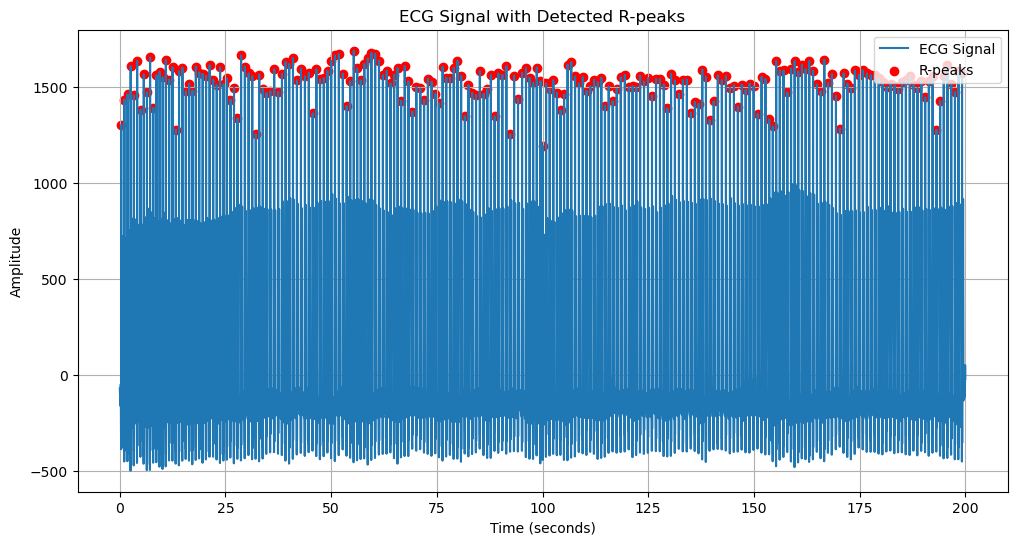

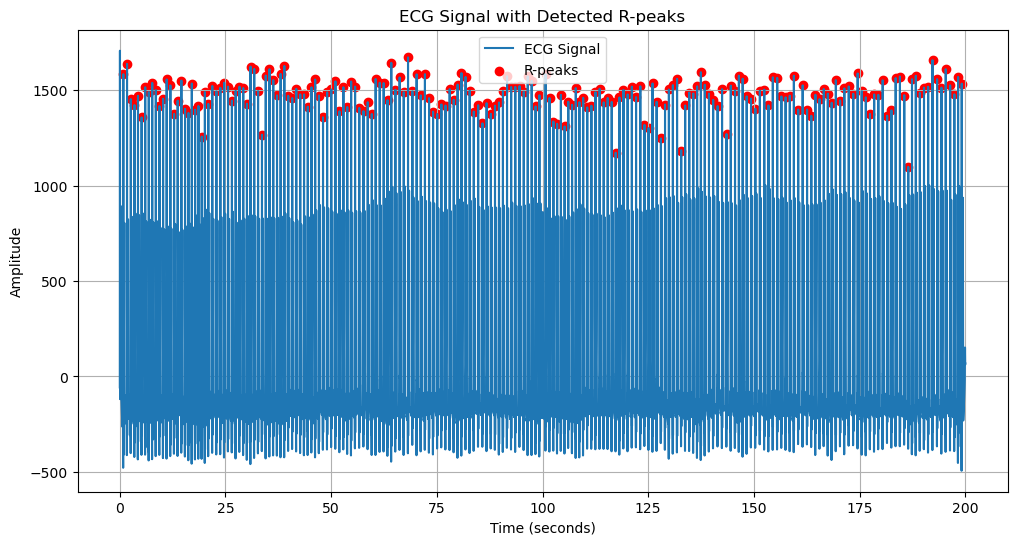

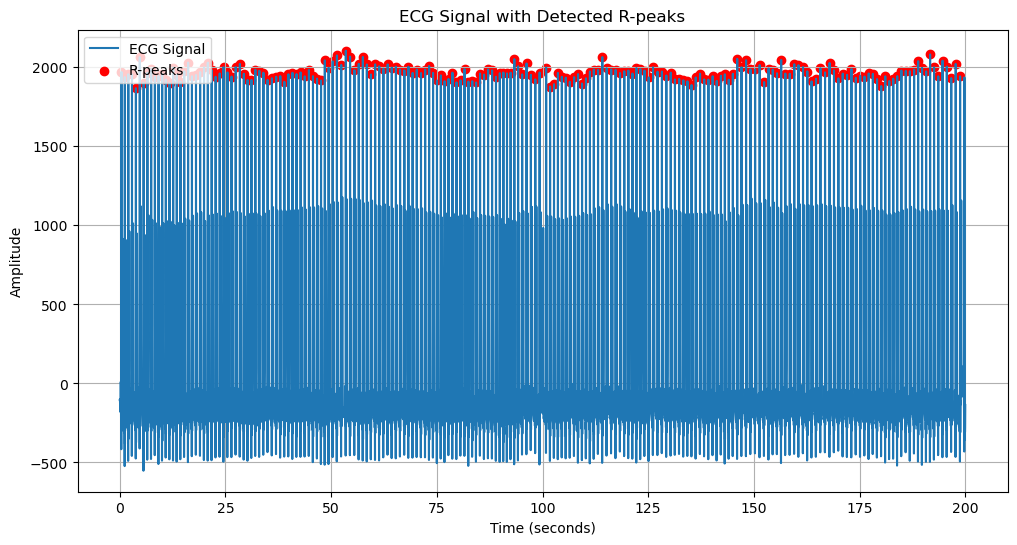

In [418]:
# Plot the ECG signal with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(ecg_time1, ecg_signal1, label='ECG Signal')
plt.scatter(rpeak_times_sub1 , ecg_signal1[rpeaks_sub1], c='r', marker='o', label='R-peaks')
plt.title("ECG Signal with Detected R-peaks")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Plot the ECG signal with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(ecg_time2, ecg_signal2, label='ECG Signal')
plt.scatter(rpeak_times_sub2 , ecg_signal2[rpeaks_sub2], c='r', marker='o', label='R-peaks')
plt.title("ECG Signal with Detected R-peaks")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# Plot the ECG signal with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(ecg_time3, ecg_signal3, label='ECG Signal')
plt.scatter(rpeak_times_sub3 , ecg_signal3[rpeaks_sub3], c='r', marker='o', label='R-peaks')
plt.title("ECG Signal with Detected R-peaks")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [419]:
# Calculate the time duration of the ECG signal in seconds
duration = len(ecg_signal1) / sampling_frequency_ecg

# Set the plot duration to be 10 seconds 
plot_duration_sub1 = min(10, duration)
plot_duration_sub2 = min(10, duration)
plot_duration_sub3 = min(10, duration)
plot_duration_sub4 = min(10, duration)
plot_duration_sub5 = min(10, duration)
plot_duration_sub9 = min(10, duration)
plot_duration_sub10 = min(10, duration)

# time array for the x-axis from 0 to the plot duration
time_array_sub1 = np.arange(len(ecg_signal1)) / sampling_frequency_ecg
time_array_sub1 = time_array_sub1[time_array_sub1 < plot_duration_sub1]

time_array_sub2 = np.arange(len(ecg_signal2)) / sampling_frequency_ecg
time_array_sub2 = time_array_sub2[time_array_sub2 < plot_duration_sub2]

time_array_sub5 = np.arange(len(ecg_signal5)) / sampling_frequency_ecg
time_array_sub5 = time_array_sub5[time_array_sub5 < plot_duration_sub5]

time_array_sub10 = np.arange(len(ecg_signal10)) / sampling_frequency_ecg
time_array_sub10 = time_array_sub10[time_array_sub10 < plot_duration_sub10]

time_array_sub9 = np.arange(len(ecg_signal9)) / sampling_frequency_ecg
time_array_sub9 = time_array_sub9[time_array_sub9 < plot_duration_sub9]





# Create a mask for R-peaks within the plot duration
r_peak_20s_mask_sub1 = rpeak_times_sub1  < plot_duration_sub1
r_peak_20s_times_sub1 = rpeak_times_sub1[r_peak_20s_mask_sub1]

r_peak_20s_mask_sub2 = rpeak_times_sub2  < plot_duration_sub2
r_peak_20s_times_sub2 = rpeak_times_sub2[r_peak_20s_mask_sub2]

r_peak_20s_mask_sub5 = rpeak_times_sub5  < plot_duration_sub5
r_peak_20s_times_sub5 = rpeak_times_sub5[r_peak_20s_mask_sub5]

r_peak_20s_mask_sub10 = rpeak_times_sub10  < plot_duration_sub10
r_peak_20s_times_sub10 = rpeak_times_sub10[r_peak_20s_mask_sub10]

r_peak_20s_mask_sub9 = rpeak_times_sub9  < plot_duration_sub9
r_peak_20s_times_sub9 = rpeak_times_sub9[r_peak_20s_mask_sub9]


In [420]:
# time array for the x-axis from 0 to the plot duration
segment_duration5 = np.arange(len(raw_bcg_signal5)) / fs
segment_duration2 = np.arange(len(raw_bcg_signal2)) / fs

plot_duration_sub5 = min(10, duration)
plot_duration_sub2 = min(10, duration)

#bcg_time_array_sub5 = np.arange(len(raw_bcg_signal5)) / fs
bcg_time_array_sub5 = filtered_bcg_timestamps5[filtered_bcg_timestamps5 < plot_duration_sub5]

bcg_mask_sub5 = filtered_bcg_timestamps5  < plot_duration_sub5
bcg_times_sub5 = filtered_bcg_timestamps5[bcg_mask_sub5]


#  time array for the x-axis from 0 to the plot duration
bcg_time_array_sub2 = filtered_bcg_timestamps2[filtered_bcg_timestamps2 < plot_duration_sub2]

bcg_mask_sub2 = filtered_bcg_timestamps2  < plot_duration_sub2
bcg_times_sub2 = filtered_bcg_timestamps2[bcg_mask_sub2]

bcg_mask_sub5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False])

# SYNCHRONIZATION OF SUBJECT 2 ECG AND BCG

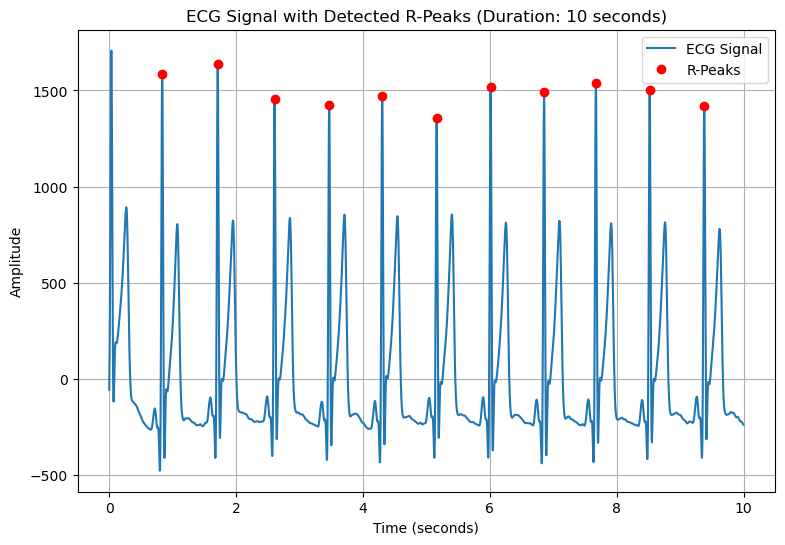

(0.0, 455.0)

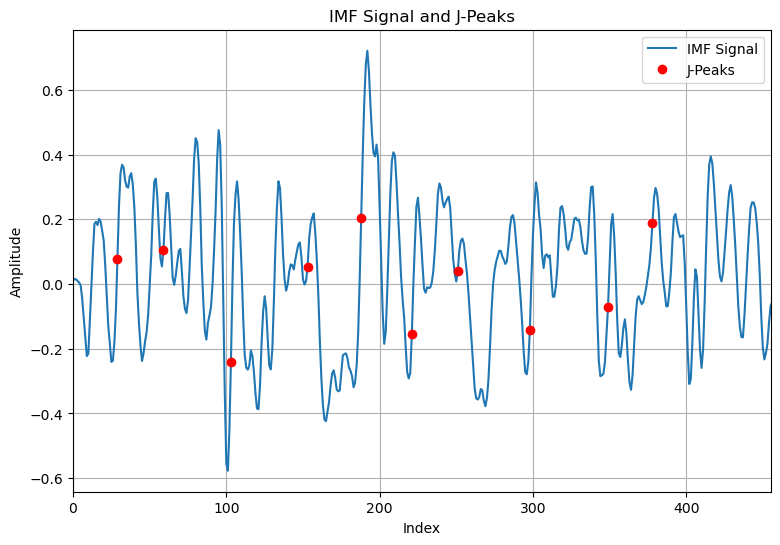

In [421]:
# Plot the ECG signal with detected R-peaks 
plt.figure(figsize=(9, 6))
plt.plot(time_array_sub2, ecg_signal2[:len(time_array_sub2)], label='ECG Signal')
plt.plot(r_peak_20s_times_sub2, ecg_signal2[rpeaks_sub2][:len(r_peak_20s_times_sub2)], 'ro', label='R-Peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title(f'ECG Signal with Detected R-Peaks (Duration: {plot_duration_sub5} seconds)')
plt.legend()
plt.grid(True)
plt.show()



# Plot the IMF signal and J-peaks
plt.figure(figsize=(9, 6))
plt.plot(cardiac_signal_sub2, label='IMF Signal')
plt.plot(jpeak_indices_sub2[0:10], cardiac_signal_sub2[jpeak_indices_sub2[0:10]], 'ro', label='J-Peaks')
plt.title("IMF Signal and J-Peaks")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.xlim(0, 455)  
#plt.show()



# SYNCHRONIZATION OF SUBJECT 5 ECG AND BCG

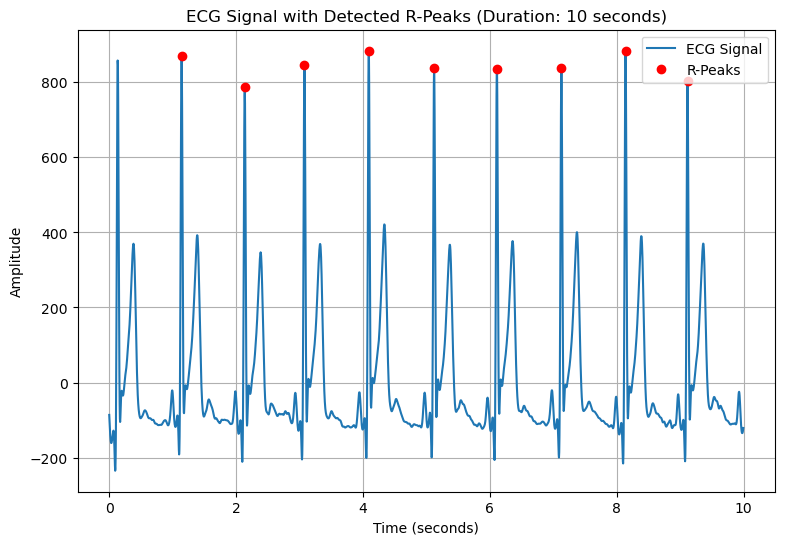

array([ 0.58,  1.18,  2.06,  3.06,  3.76,  4.42,  5.02,  5.96,  6.98,
        7.56,  8.24,  9.18,  9.8 , 10.38, 11.26, 11.96, 12.62])

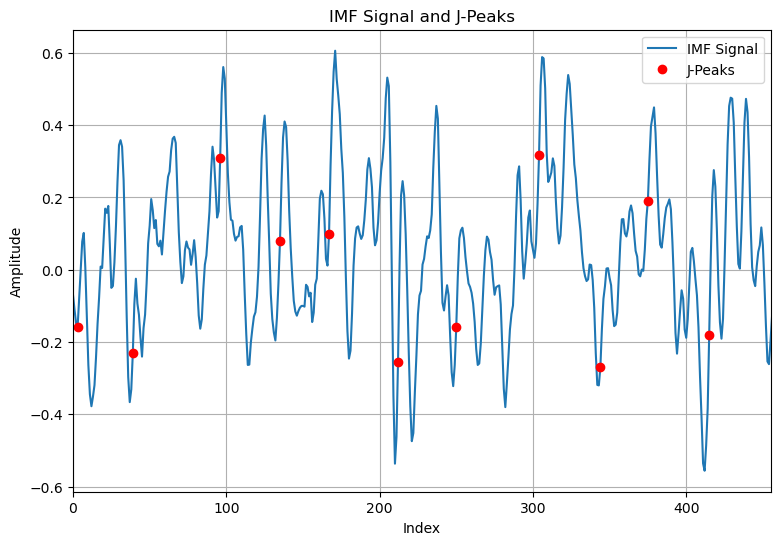

In [422]:
# Plot the ECG signal with detected R-peaks 
plt.figure(figsize=(9, 6))
plt.plot(time_array_sub5, ecg_signal5[:len(time_array_sub5)], label='ECG Signal')
plt.plot(r_peak_20s_times_sub5, ecg_signal5[rpeaks_sub5][:len(r_peak_20s_times_sub5)], 'ro', label='R-Peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title(f'ECG Signal with Detected R-Peaks (Duration: {plot_duration_sub5} seconds)')
plt.legend()
plt.grid(True)
plt.show()


# Plot the IMF signal and J-peaks
plt.figure(figsize=(9, 6))
plt.plot(cardiac_signal_sub5,  label='IMF Signal')
plt.plot(jpeak_indices_sub5[0:12], cardiac_signal_sub5[jpeak_indices_sub5[0:12]], 'ro', label='J-Peaks')
plt.title("IMF Signal and J-Peaks")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.xlim(0, 455)  
#plt.show()

bcg_timestamps_sub2

# SYNCHRONIZATION OF SUBJECT 10 ECG AND BCG

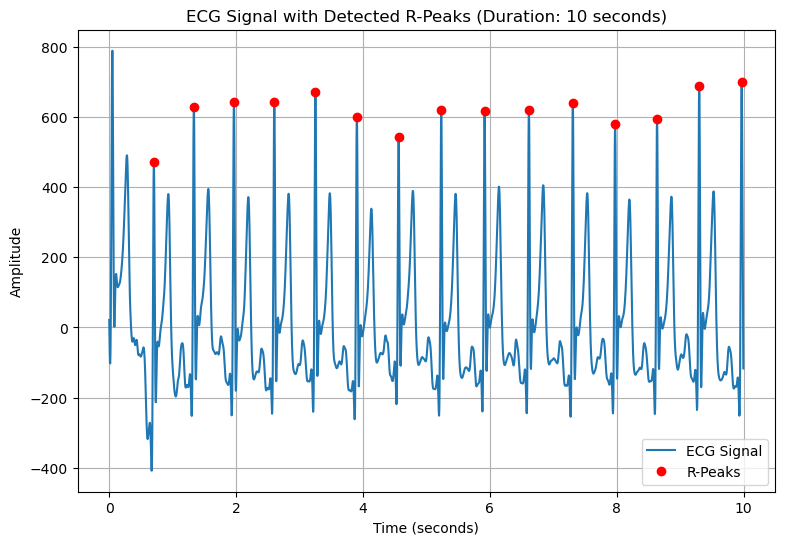

array([ 0.22,  0.84,  2.08,  2.94,  3.92,  4.94,  6.  ,  6.62,  7.86,
        8.48,  9.12,  9.7 , 10.48, 11.34, 12.12])

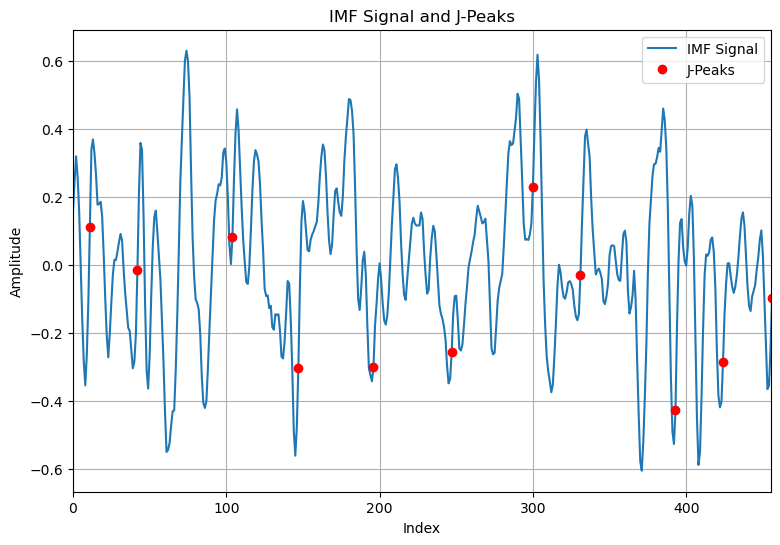

In [423]:
# Plot the ECG signal with detected R-peaks 
plt.figure(figsize=(9, 6))
plt.plot(time_array_sub10, ecg_signal10[:len(time_array_sub10)], label='ECG Signal')
plt.plot(r_peak_20s_times_sub10, ecg_signal10[rpeaks_sub10][:len(r_peak_20s_times_sub10)], 'ro', label='R-Peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title(f'ECG Signal with Detected R-Peaks (Duration: {plot_duration_sub5} seconds)')
plt.legend()
plt.grid(True)
plt.show()


# Plot the IMF signal and J-peaks
plt.figure(figsize=(9, 6))
plt.plot(cardiac_signal_sub10,  label='IMF Signal')
plt.plot(jpeak_indices_sub10[0:12], cardiac_signal_sub10[jpeak_indices_sub10[0:12]], 'ro', label='J-Peaks')
plt.title("IMF Signal and J-Peaks")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.xlim(0, 455)
#plt.show()

bcg_timestamps_sub10

# SYNCHRONIZATION OF SUBJECT 9 ECG AND BCG

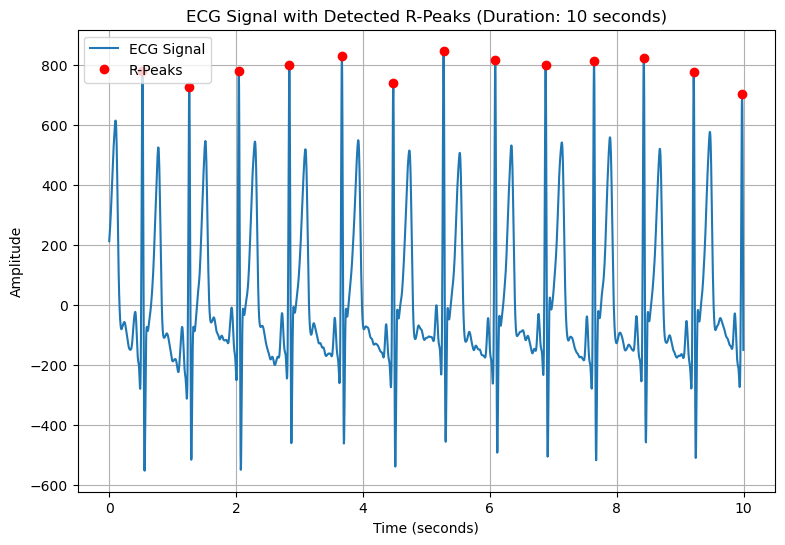

array([ 0.18,  1.12,  1.7 ,  2.82,  3.54,  4.7 ,  5.3 ,  5.9 ,  7.04,
        8.  ,  8.58,  9.34, 10.52, 11.42, 12.18, 12.76])

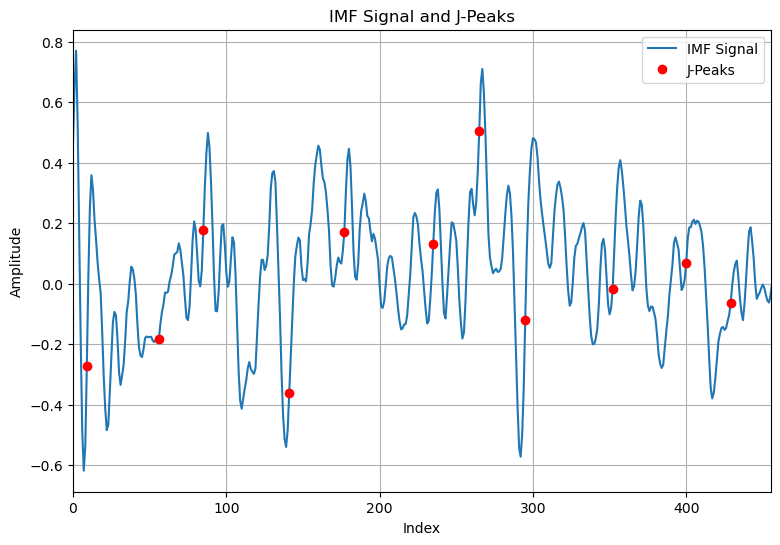

In [424]:
# Plot the ECG signal with detected R-peaks 
plt.figure(figsize=(9, 6))
plt.plot(time_array_sub9, ecg_signal9[:len(time_array_sub9)], label='ECG Signal')
plt.plot(r_peak_20s_times_sub9, ecg_signal9[rpeaks_sub9][:len(r_peak_20s_times_sub9)], 'ro', label='R-Peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title(f'ECG Signal with Detected R-Peaks (Duration: {plot_duration_sub5} seconds)')
plt.legend()
plt.grid(True)
plt.show()



# Plot the IMF signal and J-peaks
plt.figure(figsize=(9, 6))
plt.plot(cardiac_signal_sub9,  label='IMF Signal')
plt.plot(jpeak_indices_sub9[0:12], cardiac_signal_sub9[jpeak_indices_sub9[0:12]], 'ro', label='J-Peaks')
plt.title("IMF Signal and J-Peaks")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.xlim(0, 455)  
#plt.show()

bcg_timestamps_sub9


In [425]:
plot_duration = 11  # Duration in seconds
ecg_signal1_sync_duration = ecg_signal1[:int(plot_duration * sampling_frequency_ecg)]
r_peak_sync_duration_sub1 = rpeak_times_sub1[rpeak_times_sub1 < plot_duration]

plot_duration = 15  
ecg_signal2_sync_duration = ecg_signal2[:int(plot_duration * sampling_frequency_ecg)]
r_peak_sync_duration_sub2 = rpeak_times_sub2[rpeak_times_sub2 < plot_duration]

plot_duration = 15  
ecg_signal3_sync_duration = ecg_signal3[:int(plot_duration * sampling_frequency_ecg)]
r_peak_sync_duration_sub3 = rpeak_times_sub3[rpeak_times_sub3 < plot_duration]

plot_duration = 10  # Duration in seconds
ecg_signal4_sync_duration = ecg_signal4[:int(plot_duration * sampling_frequency_ecg)]
r_peak_sync_duration_sub4 = rpeak_times_sub4[rpeak_times_sub4 < plot_duration]

plot_duration = 11  
ecg_signal5_sync_duration = ecg_signal5[:int(plot_duration * sampling_frequency_ecg)]
r_peak_sync_duration_sub5 = rpeak_times_sub5[rpeak_times_sub5 < plot_duration]

filtered_rpeak_sub1 = r_peak_sync_duration_sub5 * sampling_frequency_ecg
filtered_rpeak_sub1 = r_peak_sync_duration_sub5 * sampling_frequency_ecg
filtered_rpeak_sub1 = r_peak_sync_duration_sub5 * sampling_frequency_ecg
filtered_rpeak_sub1 = r_peak_sync_duration_sub5 * sampling_frequency_ecg
filtered_rpeak_sub1 = r_peak_sync_duration_sub5 * sampling_frequency_ecg


# WINDOWED DATA LABELLING WITH JJI VARIATIONUSING A SLIDING WINDOW OF 4

In [426]:
# Step 11: Window-Based Labeling
window_size = 4 

# Organize labeled data pairs
input_data_sub1 = []
target_data_sub1 = []
labeled_data_pairs_sub1 = []
j_peak_sync_duration_sub1_reshaped = np.unique(filtered_bcg_timestamps_sub1[0:13])
num_windows_sub1 = len(filtered_bcg_timestamps_sub1[0:13])

for i in range(num_windows_sub1):
    window_center_sub1 = bcg_timestamps_sub1[i]
    window_start_sub1 = window_center_sub1 - window_size / 2
    window_end_sub1 = window_center_sub1 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub1 = np.searchsorted(bcg_timestamps_sub1, window_start_sub1, side='right')
    end_index_sub1 = np.searchsorted(bcg_timestamps_sub1, window_end_sub1, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub1 < end_index_sub1:
        windowed_synchronized_cardiac_signals_sub1 = cardiac_signal_sub1[start_index_sub1:end_index_sub1]
        avg_RRI_window_sub1 = jj_intervals_time_sub1[i] # Use the precalculated wavelet entropy value
        # Append the input-target pair to the list
        labeled_data_pairs_sub1.append((windowed_synchronized_cardiac_signals_sub1, avg_RRI_window_sub1))
        input_data_sub1.append(windowed_synchronized_cardiac_signals_sub1)
        target_data_sub1.append(avg_RRI_window_sub1)

In [427]:
# the new array
input_data_sub1_concat = []

#concatenate the input data from the beignning of the 1st timestamp to the end of 2nd timestamp during each windowed feature extraction
for i in range(len(input_data_sub1) - 1):
    concatenated_element = np.concatenate([input_data_sub1[i], input_data_sub1[i + 1]])
    input_data_sub1_concat.append(concatenated_element)
    
target_data_sub1_diff = []

# Iterate through the given list to calculate the difference between adjacent elements
for i in range(len( target_data_sub1) - 1):
    difference =  target_data_sub1[i + 1] -  target_data_sub1[i]
    target_data_sub1_diff.append(difference)
target_data_sub1_diff

target_data_sub1_diff = np.array(target_data_sub1_diff)

# Find the indices where target values are within the desired TOLERANCE level
valid_indices = np.where((target_data_sub1_diff <= 0.4) & (target_data_sub1_diff >= -0.4))[0]

# Filter the input and target data based on the valid indices
input_data_sub1_concat = [input_data_sub1_concat[i] for i in valid_indices]
target_data_sub1_diff = target_data_sub1_diff[valid_indices]

target_data_sub1_diff 

array([-0.18,  0.4 , -0.18, -0.12, -0.16,  0.4 , -0.34,  0.04,  0.04,
       -0.1 ,  0.22, -0.14])

In [428]:
# Step 11: Window-Based Labeling
window_size = 4  


# Organize labeled data pairs
input_data_sub2 = []
target_data_sub2 = []
labeled_data_pairs_sub2 = []
j_peak_sync_duration_sub2_reshaped = np.unique(filtered_bcg_timestamps_sub2[0:13])
num_windows_sub2 = len(filtered_bcg_timestamps_sub2[0:13])

for i in range(num_windows_sub2):
    window_center_sub2 = j_peak_sync_duration_sub2_reshaped[i]
    window_start_sub2 = window_center_sub2 - window_size / 2
    window_end_sub2 = window_center_sub2 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub2 = np.searchsorted(j_peak_sync_duration_sub2_reshaped, window_start_sub2, side='right')
    end_index_sub2 = np.searchsorted(j_peak_sync_duration_sub2_reshaped, window_end_sub2, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub2 < end_index_sub2:
        windowed_synchronized_cardiac_signals_sub2 = cardiac_signal_sub2[start_index_sub2:end_index_sub2]
        avg_RRI_window_sub2 = jj_intervals_time_sub2[i] # Use the precalculated wavelet entropy value
        # Append the input-target pair to the list
        labeled_data_pairs_sub2.append((windowed_synchronized_cardiac_signals_sub2, avg_RRI_window_sub2))
        input_data_sub2.append(windowed_synchronized_cardiac_signals_sub2)
        target_data_sub2.append(avg_RRI_window_sub2)

#target_data_sub2 
input_data_sub2

[array([0.01105984, 0.01561056, 0.01452107]),
 array([0.01105984, 0.01561056, 0.01452107, 0.00914963]),
 array([0.01105984, 0.01561056, 0.01452107, 0.00914963, 0.00455072]),
 array([ 0.01561056,  0.01452107,  0.00914963,  0.00455072, -0.00455072,
        -0.04619226]),
 array([ 0.01452107,  0.00914963,  0.00455072, -0.00455072, -0.04619226]),
 array([ 0.00914963,  0.00455072, -0.00455072, -0.04619226, -0.10615908]),
 array([ 0.00914963,  0.00455072, -0.00455072, -0.04619226, -0.10615908,
        -0.16872944]),
 array([-0.00455072, -0.04619226, -0.10615908, -0.16872944, -0.22275121]),
 array([-0.04619226, -0.10615908, -0.16872944, -0.22275121, -0.21451597]),
 array([-0.10615908, -0.16872944, -0.22275121, -0.21451597, -0.1092642 ]),
 array([-0.16872944, -0.22275121, -0.21451597, -0.1092642 , -0.00070751]),
 array([-0.22275121, -0.21451597, -0.1092642 , -0.00070751]),
 array([-0.21451597, -0.1092642 , -0.00070751])]

In [429]:
input_data_sub2_concat = []

#concatenate the input data from the bbeignning of the 1st timestamp to the end of 2nd timestamp during each windowed feature extraction
for i in range(len(input_data_sub2) - 1):
    concatenated_element = np.concatenate([input_data_sub2[i], input_data_sub2[i + 1]])
    input_data_sub2_concat.append(concatenated_element)
    
target_data_sub2_diff = []

# Iterate through the given list to calculate the difference between adjacent elements
for i in range(len( target_data_sub2) - 1):
    difference =  target_data_sub2[i + 1] -  target_data_sub2[i]
    target_data_sub2_diff.append(difference)
target_data_sub2_diff

target_data_sub2_diff = np.array(target_data_sub2_diff)

# Find the indices where target values are within the desired TOLERANCE level
valid_indices = np.where((target_data_sub2_diff <= 0.4) & (target_data_sub2_diff >= -0.4))[0]

# Filter the input and target data based on the valid indices
input_data_sub2_concat = [input_data_sub2_concat[i] for i in valid_indices]
target_data_sub2_diff = target_data_sub2_diff[valid_indices]

target_data_sub2_diff 

array([ 0.28,  0.12, -0.3 , -0.04, -0.06,  0.34,  0.08,  0.1 ,  0.26,
       -0.32, -0.04])

In [430]:

# Step 11: Window-Based Labeling
window_size = 4  

# Organize labeled data pairs
input_data_sub3 = []
target_data_sub3 = []
labeled_data_pairs_sub3 = []
j_peak_sync_duration_sub3_reshaped = np.unique(filtered_bcg_timestamps_sub3[0:13])
num_windows_sub3 = len(filtered_bcg_timestamps_sub3[0:13])

for i in range(num_windows_sub2):
    window_center_sub3 = j_peak_sync_duration_sub3_reshaped[i]
    window_start_sub3 = window_center_sub3 - window_size / 2
    window_end_sub3 = window_center_sub3 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub3 = np.searchsorted(j_peak_sync_duration_sub3_reshaped, window_start_sub3, side='right')
    end_index_sub3 = np.searchsorted(j_peak_sync_duration_sub3_reshaped, window_end_sub3, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub3 < end_index_sub3:
        windowed_synchronized_cardiac_signals_sub3 = cardiac_signal_sub3[start_index_sub3:end_index_sub3]
        avg_RRI_window_sub3 = jj_intervals_time_sub3[i] 
        
        # Append the input-target pair to the list
        labeled_data_pairs_sub3.append((windowed_synchronized_cardiac_signals_sub3, avg_RRI_window_sub3))
        input_data_sub3.append(windowed_synchronized_cardiac_signals_sub3)
        target_data_sub3.append(avg_RRI_window_sub3)

#target_data_sub2 
input_data_sub3

[array([-0.19506812, -0.27279609, -0.31580517]),
 array([-0.19506812, -0.27279609, -0.31580517, -0.21789702]),
 array([-0.19506812, -0.27279609, -0.31580517, -0.21789702, -0.07772797]),
 array([-0.27279609, -0.31580517, -0.21789702, -0.07772797,  0.07772797,
         0.20571479]),
 array([-0.31580517, -0.21789702, -0.07772797,  0.07772797,  0.20571479]),
 array([-0.21789702, -0.07772797,  0.07772797,  0.20571479,  0.26924152]),
 array([-0.21789702, -0.07772797,  0.07772797,  0.20571479,  0.26924152,
         0.25934503]),
 array([0.07772797, 0.20571479, 0.26924152, 0.25934503, 0.16289054]),
 array([0.20571479, 0.26924152, 0.25934503, 0.16289054, 0.02459222]),
 array([ 0.26924152,  0.25934503,  0.16289054,  0.02459222, -0.09416337]),
 array([ 0.25934503,  0.16289054,  0.02459222, -0.09416337, -0.17891278]),
 array([ 0.16289054,  0.02459222, -0.09416337, -0.17891278]),
 array([ 0.02459222, -0.09416337, -0.17891278])]

In [431]:
input_data_sub3_concat = []

#concatenate the input data from the bbeignning of the 1st timestamp to the end of 2nd timestamp during each windowed feature extraction
for i in range(len(input_data_sub3) - 1):
    concatenated_element = np.concatenate([input_data_sub3[i], input_data_sub3[i + 1]])
    input_data_sub3_concat.append(concatenated_element)
    
target_data_sub3_diff = []
# Iterate through the given list to calculate the difference between consecutive elements
for i in range(len( target_data_sub3) - 1):
    difference =  target_data_sub3[i + 1] -  target_data_sub3[i]
    target_data_sub3_diff.append(difference)
target_data_sub3_diff

target_data_sub3_diff = np.array(target_data_sub3_diff)

# Find the indices where target values are within the desired TOLERANCE level
valid_indices = np.where((target_data_sub3_diff <= 0.4) & (target_data_sub3_diff >= -0.4))[0]

# Filter the input and target data based on the valid indices
input_data_sub3_concat = [input_data_sub3_concat[i] for i in valid_indices]
target_data_sub3_diff = target_data_sub3_diff[valid_indices]

target_data_sub3_diff 

array([-0.02, -0.2 , -0.08,  0.08, -0.08,  0.22,  0.  , -0.12, -0.04,
       -0.1 ])

In [432]:
# Step 11: Window-Based Labeling
window_size = 4  

# Organize labeled data pairs
input_data_sub4 = []
target_data_sub4 = []
labeled_data_pairs_sub4 = []
j_peak_sync_duration_sub4_reshaped = np.unique(filtered_bcg_timestamps_sub4[0:13])
num_windows_sub4 = len(filtered_bcg_timestamps_sub4[0:13])

for i in range(num_windows_sub4):
    window_center_sub4 = j_peak_sync_duration_sub4_reshaped[i]
    window_start_sub4 = window_center_sub4 - window_size / 2
    window_end_sub4 = window_center_sub4 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub4 = np.searchsorted(j_peak_sync_duration_sub4_reshaped, window_start_sub4, side='right')
    end_index_sub4 = np.searchsorted(j_peak_sync_duration_sub4_reshaped, window_end_sub4, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub4 < end_index_sub4:
        windowed_synchronized_cardiac_signals_sub4 = cardiac_signal_sub4[start_index_sub4:end_index_sub4]
        avg_RRI_window_sub4 = jj_intervals_time_sub4[i] 
        # Append the input-target pair to the list
        labeled_data_pairs_sub4.append((windowed_synchronized_cardiac_signals_sub4, avg_RRI_window_sub4))
        input_data_sub4.append(windowed_synchronized_cardiac_signals_sub4)
        target_data_sub4.append(avg_RRI_window_sub4)

#target_data_sub2 
input_data_sub4

[array([0.53860172, 0.67923387, 1.2042362 ]),
 array([0.53860172, 0.67923387, 1.2042362 , 0.45626818]),
 array([0.53860172, 0.67923387, 1.2042362 , 0.45626818, 0.        ]),
 array([ 0.67923387,  1.2042362 ,  0.45626818,  0.        , -0.45626818]),
 array([ 1.2042362 ,  0.45626818,  0.        , -0.45626818, -1.2042362 ]),
 array([ 0.45626818,  0.        , -0.45626818, -1.2042362 , -0.67923387]),
 array([ 0.        , -0.45626818, -1.2042362 , -0.67923387, -0.53860172]),
 array([-0.45626818, -1.2042362 , -0.67923387, -0.53860172, -0.24050865]),
 array([-1.2042362 , -0.67923387, -0.53860172, -0.24050865, -0.57663186]),
 array([-0.67923387, -0.53860172, -0.24050865, -0.57663186,  0.0435812 ]),
 array([-0.53860172, -0.24050865, -0.57663186,  0.0435812 ,  0.84625979]),
 array([-0.24050865, -0.57663186,  0.0435812 ,  0.84625979]),
 array([-0.57663186,  0.0435812 ,  0.84625979])]

In [433]:
input_data_sub4_concat = []
#concatenate the input data from the bbeignning of the 1st timestamp to the end of 2nd timestamp during each windowed feature extraction
for i in range(len(input_data_sub4) - 1):
    concatenated_element = np.concatenate([input_data_sub4[i], input_data_sub4[i + 1]])
    input_data_sub4_concat.append(concatenated_element)
    
target_data_sub4_diff = []
# Iterate through the given list to calculate the difference between consecutive elements
for i in range(len( target_data_sub4) - 1):
    difference =  target_data_sub4[i + 1] -  target_data_sub4[i]
    target_data_sub4_diff.append(difference)
target_data_sub4_diff

target_data_sub4_diff = np.array(target_data_sub4_diff)

# Find the indices where target values are within the desired TOLERANCE level
valid_indices = np.where((target_data_sub4_diff <= 0.4) & (target_data_sub4_diff >= -0.4))[0]

# Filter the input and target data based on the valid indices
input_data_sub4_concat = [input_data_sub4_concat[i] for i in valid_indices]
target_data_sub4_diff = target_data_sub4_diff[valid_indices]

target_data_sub4_diff

array([-0.18,  0.4 , -0.18, -0.12, -0.16,  0.4 , -0.34,  0.04,  0.04,
       -0.1 ,  0.22, -0.14])

In [434]:
# Step 11: Window-Based Labeling
window_size = 4 

# Organize labeled data pairs
input_data_sub5 = []
target_data_sub5 = []
labeled_data_pairs_sub5 = []
j_peak_sync_duration_sub5_reshaped = np.unique(filtered_bcg_timestamps_sub5)
num_windows_sub5 = len(filtered_bcg_timestamps_sub5)

for i in range(num_windows_sub5):
    window_center_sub5 = j_peak_sync_duration_sub5_reshaped[i]
    window_start_sub5 = window_center_sub5 - window_size / 2
    window_end_sub5 = window_center_sub5 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub5 = np.searchsorted(j_peak_sync_duration_sub5_reshaped, window_start_sub5, side='right')
    end_index_sub5 = np.searchsorted(j_peak_sync_duration_sub5_reshaped, window_end_sub5, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub5 < end_index_sub5:
        windowed_synchronized_cardiac_signals_sub5 = cardiac_signal_sub5[start_index_sub5:end_index_sub5]
        avg_RRI_window_sub5 = jj_intervals_time_sub5[i] 
        # Append the input-target pair to the list
        labeled_data_pairs_sub5.append((windowed_synchronized_cardiac_signals_sub5, avg_RRI_window_sub5))
        input_data_sub5.append(windowed_synchronized_cardiac_signals_sub5)
        target_data_sub5.append(avg_RRI_window_sub5)

#target_data_sub2 
input_data_sub5

[array([-0.07030079, -0.11154896, -0.14809041]),
 array([-0.07030079, -0.11154896, -0.14809041, -0.15790954]),
 array([-0.07030079, -0.11154896, -0.14809041, -0.15790954, -0.07778963]),
 array([-0.11154896, -0.14809041, -0.15790954, -0.07778963,  0.        ]),
 array([-0.14809041, -0.15790954, -0.07778963,  0.        ,  0.07778963]),
 array([-0.15790954, -0.07778963,  0.        ,  0.07778963,  0.10166998]),
 array([-0.07778963,  0.        ,  0.07778963,  0.10166998,  0.00667962]),
 array([ 0.        ,  0.07778963,  0.10166998,  0.00667962, -0.12648375]),
 array([ 0.07778963,  0.10166998,  0.00667962, -0.12648375, -0.26347397]),
 array([ 0.10166998,  0.00667962, -0.12648375, -0.26347397, -0.34440264]),
 array([ 0.00667962, -0.12648375, -0.26347397, -0.34440264]),
 array([-0.12648375, -0.26347397, -0.34440264, -0.37766419, -0.35140879]),
 array([-0.34440264, -0.37766419, -0.35140879, -0.31931287]),
 array([-0.34440264, -0.37766419, -0.35140879, -0.31931287]),
 array([-0.37766419, -0.3514

In [435]:
input_data_sub5_concat = []
#concatenate the input data from the bbeignning of the 1st timestamp to the end of 2nd timestamp during each windowed feature extraction
for i in range(len(input_data_sub5) - 1):
    concatenated_element = np.concatenate([input_data_sub5[i], input_data_sub5[i + 1]])
    input_data_sub5_concat.append(concatenated_element)
    
target_data_sub5_diff = []
# Iterate through the given list to calculate the difference between adjacent elements
for i in range(len( target_data_sub5) - 1):
    difference =  target_data_sub5[i + 1] -  target_data_sub5[i]
    target_data_sub5_diff.append(difference)

target_data_sub5_diff = np.array(target_data_sub5_diff)

# Find the indices where target values are within the desired TOLERANCE level
valid_indices = np.where((target_data_sub5_diff <= 0.4) & (target_data_sub5_diff >= -0.4))[0]

# Filter the input and target data based on the valid indices
input_data_sub5_concat = [input_data_sub5_concat[i] for i in valid_indices]
target_data_sub5_diff = target_data_sub5_diff[valid_indices]

target_data_sub5_diff 

array([-0.36, -0.14,  0.26, -0.14,  0.32, -0.28, -0.18,  0.18,  0.22,
        0.12, -0.32,  0.22, -0.3 ])

In [436]:
# Step 11: Window-Based Labeling
window_size = 4  

# Organize labeled data pairs
input_data_sub6 = []
target_data_sub6 = []
labeled_data_pairs_sub6 = []
j_peak_sync_duration_sub6_reshaped = np.unique(filtered_bcg_timestamps_sub6[0:13])
num_windows_sub6 = len(filtered_bcg_timestamps_sub6[0:13])

for i in range(num_windows_sub6):
    window_center_sub6 = j_peak_sync_duration_sub6_reshaped[i]
    window_start_sub6 = window_center_sub6 - window_size / 2
    window_end_sub6 = window_center_sub6 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub6 = np.searchsorted(j_peak_sync_duration_sub6_reshaped, window_start_sub6, side='right')
    end_index_sub6 = np.searchsorted(j_peak_sync_duration_sub6_reshaped, window_end_sub6, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub6 < end_index_sub6:
        windowed_synchronized_cardiac_signals_sub6 = cardiac_signal_sub6[start_index_sub6:end_index_sub6]
        avg_RRI_window_sub6 = jj_intervals_time_sub6[i] 
        
        # Append the input-target pair to the list
        labeled_data_pairs_sub6.append((windowed_synchronized_cardiac_signals_sub6, avg_RRI_window_sub6))
        input_data_sub6.append(windowed_synchronized_cardiac_signals_sub6)
        target_data_sub6.append(avg_RRI_window_sub6)

#target_data_sub2 
input_data_sub6

[array([0.0160481 , 0.02235188, 0.0220288 ]),
 array([0.0160481 , 0.02235188, 0.0220288 , 0.01386044]),
 array([0.0160481 , 0.02235188, 0.0220288 , 0.01386044, 0.00630379]),
 array([ 0.02235188,  0.0220288 ,  0.01386044,  0.00630379, -0.00630379]),
 array([ 0.0220288 ,  0.01386044,  0.00630379, -0.00630379, -0.03842253]),
 array([ 0.01386044,  0.00630379, -0.00630379, -0.03842253, -0.08174995]),
 array([ 0.00630379, -0.00630379, -0.03842253, -0.08174995, -0.16013395]),
 array([-0.00630379, -0.03842253, -0.08174995, -0.16013395, -0.25929564]),
 array([-0.03842253, -0.08174995, -0.16013395, -0.25929564, -0.36815369]),
 array([-0.08174995, -0.16013395, -0.25929564, -0.36815369, -0.46020047]),
 array([-0.16013395, -0.25929564, -0.36815369, -0.46020047, -0.51755287]),
 array([-0.25929564, -0.36815369, -0.46020047, -0.51755287]),
 array([-0.36815369, -0.46020047, -0.51755287])]

In [437]:
input_data_sub6_concat = []
#concatenate the input data from the bbeignning of the 1st timestamp to the end of 2nd timestamp during each windowed feature extraction
for i in range(len(input_data_sub6) - 1):
    concatenated_element = np.concatenate([input_data_sub6[i], input_data_sub6[i + 1]])
    input_data_sub6_concat.append(concatenated_element)
    
target_data_sub6_diff = []
# Iterate through the given list to calculate the difference between adjacent elements
for i in range(len( target_data_sub6) - 1):
    difference =  target_data_sub6[i + 1] -  target_data_sub6[i]
    target_data_sub6_diff.append(difference)
target_data_sub6_diff

target_data_sub6_diff = np.array(target_data_sub6_diff)

# Find the indices where target values are within the desired TOLERANCE level
valid_indices = np.where((target_data_sub6_diff <= 0.4) & (target_data_sub6_diff >= -0.4))[0]

# Filter the input and target data based on the valid indices
input_data_sub6_concat = [input_data_sub6_concat[i] for i in valid_indices]
target_data_sub6_diff = target_data_sub6_diff[valid_indices]

target_data_sub6_diff 

array([-0.1 ,  0.  ,  0.22, -0.3 ,  0.  , -0.02,  0.06, -0.06,  0.02,
        0.08,  0.18, -0.28])

In [438]:
# Step 11: Window-Based Labeling
window_size = 4  

# Organize labeled data pairs
input_data_sub7 = []
target_data_sub7 = []
labeled_data_pairs_sub7 = []
j_peak_sync_duration_sub7_reshaped = np.unique(filtered_bcg_timestamps_sub7[0:13])
num_windows_sub7 = len(filtered_bcg_timestamps_sub7[0:13])

for i in range(num_windows_sub7):
    window_center_sub7 = j_peak_sync_duration_sub7_reshaped[i]
    window_start_sub7 = window_center_sub7 - window_size / 2
    window_end_sub7 = window_center_sub7 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub7 = np.searchsorted(j_peak_sync_duration_sub7_reshaped, window_start_sub7, side='right')
    end_index_sub7 = np.searchsorted(j_peak_sync_duration_sub7_reshaped, window_end_sub7, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub7 < end_index_sub7:
        windowed_synchronized_cardiac_signals_sub7 = cardiac_signal_sub7[start_index_sub7:end_index_sub7]
        avg_RRI_window_sub7 = jj_intervals_time_sub7[i]
        # Append the input-target pair to the list
        labeled_data_pairs_sub7.append((windowed_synchronized_cardiac_signals_sub7, avg_RRI_window_sub7))
        input_data_sub7.append(windowed_synchronized_cardiac_signals_sub7)
        target_data_sub7.append(avg_RRI_window_sub7)

#target_data_sub2 
input_data_sub7

[array([-0.55766349, -0.77677354, -0.9353231 ]),
 array([-0.55766349, -0.77677354, -0.9353231 , -0.65154717]),
 array([-0.55766349, -0.77677354, -0.9353231 , -0.65154717, -0.21911005]),
 array([-0.77677354, -0.9353231 , -0.65154717, -0.21911005,  0.21911005]),
 array([-0.9353231 , -0.65154717, -0.21911005,  0.21911005,  0.58117065]),
 array([-0.65154717, -0.21911005,  0.21911005,  0.58117065,  0.73302941]),
 array([-0.21911005,  0.21911005,  0.58117065,  0.73302941,  0.63334098]),
 array([0.21911005, 0.58117065, 0.73302941, 0.63334098, 0.38349969,
        0.09246677]),
 array([ 0.58117065,  0.73302941,  0.63334098,  0.38349969,  0.09246677,
        -0.15525203]),
 array([ 0.73302941,  0.63334098,  0.38349969,  0.09246677, -0.15525203]),
 array([ 0.73302941,  0.63334098,  0.38349969,  0.09246677, -0.15525203,
        -0.34491926]),
 array([ 0.63334098,  0.38349969,  0.09246677, -0.15525203, -0.34491926]),
 array([ 0.09246677, -0.15525203, -0.34491926])]

In [439]:
input_data_sub7_concat = []
#concatenate the input data from the bbeignning of the 1st timestamp to the end of 2nd timestamp during each windowed feature extraction
for i in range(len(input_data_sub7) - 1):
    concatenated_element = np.concatenate([input_data_sub7[i], input_data_sub7[i + 1]])
    input_data_sub7_concat.append(concatenated_element)
    
target_data_sub7_diff = []
# Iterate through the given list to calculate the difference between consecutive elements
for i in range(len( target_data_sub7) - 1):
    difference =  target_data_sub7[i + 1] -  target_data_sub7[i]
    target_data_sub7_diff.append(difference)
target_data_sub7_diff

target_data_sub7_diff = np.array(target_data_sub7_diff)

# Find the indices where target values are within the desired TOLERANCE level
valid_indices = np.where((target_data_sub7_diff <= 0.4) & (target_data_sub7_diff >= -0.4))[0]

# Filter the input and target data based on the valid indices
input_data_sub7_concat = [input_data_sub7_concat[i] for i in valid_indices]
target_data_sub7_diff = target_data_sub7_diff[valid_indices]

target_data_sub7_diff 

array([ 0.02,  0.22, -0.28,  0.14, -0.02, -0.08, -0.12, -0.02,  0.12,
        0.24, -0.1 ])

In [440]:
# Step 11: Window-Based Labeling
window_size = 4  

# Organize labeled data pairs
input_data_sub8 = []
target_data_sub8 = []
labeled_data_pairs_sub8 = []
j_peak_sync_duration_sub8_reshaped = np.unique(filtered_bcg_timestamps_sub8[0:13])
num_windows_sub8 = len(filtered_bcg_timestamps_sub8[0:13])

for i in range(num_windows_sub8):
    window_center_sub8 = j_peak_sync_duration_sub8_reshaped[i]
    window_start_sub8 = window_center_sub8 - window_size / 2
    window_end_sub8 = window_center_sub8 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub8 = np.searchsorted(j_peak_sync_duration_sub8_reshaped, window_start_sub8, side='right')
    end_index_sub8 = np.searchsorted(j_peak_sync_duration_sub8_reshaped, window_end_sub8, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub8 < end_index_sub8:
        windowed_synchronized_cardiac_signals_sub8 = cardiac_signal_sub8[start_index_sub8:end_index_sub8]
        avg_RRI_window_sub8 = jj_intervals_time_sub8[i] 
        # Append the input-target pair to the list
        labeled_data_pairs_sub8.append((windowed_synchronized_cardiac_signals_sub8, avg_RRI_window_sub8))
        input_data_sub8.append(windowed_synchronized_cardiac_signals_sub8)
        target_data_sub8.append(avg_RRI_window_sub8)

#target_data_sub2 
input_data_sub8

[array([-0.08382326, -0.11563009, -0.14208873]),
 array([-0.08382326, -0.11563009, -0.14208873, -0.09802401]),
 array([-0.08382326, -0.11563009, -0.14208873, -0.09802401, -0.03180683]),
 array([-0.11563009, -0.14208873, -0.09802401, -0.03180683,  0.03180683]),
 array([-0.14208873, -0.09802401, -0.03180683,  0.03180683,  0.0813491 ]),
 array([-0.09802401, -0.03180683,  0.03180683,  0.0813491 ,  0.09858489]),
 array([-0.03180683,  0.03180683,  0.0813491 ,  0.09858489,  0.07506245]),
 array([ 0.03180683,  0.0813491 ,  0.09858489,  0.07506245, -0.00288783]),
 array([ 0.0813491 ,  0.09858489,  0.07506245, -0.00288783, -0.10051699]),
 array([ 0.09858489,  0.07506245, -0.00288783, -0.10051699]),
 array([ 0.07506245, -0.00288783, -0.10051699, -0.18738645, -0.24050831]),
 array([-0.10051699, -0.18738645, -0.24050831]),
 array([-0.10051699, -0.18738645, -0.24050831])]

In [441]:
input_data_sub8_concat = []
#concatenate the input data from the bbeignning of the 1st timestamp to the end of 2nd timestamp during each windowed feature extraction
for i in range(len(input_data_sub8) - 1):
    concatenated_element = np.concatenate([input_data_sub8[i], input_data_sub8[i + 1]])
    input_data_sub8_concat.append(concatenated_element)
    
target_data_sub8_diff = []
# Iterate through the given list to calculate the difference between adjacent elements
for i in range(len( target_data_sub8) - 1):
    difference =  target_data_sub8[i + 1] -  target_data_sub8[i]
    target_data_sub8_diff.append(difference)
target_data_sub8_diff

target_data_sub8_diff = np.array(target_data_sub8_diff)

# Find the indices where target values are within the desired TOLERANCE level
valid_indices = np.where((target_data_sub8_diff <= 0.4) & (target_data_sub8_diff >= -0.4))[0]

# Filter the input and target data based on the valid indices
input_data_sub8_concat = [input_data_sub8_concat[i] for i in valid_indices]
target_data_sub8_diff = target_data_sub8_diff[valid_indices]

target_data_sub8_diff 

array([ 0.12,  0.2 , -0.32, -0.08, -0.14, -0.2 ,  0.04, -0.34, -0.2 ,
        0.02])

In [442]:
# Step 11: Window-Based Labeling
window_size = 4  

# Organize labeled data pairs
input_data_sub9 = []
target_data_sub9 = []
labeled_data_pairs_sub9 = []
j_peak_sync_duration_sub9_reshaped = np.unique(filtered_bcg_timestamps_sub9[0:13])
num_windows_sub9 = len(filtered_bcg_timestamps_sub9[0:13])

for i in range(num_windows_sub9):
    window_center_sub9 = j_peak_sync_duration_sub9_reshaped[i]
    window_start_sub9 = window_center_sub9 - window_size / 2
    window_end_sub9 = window_center_sub9 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub9 = np.searchsorted(j_peak_sync_duration_sub9_reshaped, window_start_sub9, side='right')
    end_index_sub9 = np.searchsorted(j_peak_sync_duration_sub9_reshaped, window_end_sub9, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub9 < end_index_sub9:
        windowed_synchronized_cardiac_signals_sub9 = cardiac_signal_sub9[start_index_sub9:end_index_sub9]
        avg_RRI_window_sub9 = jj_intervals_time_sub9[i] 
        # Append the input-target pair to the list
        labeled_data_pairs_sub9.append((windowed_synchronized_cardiac_signals_sub9, avg_RRI_window_sub9))
        input_data_sub9.append(windowed_synchronized_cardiac_signals_sub9)
        target_data_sub9.append(avg_RRI_window_sub9)

#target_data_sub2 
input_data_sub9

[array([0.46761173, 0.65287397, 0.77051846]),
 array([0.46761173, 0.65287397, 0.77051846, 0.53448452]),
 array([0.46761173, 0.65287397, 0.77051846, 0.53448452, 0.18526224]),
 array([ 0.65287397,  0.77051846,  0.53448452,  0.18526224, -0.18526224]),
 array([ 0.77051846,  0.53448452,  0.18526224, -0.18526224, -0.48689542]),
 array([ 0.53448452,  0.18526224, -0.18526224, -0.48689542, -0.61902595]),
 array([ 0.18526224, -0.18526224, -0.48689542, -0.61902595, -0.5382617 ]),
 array([-0.18526224, -0.48689542, -0.61902595, -0.5382617 ]),
 array([-0.48689542, -0.61902595, -0.5382617 , -0.27179777,  0.02386384]),
 array([-0.5382617 , -0.27179777,  0.02386384,  0.25194541]),
 array([-0.5382617 , -0.27179777,  0.02386384,  0.25194541,  0.35861761]),
 array([-0.27179777,  0.02386384,  0.25194541,  0.35861761]),
 array([0.02386384, 0.25194541, 0.35861761])]

In [443]:
input_data_sub9_concat = []
#concatenate the input data from the bbeignning of the 1st timestamp to the end of 2nd timestamp during each windowed feature extraction
for i in range(len(input_data_sub9) - 1):
    concatenated_element = np.concatenate([input_data_sub9[i], input_data_sub9[i + 1]])
    input_data_sub9_concat.append(concatenated_element)
    
target_data_sub9_diff = []
# Iterate through the given list to calculate the difference between adjacent elements
for i in range(len( target_data_sub9) - 1):
    difference =  target_data_sub9[i + 1] -  target_data_sub9[i]
    target_data_sub9_diff.append(difference)

target_data_sub9_diff = np.array(target_data_sub9_diff)

# Find the indices where target values are within the desired TOLERANCE level
valid_indices = np.where((target_data_sub9_diff <= 0.4) & (target_data_sub9_diff >= -0.4))[0]

# Filter the input and target data based on the valid indices
input_data_sub9_concat = [input_data_sub9_concat[i] for i in valid_indices]
target_data_sub9_diff = target_data_sub9_diff[valid_indices]

target_data_sub9_diff 

array([-0.36,  0.  , -0.18, -0.38,  0.18, -0.28])

In [444]:
# Step 11: Window-Based Labeling
window_size = 4 

# Organize labeled data pairs
input_data_sub10 = []
target_data_sub10 = []
labeled_data_pairs_sub10 = []
j_peak_sync_duration_sub10_reshaped = np.unique(filtered_bcg_timestamps_sub10[0:13])
num_windows_sub10 = len(filtered_bcg_timestamps_sub10[0:13])

for i in range(num_windows_sub10):
    window_center_sub10 = j_peak_sync_duration_sub10_reshaped[i]
    window_start_sub10 = window_center_sub10 - window_size / 2
    window_end_sub10 = window_center_sub10 + window_size / 2

    # Find the indices corresponding to the window start and end times
    start_index_sub10 = np.searchsorted(j_peak_sync_duration_sub10_reshaped, window_start_sub10, side='right')
    end_index_sub10 = np.searchsorted(j_peak_sync_duration_sub10_reshaped, window_end_sub10, side='left')
    
    # Check if there are valid indices for the window
    if start_index_sub10 < end_index_sub10:
        windowed_synchronized_cardiac_signals_sub10 = cardiac_signal_sub10[start_index_sub10:end_index_sub10]
        
        avg_RRI_window_sub10 = jj_intervals_time_sub10[i] 
        # Append the input-target pair to the list
        labeled_data_pairs_sub10.append((windowed_synchronized_cardiac_signals_sub10, avg_RRI_window_sub10))
        input_data_sub10.append(windowed_synchronized_cardiac_signals_sub10)
        target_data_sub10.append(avg_RRI_window_sub10)

#target_data_sub2 
input_data_sub10

[array([0.16178469, 0.2463628 , 0.32026472]),
 array([0.16178469, 0.2463628 , 0.32026472]),
 array([0.16178469, 0.2463628 , 0.32026472, 0.25957402, 0.15848004]),
 array([0.32026472, 0.25957402, 0.15848004]),
 array([3.20264724e-01, 2.59574025e-01, 1.58480039e-01, 1.38777878e-17]),
 array([ 1.58480039e-01,  1.38777878e-17, -1.58480039e-01, -2.82550391e-01]),
 array([ 1.38777878e-17, -1.58480039e-01, -2.82550391e-01, -3.53088415e-01]),
 array([ 1.38777878e-17, -1.58480039e-01, -2.82550391e-01, -3.53088415e-01,
        -2.60561763e-01]),
 array([-0.15848004, -0.28255039, -0.35308842, -0.26056176, -0.10668189,
         0.11339864]),
 array([-0.28255039, -0.35308842, -0.26056176, -0.10668189,  0.11339864]),
 array([-0.35308842, -0.26056176, -0.10668189,  0.11339864,  0.34037491]),
 array([-0.35308842, -0.26056176, -0.10668189,  0.11339864,  0.34037491]),
 array([-0.10668189,  0.11339864,  0.34037491])]

In [445]:
input_data_sub10_concat = []
#concatenate the input data from the bbeignning of the 1st timestamp to the end of 2nd timestamp during each windowed feature extraction
for i in range(len(input_data_sub10) - 1):
    concatenated_element = np.concatenate([input_data_sub10[i], input_data_sub10[i + 1]])
    input_data_sub10_concat.append(concatenated_element)
    
target_data_sub10_diff = []
# Iterate through the given list to calculate the difference between adjacent elements
for i in range(len( target_data_sub10) - 1):
    difference =  target_data_sub10[i + 1] -  target_data_sub10[i]
    target_data_sub10_diff.append(difference)

target_data_sub10_diff = np.array(target_data_sub10_diff)

# Find the indices where target values are within the desired range
valid_indices = np.where((target_data_sub10_diff <= 0.4) & (target_data_sub10_diff >= -0.4))[0]

# Filter the input and target data based on the valid indices
input_data_sub10_concat = [input_data_sub10_concat[i] for i in valid_indices]
target_data_sub10_diff = target_data_sub10_diff[valid_indices]
    
target_data_sub10_diff 

array([-0.38,  0.12,  0.04,  0.04,  0.02, -0.06,  0.2 ,  0.08])

In [446]:
target_data_sub1 = np.array(target_data_sub1_diff)
target_data_sub2 = np.array(target_data_sub2_diff)
target_data_sub3 = np.array(target_data_sub3_diff)
target_data_sub4 = np.array(target_data_sub4_diff)
target_data_sub5 = np.array(target_data_sub5_diff)
target_data_sub6 = np.array(target_data_sub6_diff)
target_data_sub7 = np.array(target_data_sub7_diff)
target_data_sub8 = np.array(target_data_sub8_diff)
target_data_sub9 = np.array(target_data_sub9_diff)
target_data_sub10 = np.array(target_data_sub10_diff)

In [447]:
print(len(input_data_sub1_concat)); print(len(target_data_sub1))
print(len(input_data_sub2_concat)); print(len(target_data_sub2))
print(len(input_data_sub3_concat)); print(len(target_data_sub3))
print(len(input_data_sub4_concat)); print(len(target_data_sub4))
print(len(input_data_sub5_concat)); print(len(target_data_sub5))
print(len(input_data_sub6_concat)); print(len(target_data_sub6))
print(len(input_data_sub7_concat)); print(len(target_data_sub7))
print(len(input_data_sub8_concat)); print(len(target_data_sub8))
print(len(input_data_sub9_concat)); print(len(target_data_sub9))
print(len(input_data_sub10_concat)); print(len(target_data_sub10))

12
12
11
11
10
10
12
12
13
13
12
12
11
11
10
10
6
6
8
8


In [ ]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [354]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Combine all input data arrays into one list
all_input_data = [input_data_sub1_concat, input_data_sub2_concat, input_data_sub3_concat, input_data_sub4_concat,
                 input_data_sub5_concat, input_data_sub6_concat, input_data_sub7_concat, input_data_sub8_concat, input_data_sub9_concat, input_data_sub10_concat]

# Create variables to store the padded data for each input source
padded_input_data_sub1 = None ; padded_input_data_sub2 = None
padded_input_data_sub3 = None ; padded_input_data_sub4 = None
padded_input_data_sub5 = None ; padded_input_data_sub6 = None
padded_input_data_sub7 = None ; padded_input_data_sub8 = None
padded_input_data_sub9 = None ; padded_input_data_sub10 = None


max_sequence_length = max(max(len(seq) for seq in data) for data in all_input_data)

# Pad sequences to match the maximum length
padded_input_data = []
for data in all_input_data:
    padded_data = pad_sequences(data, maxlen=13, dtype='float32', padding='post', truncating='post')
    padded_input_data.append(padded_data)

padded_input_data_sub1 = padded_input_data[0]
padded_input_data_sub2 = padded_input_data[1]
padded_input_data_sub3 = padded_input_data[2]
padded_input_data_sub4 = padded_input_data[3]
padded_input_data_sub5 = padded_input_data[4]
padded_input_data_sub6 = padded_input_data[5]
padded_input_data_sub7 = padded_input_data[6]
padded_input_data_sub8 = padded_input_data[7]
padded_input_data_sub9 = padded_input_data[8]
padded_input_data_sub10 = padded_input_data[9]

In [355]:
combined_input_data_sub1 = padded_input_data_sub1
combined_input_data_sub2 = padded_input_data_sub2
combined_input_data_sub3 = padded_input_data_sub3
combined_input_data_sub4 = padded_input_data_sub4
combined_input_data_sub5 = padded_input_data_sub5
combined_input_data_sub6 = padded_input_data_sub6
combined_input_data_sub7 = padded_input_data_sub7
combined_input_data_sub8 = padded_input_data_sub8
combined_input_data_sub9 = padded_input_data_sub9
combined_input_data_sub10 = padded_input_data_sub10


In [356]:
print(combined_input_data_sub1) ; print(combined_input_data_sub2)
print(combined_input_data_sub3) ; print(combined_input_data_sub4)
print(combined_input_data_sub5) ; print(combined_input_data_sub6)
print(combined_input_data_sub7) ; print(combined_input_data_sub8)
print(combined_input_data_sub8) ; print(combined_input_data_sub10)

[[ 0.5386017   0.67923385  1.2042361   0.5386017   0.67923385  1.2042361
   0.4562682   0.          0.          0.          0.          0.
   0.        ]
 [ 0.5386017   0.67923385  1.2042361   0.4562682   0.5386017   0.67923385
   1.2042361   0.4562682   0.          0.          0.          0.
   0.        ]
 [ 0.5386017   0.67923385  1.2042361   0.4562682   0.          0.67923385
   1.2042361   0.4562682   0.         -0.4562682   0.          0.
   0.        ]
 [ 0.67923385  1.2042361   0.4562682   0.         -0.4562682   1.2042361
   0.4562682   0.         -0.4562682  -1.2042361   0.          0.
   0.        ]
 [ 1.2042361   0.4562682   0.         -0.4562682  -1.2042361   0.4562682
   0.         -0.4562682  -1.2042361  -0.67923385  0.          0.
   0.        ]
 [ 0.4562682   0.         -0.4562682  -1.2042361  -0.67923385  0.
  -0.4562682  -1.2042361  -0.67923385 -0.5386017   0.          0.
   0.        ]
 [ 0.         -0.4562682  -1.2042361  -0.67923385 -0.5386017  -0.4562682
  -1.204

In [357]:
print(combined_input_data_sub1) ; print(combined_input_data_sub2)
print(combined_input_data_sub4)
print(combined_input_data_sub5) ; print(combined_input_data_sub6)
print(combined_input_data_sub7) ; print(combined_input_data_sub8)
print(combined_input_data_sub8) ; print(combined_input_data_sub10)

[[ 0.5386017   0.67923385  1.2042361   0.5386017   0.67923385  1.2042361
   0.4562682   0.          0.          0.          0.          0.
   0.        ]
 [ 0.5386017   0.67923385  1.2042361   0.4562682   0.5386017   0.67923385
   1.2042361   0.4562682   0.          0.          0.          0.
   0.        ]
 [ 0.5386017   0.67923385  1.2042361   0.4562682   0.          0.67923385
   1.2042361   0.4562682   0.         -0.4562682   0.          0.
   0.        ]
 [ 0.67923385  1.2042361   0.4562682   0.         -0.4562682   1.2042361
   0.4562682   0.         -0.4562682  -1.2042361   0.          0.
   0.        ]
 [ 1.2042361   0.4562682   0.         -0.4562682  -1.2042361   0.4562682
   0.         -0.4562682  -1.2042361  -0.67923385  0.          0.
   0.        ]
 [ 0.4562682   0.         -0.4562682  -1.2042361  -0.67923385  0.
  -0.4562682  -1.2042361  -0.67923385 -0.5386017   0.          0.
   0.        ]
 [ 0.         -0.4562682  -1.2042361  -0.67923385 -0.5386017  -0.4562682
  -1.204

In [358]:
input_data = np.concatenate((combined_input_data_sub1, combined_input_data_sub2, combined_input_data_sub3, 
                             combined_input_data_sub4, combined_input_data_sub5, combined_input_data_sub6,
                             combined_input_data_sub7), axis=0)


input_data = np.array(input_data)
len(input_data)

81

In [359]:
target_data_sub123 = np.concatenate((target_data_sub1, target_data_sub2, target_data_sub3, 
                                     target_data_sub4,  target_data_sub5,  target_data_sub6, target_data_sub7), axis=0)

In [360]:
target_data = np.array(target_data_sub123)
len(target_data)

81

In [1170]:


# Convert target values to binary labels
output_data = []
for i in target_data:
    if -0.07 <= i <= 0.07:
        output_data.append(0)
    else:
        output_data.append(1)

    
    
    
    # Convert the binary labels to a regular Python list
output_data_binary_labels = np.array(output_data)
output_data_binary_labels

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1])

In [1171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping

In [ ]:
# Set a random seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [1172]:
# Normalize input data using z-score
scaler = StandardScaler()
normalized_input_data = scaler.fit_transform(input_data)

# Reshape the input data to (num_samples, sequence_length, input_dim)
num_samples, sequence_length = normalized_input_data.shape
input_dim = 1  

reshaped_input_data = normalized_input_data.reshape((normalized_input_data.shape[0], normalized_input_data.shape[1], input_dim))

In [1222]:
learning_rate = 0.0003

# optimizer with the desired learning rate
custom_optimizer = Adam(learning_rate=learning_rate)

In [1223]:
# Create a KFold object with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=43)

In [1224]:

model = Sequential()
model.add(Bidirectional(LSTM(128, activation='relu'), input_shape=(13, 1)))
model.add(Dense(1))
model

In [1225]:
model.compile(custom_optimizer, loss='mse', metrics=['accuracy'])

In [ ]:
# Set a random seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [1231]:
# Train the model using KFold cross validation
fold = 0
for train_index, test_index in kf.split(reshaped_input_data):
    X_train, X_test, y_train, y_test = train_test_split(
    reshaped_input_data, output_data_binary_labels, test_size=0.3, random_state=42)

    early_stopping = EarlyStopping(patience=10)
    history = model.fit(X_train, y_train, epochs=150, verbose=2, callbacks=[early_stopping])

    loss, accuracy = model.evaluate(X_test, y_test)
    print("Fold:", f"{fold+1}", "Test Loss:", loss, "Test Accuracy:", accuracy)

Epoch 1/150
2/2 - 0s - loss: 0.0579 - accuracy: 0.9216 - 20ms/epoch - 10ms/step
Epoch 2/150
2/2 - 0s - loss: 0.0615 - accuracy: 0.9216 - 19ms/epoch - 9ms/step
Epoch 3/150
2/2 - 0s - loss: 0.0678 - accuracy: 0.9412 - 17ms/epoch - 8ms/step
Epoch 4/150
2/2 - 0s - loss: 0.0625 - accuracy: 0.9608 - 18ms/epoch - 9ms/step
Epoch 5/150
2/2 - 0s - loss: 0.0551 - accuracy: 0.9608 - 18ms/epoch - 9ms/step
Epoch 6/150
2/2 - 0s - loss: 0.0462 - accuracy: 0.9608 - 19ms/epoch - 9ms/step
Epoch 7/150
2/2 - 0s - loss: 0.0470 - accuracy: 0.9608 - 17ms/epoch - 8ms/step
Epoch 8/150
2/2 - 0s - loss: 0.0430 - accuracy: 0.9608 - 16ms/epoch - 8ms/step
Epoch 9/150
2/2 - 0s - loss: 0.0486 - accuracy: 0.9608 - 16ms/epoch - 8ms/step
Epoch 10/150
2/2 - 0s - loss: 0.0440 - accuracy: 0.9608 - 17ms/epoch - 8ms/step
Epoch 11/150
2/2 - 0s - loss: 0.0329 - accuracy: 0.9804 - 16ms/epoch - 8ms/step
Epoch 12/150
2/2 - 0s - loss: 0.0425 - accuracy: 0.9804 - 16ms/epoch - 8ms/step
Epoch 13/150
2/2 - 0s - loss: 0.0339 - accuracy:

2/2 - 0s - loss: 0.0217 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 41/150
2/2 - 0s - loss: 0.0202 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 42/150
2/2 - 0s - loss: 0.0197 - accuracy: 0.9804 - 16ms/epoch - 8ms/step
Epoch 43/150
2/2 - 0s - loss: 0.0158 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 44/150
2/2 - 0s - loss: 0.0207 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 45/150
2/2 - 0s - loss: 0.0207 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 46/150
2/2 - 0s - loss: 0.0144 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 47/150
2/2 - 0s - loss: 0.0171 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 48/150
2/2 - 0s - loss: 0.0256 - accuracy: 0.9804 - 19ms/epoch - 9ms/step
Epoch 49/150
2/2 - 0s - loss: 0.0211 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 50/150
2/2 - 0s - loss: 0.0178 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 51/150
2/2 - 0s - loss: 0.0312 - accuracy: 0.9804 - 19ms/epoch - 9ms/step
Epoch 52/150
2/2 - 0s - loss: 0.0309 - accuracy: 0.9

2/2 - 0s - loss: 0.0059 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 81/150
2/2 - 0s - loss: 0.0050 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 82/150
2/2 - 0s - loss: 0.0044 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 83/150
2/2 - 0s - loss: 0.0049 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 84/150
2/2 - 0s - loss: 0.0057 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 85/150
2/2 - 0s - loss: 0.0069 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 86/150
2/2 - 0s - loss: 0.0102 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 87/150
2/2 - 0s - loss: 0.0138 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 88/150
2/2 - 0s - loss: 0.0120 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 89/150
2/2 - 0s - loss: 0.0145 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 90/150
2/2 - 0s - loss: 0.0147 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 91/150
2/2 - 0s - loss: 0.0131 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 92/150
2/2 - 0s - loss: 0.0093 - accuracy: 1.00

2/2 - 0s - loss: 0.0058 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 120/150
2/2 - 0s - loss: 0.0041 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 121/150
2/2 - 0s - loss: 0.0061 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 122/150
2/2 - 0s - loss: 0.0117 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 123/150
2/2 - 0s - loss: 0.0085 - accuracy: 1.0000 - 15ms/epoch - 7ms/step
Epoch 124/150
2/2 - 0s - loss: 0.0060 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 125/150
2/2 - 0s - loss: 0.0100 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 126/150
2/2 - 0s - loss: 0.0092 - accuracy: 1.0000 - 15ms/epoch - 7ms/step
Epoch 127/150
2/2 - 0s - loss: 0.0104 - accuracy: 1.0000 - 15ms/epoch - 7ms/step
Epoch 128/150
2/2 - 0s - loss: 0.0124 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 129/150
2/2 - 0s - loss: 0.0122 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 130/150
2/2 - 0s - loss: 0.0072 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 131/150
2/2 - 0s - loss: 0.0077 - ac

2/2 - 0s - loss: 0.0048 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 9/150
2/2 - 0s - loss: 0.0047 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 10/150
2/2 - 0s - loss: 0.0026 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 11/150
2/2 - 0s - loss: 0.0027 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 12/150
2/2 - 0s - loss: 0.0033 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 13/150
2/2 - 0s - loss: 0.0031 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 14/150
2/2 - 0s - loss: 0.0033 - accuracy: 1.0000 - 17ms/epoch - 9ms/step
Epoch 15/150
2/2 - 0s - loss: 0.0028 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 16/150
2/2 - 0s - loss: 0.0022 - accuracy: 1.0000 - 21ms/epoch - 10ms/step
Epoch 17/150
2/2 - 0s - loss: 0.0020 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 18/150
2/2 - 0s - loss: 0.0029 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 19/150
2/2 - 0s - loss: 0.0035 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 20/150
2/2 - 0s - loss: 0.0036 - accuracy: 1.

2/2 - 0s - loss: 0.0027 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 49/150
2/2 - 0s - loss: 0.0031 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 50/150
2/2 - 0s - loss: 0.0029 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 51/150
2/2 - 0s - loss: 0.0025 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 52/150
2/2 - 0s - loss: 0.0022 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 53/150
2/2 - 0s - loss: 0.0027 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 54/150
2/2 - 0s - loss: 0.0024 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 55/150
2/2 - 0s - loss: 0.0021 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 56/150
2/2 - 0s - loss: 0.0017 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 57/150
2/2 - 0s - loss: 0.0021 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 58/150
2/2 - 0s - loss: 0.0016 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 59/150
2/2 - 0s - loss: 0.0018 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 60/150
2/2 - 0s - loss: 0.0017 - accuracy: 1.00

2/2 - 0s - loss: 0.0010 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 88/150
2/2 - 0s - loss: 9.2559e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 89/150
2/2 - 0s - loss: 9.8912e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 90/150
2/2 - 0s - loss: 0.0011 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 91/150
2/2 - 0s - loss: 9.7336e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 92/150
2/2 - 0s - loss: 8.4826e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 93/150
2/2 - 0s - loss: 9.4388e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 94/150
2/2 - 0s - loss: 9.6180e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 95/150
2/2 - 0s - loss: 7.9361e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 96/150
2/2 - 0s - loss: 7.8379e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 97/150
2/2 - 0s - loss: 8.9965e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 98/150
2/2 - 0s - loss: 0.0012 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 99/150
2/2 

2/2 - 0s - loss: 8.3076e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 127/150
2/2 - 0s - loss: 0.0011 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 128/150
2/2 - 0s - loss: 0.0020 - accuracy: 1.0000 - 22ms/epoch - 11ms/step
Epoch 129/150
2/2 - 0s - loss: 0.0024 - accuracy: 1.0000 - 21ms/epoch - 10ms/step
Epoch 130/150
2/2 - 0s - loss: 0.0018 - accuracy: 1.0000 - 21ms/epoch - 10ms/step
Epoch 131/150
2/2 - 0s - loss: 0.0018 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 132/150
2/2 - 0s - loss: 0.0022 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 133/150
2/2 - 0s - loss: 0.0024 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 134/150
2/2 - 0s - loss: 0.0017 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 135/150
2/2 - 0s - loss: 0.0027 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 136/150
2/2 - 0s - loss: 0.0020 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 137/150
2/2 - 0s - loss: 0.0020 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 138/150
2/2 - 0s - loss: 0.0

Epoch 15/150
2/2 - 0s - loss: 5.0915e-04 - accuracy: 1.0000 - 23ms/epoch - 11ms/step
Epoch 16/150
2/2 - 0s - loss: 6.8092e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 17/150
2/2 - 0s - loss: 6.0176e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 18/150
2/2 - 0s - loss: 5.1555e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 19/150
2/2 - 0s - loss: 6.3463e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 20/150
2/2 - 0s - loss: 5.0838e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 21/150
2/2 - 0s - loss: 4.5407e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 22/150
2/2 - 0s - loss: 4.1701e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 23/150
2/2 - 0s - loss: 5.1247e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 24/150
2/2 - 0s - loss: 6.5523e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 25/150
2/2 - 0s - loss: 4.9283e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 26/150
2/2 - 0s - loss: 4.0831e-04 - accuracy: 1.0000 - 20ms/epoch - 

2/2 - 0s - loss: 0.0041 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 54/150
2/2 - 0s - loss: 0.0022 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 55/150
2/2 - 0s - loss: 0.0019 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 56/150
2/2 - 0s - loss: 0.0013 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 57/150
2/2 - 0s - loss: 0.0018 - accuracy: 1.0000 - 21ms/epoch - 10ms/step
Epoch 58/150
2/2 - 0s - loss: 0.0029 - accuracy: 1.0000 - 23ms/epoch - 11ms/step
Epoch 59/150
2/2 - 0s - loss: 0.0057 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 60/150
2/2 - 0s - loss: 0.0041 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 61/150
2/2 - 0s - loss: 0.0051 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 62/150
2/2 - 0s - loss: 0.0032 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 63/150
2/2 - 0s - loss: 0.0047 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 64/150
2/2 - 0s - loss: 0.0068 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 65/150
2/2 - 0s - loss: 0.0053 - accuracy

Epoch 93/150
2/2 - 0s - loss: 7.5749e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 94/150
2/2 - 0s - loss: 8.4278e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 95/150
2/2 - 0s - loss: 4.5431e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 96/150
2/2 - 0s - loss: 5.9957e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 97/150
2/2 - 0s - loss: 4.7058e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 98/150
2/2 - 0s - loss: 7.9988e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 99/150
2/2 - 0s - loss: 9.4350e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 100/150
2/2 - 0s - loss: 9.2318e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 101/150
2/2 - 0s - loss: 7.7263e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 102/150
2/2 - 0s - loss: 6.3181e-04 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 103/150
2/2 - 0s - loss: 4.0865e-04 - accuracy: 1.0000 - 23ms/epoch - 11ms/step
Epoch 104/150
2/2 - 0s - loss: 7.6479e-04 - accuracy: 1.0000 - 21ms/ep

2/2 - 0s - loss: 1.7088e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 132/150
2/2 - 0s - loss: 2.3994e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 133/150
2/2 - 0s - loss: 1.9085e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 134/150
2/2 - 0s - loss: 1.8914e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 135/150
2/2 - 0s - loss: 2.3650e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 136/150
2/2 - 0s - loss: 2.0286e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 137/150
2/2 - 0s - loss: 2.2915e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 138/150
2/2 - 0s - loss: 1.6870e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 139/150
2/2 - 0s - loss: 2.2246e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 140/150
2/2 - 0s - loss: 2.3616e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 141/150
2/2 - 0s - loss: 2.8103e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 142/150
2/2 - 0s - loss: 3.6855e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms

2/2 - 0s - loss: 2.5560e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 20/150
2/2 - 0s - loss: 3.2237e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 21/150
2/2 - 0s - loss: 2.0698e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 22/150
2/2 - 0s - loss: 1.5618e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 23/150
2/2 - 0s - loss: 1.4397e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 24/150
2/2 - 0s - loss: 2.0501e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 25/150
2/2 - 0s - loss: 2.3188e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 26/150
2/2 - 0s - loss: 1.8083e-04 - accuracy: 1.0000 - 22ms/epoch - 11ms/step
Epoch 27/150
2/2 - 0s - loss: 1.1992e-04 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 28/150
2/2 - 0s - loss: 1.7566e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 29/150
2/2 - 0s - loss: 1.0966e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 30/150
2/2 - 0s - loss: 3.0762e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epo

Epoch 59/150
2/2 - 0s - loss: 5.5957e-04 - accuracy: 1.0000 - 21ms/epoch - 10ms/step
Epoch 60/150
2/2 - 0s - loss: 5.1472e-04 - accuracy: 1.0000 - 21ms/epoch - 10ms/step
Epoch 61/150
2/2 - 0s - loss: 2.6584e-04 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 62/150
2/2 - 0s - loss: 3.0185e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 63/150
2/2 - 0s - loss: 3.1765e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 64/150
2/2 - 0s - loss: 3.0958e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 65/150
2/2 - 0s - loss: 3.6533e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 66/150
2/2 - 0s - loss: 2.0621e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 67/150
2/2 - 0s - loss: 1.6367e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 68/150
2/2 - 0s - loss: 1.2756e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 69/150
2/2 - 0s - loss: 1.2221e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 70/150
2/2 - 0s - loss: 1.5805e-04 - accuracy: 1.0000 - 17ms/epoch 

Epoch 98/150
2/2 - 0s - loss: 0.0027 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 99/150
2/2 - 0s - loss: 0.0045 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 100/150
2/2 - 0s - loss: 0.0050 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 101/150
2/2 - 0s - loss: 0.0057 - accuracy: 1.0000 - 23ms/epoch - 11ms/step
Epoch 102/150
2/2 - 0s - loss: 0.0049 - accuracy: 1.0000 - 23ms/epoch - 11ms/step
Epoch 103/150
2/2 - 0s - loss: 0.0012 - accuracy: 1.0000 - 23ms/epoch - 11ms/step
Epoch 104/150
2/2 - 0s - loss: 0.0029 - accuracy: 1.0000 - 21ms/epoch - 10ms/step
Epoch 105/150
2/2 - 0s - loss: 0.0033 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 106/150
2/2 - 0s - loss: 0.0027 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 107/150
2/2 - 0s - loss: 0.0032 - accuracy: 1.0000 - 31ms/epoch - 15ms/step
Epoch 108/150
2/2 - 0s - loss: 0.0077 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 109/150
2/2 - 0s - loss: 0.0204 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 110/150
2/2 - 0s - 

2/2 - 0s - loss: 0.0031 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 138/150
2/2 - 0s - loss: 0.0048 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 139/150
2/2 - 0s - loss: 0.0022 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 140/150
2/2 - 0s - loss: 0.0045 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 141/150
2/2 - 0s - loss: 0.0036 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 142/150
2/2 - 0s - loss: 0.0025 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 143/150
2/2 - 0s - loss: 0.0031 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 144/150
2/2 - 0s - loss: 0.0020 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 145/150
2/2 - 0s - loss: 0.0039 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 146/150
2/2 - 0s - loss: 0.0036 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 147/150
2/2 - 0s - loss: 0.0024 - accuracy: 1.0000 - 23ms/epoch - 11ms/step
Epoch 148/150
2/2 - 0s - loss: 0.0026 - accuracy: 1.0000 - 22ms/epoch - 11ms/step
Epoch 149/150
2/2 - 0s - loss: 0.0040

Epoch 26/150
2/2 - 0s - loss: 0.0013 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 27/150
2/2 - 0s - loss: 0.0012 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 28/150
2/2 - 0s - loss: 8.2077e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 29/150
2/2 - 0s - loss: 0.0012 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 30/150
2/2 - 0s - loss: 0.0017 - accuracy: 1.0000 - 21ms/epoch - 10ms/step
Epoch 31/150
2/2 - 0s - loss: 0.0021 - accuracy: 1.0000 - 22ms/epoch - 11ms/step
Epoch 32/150
2/2 - 0s - loss: 9.1590e-04 - accuracy: 1.0000 - 21ms/epoch - 10ms/step
Epoch 33/150
2/2 - 0s - loss: 0.0012 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 34/150
2/2 - 0s - loss: 0.0015 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 35/150
2/2 - 0s - loss: 0.0032 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 36/150
2/2 - 0s - loss: 0.0040 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 37/150
2/2 - 0s - loss: 0.0026 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 38/150
2/2 - 0s - loss:

2/2 - 0s - loss: 5.2123e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 66/150
2/2 - 0s - loss: 3.2842e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 67/150
2/2 - 0s - loss: 2.9150e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 68/150
2/2 - 0s - loss: 2.8164e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 69/150
2/2 - 0s - loss: 2.9932e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 70/150
2/2 - 0s - loss: 3.7259e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 71/150
2/2 - 0s - loss: 4.8268e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 72/150
2/2 - 0s - loss: 2.7540e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 73/150
2/2 - 0s - loss: 3.1547e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 74/150
2/2 - 0s - loss: 5.9949e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 75/150
2/2 - 0s - loss: 4.7341e-04 - accuracy: 1.0000 - 21ms/epoch - 10ms/step
Epoch 76/150
2/2 - 0s - loss: 3.6446e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoc

2/2 - 0s - loss: 1.1052e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 105/150
2/2 - 0s - loss: 1.2745e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 106/150
2/2 - 0s - loss: 1.2173e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 107/150
2/2 - 0s - loss: 1.4257e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 108/150
2/2 - 0s - loss: 1.3345e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 109/150
2/2 - 0s - loss: 9.8043e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 110/150
2/2 - 0s - loss: 1.5277e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 111/150
2/2 - 0s - loss: 1.8079e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 112/150
2/2 - 0s - loss: 1.2780e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 113/150
2/2 - 0s - loss: 1.6633e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 114/150
2/2 - 0s - loss: 1.8368e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 115/150
2/2 - 0s - loss: 1.0293e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms

2/2 - 0s - loss: 7.6298e-05 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 144/150
2/2 - 0s - loss: 8.3631e-05 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 145/150
2/2 - 0s - loss: 8.0137e-05 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 146/150
2/2 - 0s - loss: 8.4599e-05 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 147/150
2/2 - 0s - loss: 1.0051e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 148/150
2/2 - 0s - loss: 2.1786e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 149/150
2/2 - 0s - loss: 2.0023e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 150/150
2/2 - 0s - loss: 8.3957e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
1/1 [==============================] - 0s 20ms/step - loss: 0.1317 - accuracy: 0.9545
Fold: 1 Test Loss: 0.1317158341407776 Test Accuracy: 0.9545454382896423
Epoch 1/150
2/2 - 0s - loss: 1.6973e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 2/150
2/2 - 0s - loss: 1.4105e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 3/1

2/2 - 0s - loss: 3.3617e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 32/150
2/2 - 0s - loss: 6.5427e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 33/150
2/2 - 0s - loss: 4.2975e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 34/150
2/2 - 0s - loss: 2.2416e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 35/150
2/2 - 0s - loss: 3.8400e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 36/150
2/2 - 0s - loss: 5.1508e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 37/150
2/2 - 0s - loss: 4.3268e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 38/150
2/2 - 0s - loss: 5.1865e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 39/150
2/2 - 0s - loss: 3.4990e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 40/150
2/2 - 0s - loss: 3.3310e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 41/150
2/2 - 0s - loss: 3.7104e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 42/150
2/2 - 0s - loss: 4.1148e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch

2/2 - 0s - loss: 4.1919e-05 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 71/150
2/2 - 0s - loss: 3.6103e-05 - accuracy: 1.0000 - 22ms/epoch - 11ms/step
Epoch 72/150
2/2 - 0s - loss: 3.4916e-05 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 73/150
2/2 - 0s - loss: 5.8055e-05 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 74/150
2/2 - 0s - loss: 1.0444e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 75/150
2/2 - 0s - loss: 1.0870e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 76/150
2/2 - 0s - loss: 8.0063e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 77/150
2/2 - 0s - loss: 9.5210e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 78/150
2/2 - 0s - loss: 1.3040e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 79/150
2/2 - 0s - loss: 1.2767e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 80/150
2/2 - 0s - loss: 8.1709e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 81/150
2/2 - 0s - loss: 1.5568e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Ep

2/2 - 0s - loss: 3.4126e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 110/150
2/2 - 0s - loss: 2.4387e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 111/150
2/2 - 0s - loss: 2.0791e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 112/150
2/2 - 0s - loss: 3.5225e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 113/150
2/2 - 0s - loss: 1.5610e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 114/150
2/2 - 0s - loss: 5.3964e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 115/150
2/2 - 0s - loss: 5.8997e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 116/150
2/2 - 0s - loss: 5.8795e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 117/150
2/2 - 0s - loss: 3.8066e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 118/150
2/2 - 0s - loss: 3.2504e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 119/150
2/2 - 0s - loss: 2.5134e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 120/150
2/2 - 0s - loss: 1.7568e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms

2/2 - 0s - loss: 6.6832e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 149/150
2/2 - 0s - loss: 0.0011 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 150/150
2/2 - 0s - loss: 5.6663e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
1/1 [==============================] - 0s 21ms/step - loss: 0.1317 - accuracy: 0.9545
Fold: 1 Test Loss: 0.1316869705915451 Test Accuracy: 0.9545454382896423
Epoch 1/150
2/2 - 0s - loss: 2.6038e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 2/150
2/2 - 0s - loss: 1.7546e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 3/150
2/2 - 0s - loss: 7.6498e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 4/150
2/2 - 0s - loss: 0.0012 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 5/150
2/2 - 0s - loss: 0.0012 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 6/150
2/2 - 0s - loss: 0.0015 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 7/150
2/2 - 0s - loss: 0.0017 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 8/150
2/2 - 0s - loss: 0.0014 - ac

Epoch 37/150
2/2 - 0s - loss: 2.1428e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 38/150
2/2 - 0s - loss: 1.7985e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 39/150
2/2 - 0s - loss: 3.8996e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 40/150
2/2 - 0s - loss: 5.0859e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 41/150
2/2 - 0s - loss: 7.5233e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 42/150
2/2 - 0s - loss: 4.1699e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 43/150
2/2 - 0s - loss: 5.8020e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 44/150
2/2 - 0s - loss: 4.1110e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 45/150
2/2 - 0s - loss: 4.8248e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 46/150
2/2 - 0s - loss: 5.6356e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 47/150
2/2 - 0s - loss: 3.7764e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 48/150
2/2 - 0s - loss: 2.7779e-04 - accuracy: 1.0000 - 17ms/epoch - 8

2/2 - 0s - loss: 4.1401e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 76/150
2/2 - 0s - loss: 2.9487e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 77/150
2/2 - 0s - loss: 4.3813e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 78/150
2/2 - 0s - loss: 3.8510e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 79/150
2/2 - 0s - loss: 2.1850e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 80/150
2/2 - 0s - loss: 3.2248e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 81/150
2/2 - 0s - loss: 4.5872e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 82/150
2/2 - 0s - loss: 5.8656e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 83/150
2/2 - 0s - loss: 2.6609e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 84/150
2/2 - 0s - loss: 9.2319e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 85/150
2/2 - 0s - loss: 8.4250e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 86/150
2/2 - 0s - loss: 6.0087e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch

2/2 - 0s - loss: 0.0043 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 115/150
2/2 - 0s - loss: 0.0088 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 116/150
2/2 - 0s - loss: 0.0124 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 117/150
2/2 - 0s - loss: 0.0122 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 118/150
2/2 - 0s - loss: 0.0154 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 119/150
2/2 - 0s - loss: 0.0087 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 120/150
2/2 - 0s - loss: 0.0088 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 121/150
2/2 - 0s - loss: 0.0146 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 122/150
2/2 - 0s - loss: 0.0115 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 123/150
2/2 - 0s - loss: 0.0107 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 124/150
2/2 - 0s - loss: 0.0042 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 125/150
2/2 - 0s - loss: 0.0200 - accuracy: 0.9804 - 18ms/epoch - 9ms/step
Epoch 126/150
2/2 - 0s - loss: 0.0199 - ac

2/2 - 0s - loss: 0.0023 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 4/150
2/2 - 0s - loss: 0.0038 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 5/150
2/2 - 0s - loss: 0.0028 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 6/150
2/2 - 0s - loss: 0.0020 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 7/150
2/2 - 0s - loss: 0.0021 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 8/150
2/2 - 0s - loss: 0.0030 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 9/150
2/2 - 0s - loss: 0.0018 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 10/150
2/2 - 0s - loss: 0.0025 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 11/150
2/2 - 0s - loss: 0.0022 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 12/150
2/2 - 0s - loss: 0.0020 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 13/150
2/2 - 0s - loss: 0.0015 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 14/150
2/2 - 0s - loss: 0.0011 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 15/150
2/2 - 0s - loss: 0.0012 - accuracy: 1.0000 - 1

2/2 - 0s - loss: 1.3748e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 43/150
2/2 - 0s - loss: 1.5400e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 44/150
2/2 - 0s - loss: 1.8260e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 45/150
2/2 - 0s - loss: 2.2435e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 46/150
2/2 - 0s - loss: 1.2517e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 47/150
2/2 - 0s - loss: 1.9828e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 48/150
2/2 - 0s - loss: 2.1824e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 49/150
2/2 - 0s - loss: 2.0887e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 50/150
2/2 - 0s - loss: 1.5508e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 51/150
2/2 - 0s - loss: 1.3340e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 52/150
2/2 - 0s - loss: 9.1434e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 53/150
2/2 - 0s - loss: 1.2506e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch

2/2 - 0s - loss: 3.3217e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 82/150
2/2 - 0s - loss: 4.9600e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 83/150
2/2 - 0s - loss: 5.6854e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 84/150
2/2 - 0s - loss: 2.0836e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 85/150
2/2 - 0s - loss: 2.4534e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 86/150
2/2 - 0s - loss: 2.3514e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 87/150
2/2 - 0s - loss: 3.7281e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 88/150
2/2 - 0s - loss: 3.3292e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 89/150
2/2 - 0s - loss: 2.8936e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 90/150
2/2 - 0s - loss: 1.3570e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 91/150
2/2 - 0s - loss: 2.5147e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 92/150
2/2 - 0s - loss: 2.3212e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch

2/2 - 0s - loss: 1.8712e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 121/150
2/2 - 0s - loss: 2.0054e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 122/150
2/2 - 0s - loss: 2.1472e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 123/150
2/2 - 0s - loss: 1.8825e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 124/150
2/2 - 0s - loss: 2.2955e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 125/150
2/2 - 0s - loss: 2.7353e-05 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 126/150
2/2 - 0s - loss: 2.6825e-05 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 127/150
2/2 - 0s - loss: 2.5547e-05 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 128/150
2/2 - 0s - loss: 1.7057e-05 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 129/150
2/2 - 0s - loss: 2.5049e-05 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 130/150
2/2 - 0s - loss: 2.9036e-05 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 131/150
2/2 - 0s - loss: 2.9216e-05 - accuracy: 1.0000 - 18ms/epoch - 9ms

2/2 - 0s - loss: 5.4213e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 9/150
2/2 - 0s - loss: 4.1823e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 10/150
2/2 - 0s - loss: 5.4773e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 11/150
2/2 - 0s - loss: 5.1886e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 12/150
2/2 - 0s - loss: 4.2377e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 13/150
2/2 - 0s - loss: 4.1682e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 14/150
2/2 - 0s - loss: 2.7144e-05 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 15/150
2/2 - 0s - loss: 3.4602e-05 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 16/150
2/2 - 0s - loss: 2.2812e-05 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 17/150
2/2 - 0s - loss: 4.1948e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 18/150
2/2 - 0s - loss: 5.0470e-05 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 19/150
2/2 - 0s - loss: 2.4164e-05 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 

2/2 - 0s - loss: 1.0527e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 48/150
2/2 - 0s - loss: 1.5524e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 49/150
2/2 - 0s - loss: 2.5760e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 50/150
2/2 - 0s - loss: 2.0379e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 51/150
2/2 - 0s - loss: 2.0362e-04 - accuracy: 1.0000 - 20ms/epoch - 10ms/step
Epoch 52/150
2/2 - 0s - loss: 2.9435e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 53/150
2/2 - 0s - loss: 1.7120e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 54/150
2/2 - 0s - loss: 8.2533e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 55/150
2/2 - 0s - loss: 1.1557e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 56/150
2/2 - 0s - loss: 9.8636e-05 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 57/150
2/2 - 0s - loss: 5.4504e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 58/150
2/2 - 0s - loss: 5.6651e-05 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoc

2/2 - 0s - loss: 2.4178e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 87/150
2/2 - 0s - loss: 2.3307e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 88/150
2/2 - 0s - loss: 2.5934e-05 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 89/150
2/2 - 0s - loss: 1.8578e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 90/150
2/2 - 0s - loss: 1.4211e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 91/150
2/2 - 0s - loss: 2.0708e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 92/150
2/2 - 0s - loss: 2.2279e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 93/150
2/2 - 0s - loss: 3.7902e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 94/150
2/2 - 0s - loss: 4.8583e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 95/150
2/2 - 0s - loss: 6.0468e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 96/150
2/2 - 0s - loss: 2.9719e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 97/150
2/2 - 0s - loss: 3.4741e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch

2/2 - 0s - loss: 4.7043e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 126/150
2/2 - 0s - loss: 4.3576e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 127/150
2/2 - 0s - loss: 4.2997e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 128/150
2/2 - 0s - loss: 2.9237e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 129/150
2/2 - 0s - loss: 2.3510e-04 - accuracy: 1.0000 - 15ms/epoch - 7ms/step
Epoch 130/150
2/2 - 0s - loss: 2.5346e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 131/150
2/2 - 0s - loss: 2.2465e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 132/150
2/2 - 0s - loss: 1.4150e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 133/150
2/2 - 0s - loss: 1.5754e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 134/150
2/2 - 0s - loss: 1.9103e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 135/150
2/2 - 0s - loss: 2.0515e-04 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 136/150
2/2 - 0s - loss: 2.5761e-04 - accuracy: 1.0000 - 18ms/epoch - 9ms

2/2 - 0s - loss: 5.4992e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 14/150
2/2 - 0s - loss: 9.3716e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 15/150
2/2 - 0s - loss: 0.0014 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 16/150
2/2 - 0s - loss: 0.0029 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 17/150
2/2 - 0s - loss: 0.0023 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 18/150
2/2 - 0s - loss: 0.0021 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 19/150
2/2 - 0s - loss: 0.0029 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 20/150
2/2 - 0s - loss: 0.0035 - accuracy: 1.0000 - 21ms/epoch - 10ms/step
Epoch 21/150
2/2 - 0s - loss: 0.0060 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 22/150
2/2 - 0s - loss: 0.0143 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 23/150
2/2 - 0s - loss: 0.0169 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 24/150
2/2 - 0s - loss: 0.0185 - accuracy: 1.0000 - 18ms/epoch - 9ms/step
Epoch 25/150
2/2 - 0s - loss: 0.0069 - accur

2/2 - 0s - loss: 0.0102 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 54/150
2/2 - 0s - loss: 0.0060 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 55/150
2/2 - 0s - loss: 0.0081 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 56/150
2/2 - 0s - loss: 0.0054 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 57/150
2/2 - 0s - loss: 0.0049 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 58/150
2/2 - 0s - loss: 0.0060 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 59/150
2/2 - 0s - loss: 0.0041 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 60/150
2/2 - 0s - loss: 0.0046 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 61/150
2/2 - 0s - loss: 0.0027 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 62/150
2/2 - 0s - loss: 0.0034 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 63/150
2/2 - 0s - loss: 0.0019 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 64/150
2/2 - 0s - loss: 0.0021 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 65/150
2/2 - 0s - loss: 0.0018 - accuracy: 1.00

2/2 - 0s - loss: 3.4621e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 93/150
2/2 - 0s - loss: 2.8093e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 94/150
2/2 - 0s - loss: 1.3728e-04 - accuracy: 1.0000 - 15ms/epoch - 7ms/step
Epoch 95/150
2/2 - 0s - loss: 2.2564e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 96/150
2/2 - 0s - loss: 1.8398e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 97/150
2/2 - 0s - loss: 2.1789e-04 - accuracy: 1.0000 - 17ms/epoch - 9ms/step
Epoch 98/150
2/2 - 0s - loss: 1.7390e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 99/150
2/2 - 0s - loss: 2.0623e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 100/150
2/2 - 0s - loss: 1.1544e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 101/150
2/2 - 0s - loss: 2.8674e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 102/150
2/2 - 0s - loss: 4.1714e-04 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 103/150
2/2 - 0s - loss: 3.0303e-04 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
E

2/2 - 0s - loss: 4.2184e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 131/150
2/2 - 0s - loss: 3.4714e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 132/150
2/2 - 0s - loss: 3.9474e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 133/150
2/2 - 0s - loss: 3.5730e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 134/150
2/2 - 0s - loss: 2.7383e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 135/150
2/2 - 0s - loss: 3.2927e-05 - accuracy: 1.0000 - 19ms/epoch - 9ms/step
Epoch 136/150
2/2 - 0s - loss: 2.7654e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 137/150
2/2 - 0s - loss: 2.5886e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 138/150
2/2 - 0s - loss: 3.7132e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 139/150
2/2 - 0s - loss: 3.3040e-05 - accuracy: 1.0000 - 17ms/epoch - 8ms/step
Epoch 140/150
2/2 - 0s - loss: 2.3667e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms/step
Epoch 141/150
2/2 - 0s - loss: 4.0558e-05 - accuracy: 1.0000 - 16ms/epoch - 8ms

In [1232]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 23ms/step - loss: 0.1329 - accuracy: 0.9545
Test Loss: 0.1328786462545395
Test Accuracy: 0.9545454382896423


In [1233]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


#  predictions on the test data
y_pred = model.predict(X_test)

y_pred_binary = []
for pred in y_pred:
    if pred < 0.5:
        y_pred_binary.append(0)
    else:
        y_pred_binary.append(1)

y_pred_binary = np.array(y_pred_binary)
y_pred

1/1 [==============================] - 0s 18ms/step


array([[ 0.09538707],
       [ 0.720446  ],
       [ 0.75376594],
       [ 0.6739123 ],
       [ 0.6739123 ],
       [ 0.54775673],
       [ 0.47281185],
       [ 1.2792217 ],
       [ 1.3828775 ],
       [ 0.07155336],
       [-0.41519287],
       [-0.6003634 ],
       [ 1.4314694 ],
       [ 1.0308448 ],
       [ 0.28548354],
       [ 0.582186  ],
       [ 1.1265826 ],
       [ 1.0042018 ],
       [-0.0401091 ],
       [ 0.94088763],
       [ 0.8641271 ],
       [ 0.08741072]], dtype=float32)

Precision: 0.9285714285714286
Recall: 1.0
F1-Score: 0.962962962962963
Negative Prediction Value (NPV): 1.0
Positive Prediction Value (PPV): 0.9285714285714286
Mean Absolute Error (MAE): 0.045454545454545456
Root Mean Square Error (RMSE): 0.21320071635561044


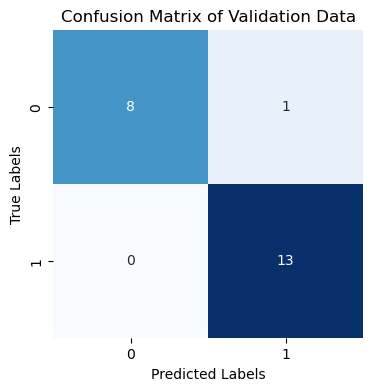

In [1234]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary, labels=[0, 1])

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary, pos_label=1)
recall = recall_score(y_test, y_pred_binary, pos_label=1)
f1 = f1_score(y_test, y_pred_binary, pos_label=1)

# Calculate Negative Prediction Value (NPV) and Positive Prediction Value (PPV)
tn, fp, fn, tp = cm.ravel()
npv = tn / (tn + fn)
ppv = tp / (tp + fp)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_binary)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_binary))

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Negative Prediction Value (NPV):", npv)
print("Positive Prediction Value (PPV):", ppv)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)


plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Validation Data")
plt.show()

In [1235]:
scaler = StandardScaler()
#normalized_input_data_sub7 = scaler.fit_transform(padded_input_data_sub7)
combined_input_data_sub8 = scaler.fit_transform(combined_input_data_sub8)
combined_input_data_sub9 = scaler.fit_transform(combined_input_data_sub9)
combined_input_data_sub10 = scaler.fit_transform(combined_input_data_sub10)

In [1236]:
input_data_sub8 = combined_input_data_sub8.reshape((combined_input_data_sub8.shape[0], combined_input_data_sub8.shape[1], input_dim))
input_data_sub9 = combined_input_data_sub9.reshape((combined_input_data_sub9.shape[0], combined_input_data_sub9.shape[1], input_dim))
input_data_sub10 = combined_input_data_sub10.reshape((combined_input_data_sub10.shape[0], combined_input_data_sub10.shape[1], input_dim))

In [1237]:
input_data_sub10

array([[[ 0.45387033],
        [ 0.78387696],
        [ 1.1731584 ],
        [ 0.9017473 ],
        [ 1.8710719 ],
        [ 1.4072194 ],
        [ 0.94627005],
        [-0.03741851],
        [ 0.2197522 ],
        [ 0.6717188 ],
        [ 0.57660306],
        [ 0.30151135],
        [ 0.        ]],

       [[ 0.45387033],
        [ 0.78387696],
        [ 1.1731584 ],
        [ 1.5641925 ],
        [ 1.3671671 ],
        [ 1.1093236 ],
        [ 1.0809907 ],
        [ 1.3971511 ],
        [ 1.2629325 ],
        [ 0.6717188 ],
        [ 0.57660306],
        [ 0.30151135],
        [ 0.        ]],

       [[ 0.45387033],
        [ 0.78387696],
        [ 1.1731584 ],
        [ 1.5641925 ],
        [ 1.3572699 ],
        [ 0.14678355],
        [ 0.7712028 ],
        [ 1.5614884 ],
        [ 2.1013234 ],
        [ 2.0419116 ],
        [ 0.57660306],
        [ 0.30151135],
        [ 0.        ]],

       [[ 0.8165787 ],
        [ 1.0915436 ],
        [ 1.0363777 ],
        [ 0.8931394 ],
     

In [1239]:


output_data_sub8 = []
for i in target_data_sub8:
    if -0.07 <= i <= -0.07:
        output_data_sub8.append(0)
    else:
        output_data_sub8.append(1)
# Convert the binary labels to a regular Python list
test_output_data_sub8 = np.array(output_data_sub8)


output_data_sub9 = []
for i in target_data_sub9:
    if -0.07 <= i <= 0.07:
        output_data_sub9.append(0)
    else:
        output_data_sub9.append(1)
# Convert the binary labels to a regular Python list
test_output_data_sub9 = np.array(output_data_sub9)


output_data_sub10 = []
for i in target_data_sub10:
    if -0.07 <= i <= 0.07:
        output_data_sub10.append(0)
    else:
        output_data_sub10.append(1)
# Convert the binary labels to a regular Python list

#test_output_data_sub7 = np.array(output_data_sub7)
test_output_data_sub8 = np.array(output_data_sub8)
test_output_data_sub9 = np.array(output_data_sub9)
test_output_data_sub10 = np.array(output_data_sub10)

In [1240]:
print(test_output_data_sub8)
print(test_output_data_sub9)
print(test_output_data_sub10)

[1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 0 1 1 1]
[0 0 1 1 0 0 1 1 1 1 1 1]


In [1241]:
y_pred_sub8 = model.predict(input_data_sub8)
y_pred_sub9 = model.predict(input_data_sub9)
y_pred_sub10 = model.predict(input_data_sub10)

1/1 [==============================] - 0s 20ms/step


In [1242]:
y_pred_binary_sub8 = []
for pred in y_pred_sub8:
    if  pred < 0.5:
        y_pred_binary_sub8.append(0)
    else:
        y_pred_binary_sub8.append(1)
y_pred_binary_sub8 = np.array(y_pred_binary_sub8)
print(y_pred_binary_sub8)


y_pred_binary_sub9 = []
for pred in y_pred_sub9:
    if pred < 0.5:
        y_pred_binary_sub9.append(0)
    else:
        y_pred_binary_sub9.append(1)
y_pred_binary_sub9 = np.array(y_pred_binary_sub9)
print(y_pred_binary_sub9)


y_pred_binary_sub10 = []
for pred in y_pred_sub10:
    if pred < 0.5:
        y_pred_binary_sub10.append(0)
    else:
        y_pred_binary_sub10.append(1)
y_pred_binary_sub10 = np.array(y_pred_binary_sub10)
print(y_pred_binary_sub10)

[1 1 1 1 0 0 1 1 1 1 1]
[1 1 0 0 0 1 1 1 1]
[1 1 1 1 0 0 1 1 1 1 1 1]


In [1243]:
cm_sub8 = confusion_matrix(test_output_data_sub8, y_pred_binary_sub8)
cm_sub9 = confusion_matrix(test_output_data_sub9, y_pred_binary_sub9)
cm_sub10 = confusion_matrix(test_output_data_sub10, y_pred_binary_sub10)

Precision: 1.0
Recall: 0.8181818181818182
F1-Score: 0.9
Negative Prediction Value (NPV): 0.0
Positive Prediction Value (PPV): 1.0
Mean Absolute Error (MAE): 0.18181818181818182
Root Mean Square Error (RMSE): 0.4264014327112209


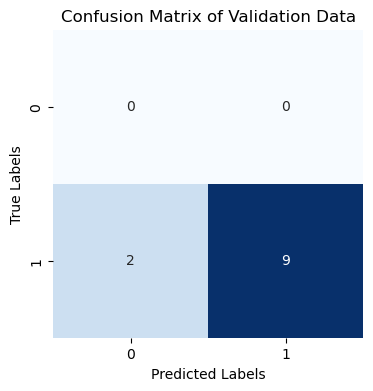

In [1244]:
# Compute confusion matrix for subject 8
cm_sub8 = confusion_matrix(test_output_data_sub8, y_pred_binary_sub8, labels=[0, 1])

# Calculate precision, recall, and F1-score
precision = precision_score(test_output_data_sub8,  y_pred_binary_sub8, pos_label=1)
recall = recall_score(test_output_data_sub8, y_pred_binary_sub8 , pos_label=1)
f1 = f1_score(test_output_data_sub8, y_pred_binary_sub8, pos_label=1)

# Calculate Negative Prediction Value (NPV) and Positive Prediction Value (PPV)
tn, fp, fn, tp = cm_sub8.ravel()
npv = tn / (tn + fn)
ppv = tp / (tp + fp)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_output_data_sub8, y_pred_binary_sub8)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_output_data_sub8, y_pred_binary_sub8))

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Negative Prediction Value (NPV):", npv)
print("Positive Prediction Value (PPV):", ppv)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_sub8, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Validation Data")
plt.show()

Precision: 0.8333333333333334
Recall: 0.625
F1-Score: 0.7142857142857143
Negative Prediction Value (NPV): 0.0
Positive Prediction Value (PPV): 0.8333333333333334
Mean Absolute Error (MAE): 0.4444444444444444
Root Mean Square Error (RMSE): 0.6666666666666666


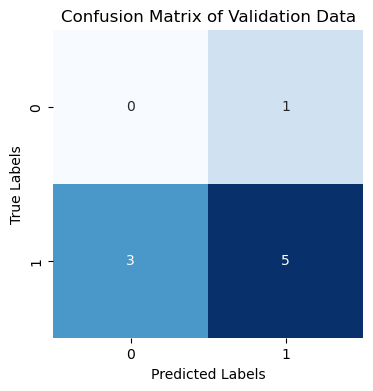

In [1245]:
# Compute confusion matrix for subject 9
cm_sub9 = confusion_matrix(test_output_data_sub9, y_pred_binary_sub9, labels=[0, 1])

# Calculate precision, recall, and F1-score
precision = precision_score(test_output_data_sub9,  y_pred_binary_sub9, pos_label=1)
recall = recall_score(test_output_data_sub9, y_pred_binary_sub9 , pos_label=1)
f1 = f1_score(test_output_data_sub9, y_pred_binary_sub9, pos_label=1)

# Calculate Negative Prediction Value (NPV) and Positive Prediction Value (PPV)
tn, fp, fn, tp = cm_sub9.ravel()
npv = tn / (tn + fn)
ppv = tp / (tp + fp)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_output_data_sub9, y_pred_binary_sub9)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_output_data_sub9, y_pred_binary_sub9))

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Negative Prediction Value (NPV):", npv)
print("Positive Prediction Value (PPV):", ppv)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_sub9, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Validation Data")
plt.show()

In [1246]:

# Compute confusion matrix for sub10
cm_sub10 = confusion_matrix(test_output_data_sub10, y_pred_binary_sub10, labels=[0, 1])

# Calculate precision, recall, and F1-score
precision = precision_score(test_output_data_sub10,  y_pred_binary_sub10, pos_label=1)
recall = recall_score(test_output_data_sub10, y_pred_binary_sub10 , pos_label=1)
f1 = f1_score(test_output_data_sub10, y_pred_binary_sub10, pos_label=1)

# Calculate Negativ_e Prediction Value (NPV) and Positive Prediction Value (PPV)
tn, fp, fn, tp = cm_sub10.ravel()
npv = tn / (tn + fn)
ppv = tp / (tp + fp)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_output_data_sub10, y_pred_binary_sub10)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_output_data_sub10, y_pred_binary_sub10))

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Negative Prediction Value (NPV):", npv)
print("Positive Prediction Value (PPV):", ppv)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)



Precision: 0.8
Recall: 1.0
F1-Score: 0.888888888888889
Negative Prediction Value (NPV): 1.0
Positive Prediction Value (PPV): 0.8
Mean Absolute Error (MAE): 0.16666666666666666
Root Mean Square Error (RMSE): 0.408248290463863


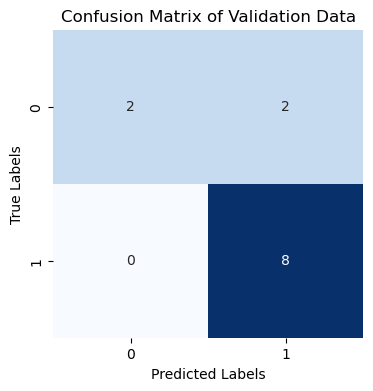

In [1247]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm_sub10, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Validation Data")
plt.show()

Precision: 0.4
Recall: 0.2222222222222222
F1-Score: 0.2857142857142857
Negative Prediction Value (NPV): 0.65
Positive Prediction Value (PPV): 0.4


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>